In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [6]:
data=pd.read_csv("forestfires.csv")
data.head(5)

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  
2         0          small  
3         0          small  
4         0          small  

[5 rows x 31 columns]

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
label=LabelEncoder()
data["category"]=label.fit_transform(data["size_category"])

In [9]:
data.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthjan  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  monthsep  \
0         0         0         1         0         0         0         0   
1         0         0         0         0         0         1         0   
2         0         0         0         0         0         1         0   
3         0         0         1         0         0         0         0   
4         0         0         1         0         0         0         0   

   size_category  category  
0          small         1  
1          small         1  
2          small         1  
3          small         1  
4          small         1  

[5 rows x 32 columns]

0-large 1-small

In [10]:
data["category"].value_counts()

1    378
0    139
Name: category, dtype: int64

In [11]:
import seaborn as sns

D:\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'category 0-large 1-small')

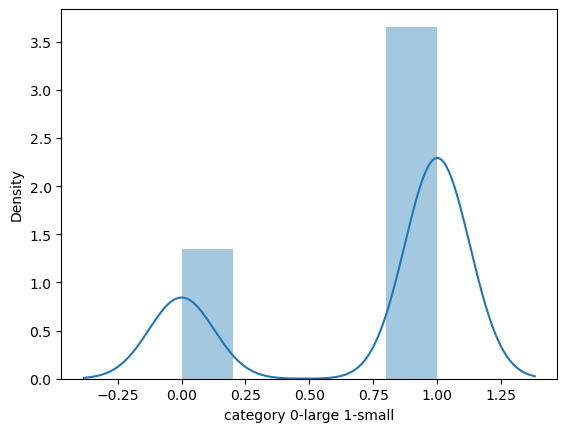

In [8]:
sns.distplot(data["category"])
plt.xlabel("category 0-large 1-small")

<AxesSubplot:xlabel='month', ylabel='day'>

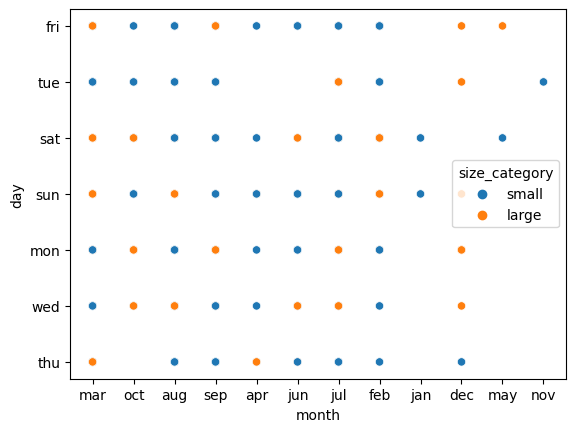

In [9]:
sns.scatterplot(x="month",y="day",data=data,hue="size_category")

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler=StandardScaler()
x=scaler.fit_transform(data.iloc[:,2:-2])
x

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

In [14]:
x.shape

(517, 28)

In [15]:
y=data["category"]
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: category, Length: 517, dtype: int32

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=12)

# HYPERPARAMETER TUNING

In [16]:
def create_model(learning_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = init))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [17]:
model = KerasClassifier(build_fn = create_model,verbose = 3)

C:\Users\Tharun\AppData\Local\Temp\ipykernel_21576\2975407175.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 3)


In [18]:
batch_size = [10,25,50]
epochs = [10,45,90]
learning_rate = [0.001,0.01,0.1]
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
neuron1 = [5,8,15]
neuron2 = [4,6,10]

In [19]:
param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

In [20]:
from sklearn.model_selection import GridSearchCV,KFold

In [21]:
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
[CV 1/5; 1/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.5s
[CV 2/5; 1/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 1/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 1/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 2/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 2/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 2/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 2/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 3/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 3/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 3/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 3/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 3/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 3/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 3/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 3/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 3/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 3/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 4/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 4/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 4/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 4/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 4/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 4/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 4/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 4/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 4/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 4/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 5/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 5/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 5/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 5/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 5/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 5/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 5/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 5/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 5/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 5/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 6/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 6/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 6/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 6/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 6/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 6/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 6/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 6/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 6/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 6/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 7/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 7/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 7/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 7/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 7/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 7/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 7/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 7/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 7/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 7/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 8/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 8/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 8/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 8/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 8/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 8/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 8/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 8/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 8/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 8/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 9/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 9/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 9/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 9/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 9/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 9/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 9/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 9/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 9/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 9/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 10/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 10/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 10/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 10/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 10/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 10/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 10/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 10/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 10/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 10/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 11/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 11/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 11/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 11/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 11/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 11/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 11/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 11/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 11/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 11/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 12/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 12/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 12/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 12/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 12/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 12/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 12/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 12/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 12/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 12/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 13/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 13/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 13/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 13/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 13/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 13/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 13/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 13/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 13/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 13/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 14/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 14/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 14/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 14/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 14/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 14/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 14/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 14/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 14/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 14/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 15/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 15/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 15/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 15/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 15/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 15/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 15/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 15/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 15/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 15/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 16/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 16/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 16/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 16/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 16/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 16/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 16/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 16/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 16/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 16/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 17/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 17/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 17/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 17/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 17/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 17/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 17/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 17/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 17/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 17/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 18/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 18/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 18/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 18/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 18/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 18/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 18/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 18/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 18/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 18/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 19/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 19/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 19/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 19/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 19/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 19/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 19/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 19/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 19/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 19/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 20/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 20/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 20/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 20/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 20/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 20/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 20/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 20/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 20/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 20/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 21/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 21/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 21/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 21/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 21/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 21/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 21/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 21/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 21/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 21/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 22/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 22/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 22/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 22/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 22/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 22/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 4/5; 22/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 22/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 22/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 22/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 23/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 23/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 23/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 23/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 23/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 23/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 23/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 23/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 23/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 23/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 24/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 24/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 24/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 24/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 24/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 24/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 24/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 24/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 24/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 24/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 25/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 25/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 25/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 25/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 25/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 25/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 25/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 25/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 25/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 25/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 26/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 26/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 26/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 26/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 26/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 26/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 26/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 26/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 26/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 26/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 27/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 27/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 27/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 27/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 27/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 27/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 27/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 27/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 27/2916] START activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 27/2916] END activation_function=softmax, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 28/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 28/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 28/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 28/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 28/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 28/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 28/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 28/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 28/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 28/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 29/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 29/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 29/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 29/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 29/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 29/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 29/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 29/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 29/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 29/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 30/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 30/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 30/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 30/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 30/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 30/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 30/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 30/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 30/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 30/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 31/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 31/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 31/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 31/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 31/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 31/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 31/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 31/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 31/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 31/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 32/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 32/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 32/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 32/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 32/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 32/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 32/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 32/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 32/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 32/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 33/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 33/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 33/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 33/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 33/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 33/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 33/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 33/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 33/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 33/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 34/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 34/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 34/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 34/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 34/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 34/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 34/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 34/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 34/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 34/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 35/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 35/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 35/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 35/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 35/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 35/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 35/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 35/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.2s
[CV 5/5; 35/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 35/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 36/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 36/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 36/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 36/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 36/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 36/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 36/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 36/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 36/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 36/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 37/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 37/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 37/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 37/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 37/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 37/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 37/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 37/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 37/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 37/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 38/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 38/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 38/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 38/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 38/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 38/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 38/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 38/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 38/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 38/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 39/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 39/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 39/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 39/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 39/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 39/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 39/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 39/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 39/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 39/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 40/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 40/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 40/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 40/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 40/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 40/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 40/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 40/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 40/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 40/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 41/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 41/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 41/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 41/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 41/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 41/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 41/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 41/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 41/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 41/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 42/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 42/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 42/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 42/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 42/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 42/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 42/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 42/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 42/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 42/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 43/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 43/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 43/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 43/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 43/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 43/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 43/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 43/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 43/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 43/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 44/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 44/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 44/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 44/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 44/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 44/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 44/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 44/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 44/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 44/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 45/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 45/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 45/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 45/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 45/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 45/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 45/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 45/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 45/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 45/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 46/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 46/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 46/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 46/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 46/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 46/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 46/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 46/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 46/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 46/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 47/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 47/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 47/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 47/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 47/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 47/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 47/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 47/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 47/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 47/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 48/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 48/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 48/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 48/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 48/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 48/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 48/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 48/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 48/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 48/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 49/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 49/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 49/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 49/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 49/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 49/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 49/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 49/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 49/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 49/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 50/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 50/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 50/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 50/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 50/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 50/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 50/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 50/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 50/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 50/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 51/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 51/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 51/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 51/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 51/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 51/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 51/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 51/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 51/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 51/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 52/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 52/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 52/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 52/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 52/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 52/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 52/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 52/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 52/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 52/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 53/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 53/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 53/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 53/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 53/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 53/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 53/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 53/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 53/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 53/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 54/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 54/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 54/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 54/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 54/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 54/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 54/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 54/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 54/2916] START activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 54/2916] END activation_function=softmax, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 55/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 55/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 55/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 55/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 55/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 55/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 55/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 55/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 55/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 55/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 56/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 56/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 56/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 56/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 56/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 56/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 56/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 56/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 56/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 56/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 57/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 57/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 57/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 57/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 57/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 57/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 57/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 57/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 57/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 57/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 58/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 58/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 58/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 58/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 58/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 58/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 4/5; 58/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 58/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 58/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 58/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 59/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 59/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 59/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 59/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 59/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 59/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 59/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 59/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 59/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 59/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 60/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 60/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 60/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 60/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 60/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 60/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 60/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 60/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 60/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 60/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 61/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 61/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 61/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 61/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 61/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 61/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 61/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 61/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 61/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 61/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 62/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 62/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 62/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 62/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 62/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 62/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 62/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 62/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 62/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 62/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 63/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 63/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 63/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 63/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 63/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 63/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 63/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 63/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 63/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 63/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 64/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 64/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 64/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 64/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 64/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 64/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 64/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 64/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 64/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 64/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 65/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 65/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 65/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 65/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 65/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 65/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 65/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 65/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 65/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 65/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 66/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 66/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 66/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 66/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 66/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 66/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 66/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 66/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 66/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 66/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 67/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 67/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 67/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 67/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 67/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 67/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 67/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 67/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 67/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 67/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 68/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 68/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 68/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 68/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 68/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 68/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 68/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 68/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 68/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 68/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 69/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 69/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 69/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 69/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 69/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 69/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 69/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 69/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 69/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 69/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 70/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 70/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 70/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 70/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 70/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 70/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 70/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 70/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 70/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 70/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 71/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 71/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 71/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 71/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 71/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 71/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 71/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 71/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 71/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 71/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 72/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 72/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 72/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 72/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 72/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 72/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 72/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 72/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 72/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 72/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 73/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 73/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 73/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 73/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 73/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 73/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 73/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 73/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 73/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 73/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 74/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 74/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 74/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 74/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 74/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 74/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 74/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 74/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 74/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 74/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 75/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 75/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 75/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 75/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 75/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 75/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 75/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 75/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 75/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 75/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 76/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 76/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 76/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 76/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 76/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 76/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 76/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 76/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.2s
[CV 5/5; 76/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 76/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 77/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 77/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 77/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 77/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 77/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 77/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 77/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 77/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 77/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 77/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 78/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 78/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 78/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 78/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 78/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 78/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 78/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 78/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 78/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 78/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 79/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 79/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 79/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 79/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 79/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 79/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 79/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 79/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 79/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 79/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 80/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 80/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 80/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 80/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 80/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 80/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 80/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 80/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 80/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 80/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 81/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 81/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 81/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 81/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 81/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 81/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 81/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 81/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 81/2916] START activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 81/2916] END activation_function=softmax, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 82/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 82/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 82/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 82/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 82/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 82/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 82/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 82/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 82/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 82/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 83/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 83/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 83/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 83/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 83/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 83/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 83/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 83/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 83/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 83/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 84/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 84/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 84/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 84/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 84/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 84/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 84/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 84/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 84/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 84/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 85/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 85/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 85/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 85/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 85/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 85/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 85/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 85/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 85/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 85/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 86/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 86/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 86/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 86/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 86/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 86/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 86/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 86/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 86/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 86/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 87/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 87/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 87/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 87/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 87/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 87/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 87/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 87/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 87/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 87/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 88/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 88/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 88/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 88/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 88/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 88/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 88/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 88/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 88/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 88/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 89/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 89/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 89/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 89/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 89/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 89/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 89/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 89/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 89/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 89/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 90/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 90/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 90/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 90/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 90/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 90/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 90/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 90/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 90/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 90/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 91/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 91/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 91/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 91/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 91/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 91/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 91/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 91/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 91/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 91/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 92/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 92/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 92/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 92/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 92/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 92/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 92/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 92/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 92/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 92/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 93/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 93/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 93/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 93/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 93/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 93/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 93/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 93/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 93/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 93/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 94/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 94/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 94/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 94/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 94/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 94/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 94/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 94/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 94/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 94/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 95/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 95/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 95/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 95/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 95/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 95/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 95/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 95/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 95/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 95/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 96/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 96/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 96/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 96/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 96/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 96/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 96/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 96/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 96/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 96/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 97/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 97/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 97/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 97/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 97/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 97/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 97/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 97/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 97/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 97/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 98/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 98/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 98/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 98/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 98/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 98/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 98/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 98/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 98/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 98/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 99/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 99/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 99/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 99/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 99/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 99/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 99/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 99/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 99/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 99/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 100/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 100/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 100/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 100/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 100/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 100/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 100/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 100/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 100/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 100/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 101/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 101/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 101/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 101/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 101/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 101/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 101/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 101/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 101/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 101/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 102/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 102/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 102/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 102/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 102/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 102/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 102/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 102/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 102/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 102/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 103/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 103/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 103/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 103/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 103/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 103/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 4/5; 103/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 103/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 103/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 103/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 104/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 104/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 104/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 104/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 104/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 104/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 104/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 104/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 104/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 104/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 105/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 105/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 105/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 105/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 105/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 105/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 105/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 105/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 105/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 105/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 106/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 106/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 106/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 106/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 106/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 106/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 4/5; 106/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 106/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 106/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 106/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 107/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 107/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 107/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 107/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 107/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 107/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 107/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 107/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 107/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 107/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 108/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 108/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 108/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 108/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 108/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 108/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 108/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 108/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 108/2916] START activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 108/2916] END activation_function=softmax, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 109/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 109/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 109/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 109/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 109/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 109/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 109/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 109/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 109/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 109/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 110/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 110/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 110/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 110/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 110/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 110/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 110/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 110/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 110/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 110/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 111/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 111/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 111/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 111/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 111/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 111/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 111/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 111/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 111/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 111/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 112/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 112/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 112/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 112/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 112/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 112/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 112/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 112/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 112/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 112/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 113/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 113/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 113/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 113/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 113/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 113/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 113/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 113/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 113/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 113/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 114/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 114/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 114/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 114/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 114/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 114/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 114/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 114/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 114/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 114/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 115/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 115/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 115/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 115/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 115/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 115/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 115/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 115/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 115/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 115/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 116/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 116/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 116/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 116/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 116/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 116/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 116/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 116/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 116/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 116/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.2s
[CV 1/5; 117/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 117/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 117/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 117/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 117/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 117/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 117/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 117/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 117/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 117/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 118/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 118/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 118/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 118/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 118/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 118/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 118/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 118/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 118/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 118/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 119/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 119/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 119/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 119/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 119/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 119/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 119/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 119/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 119/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 119/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 120/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 120/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 120/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 120/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 120/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 120/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 120/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 120/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 120/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 120/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 121/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 121/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 121/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 121/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 121/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 121/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 121/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 121/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 121/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 121/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 122/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 122/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 122/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 122/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 122/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 122/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 122/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 122/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 122/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 122/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 123/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 123/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 123/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 123/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 123/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 123/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 123/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 123/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 123/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 123/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 124/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 124/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 124/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 124/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 124/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 124/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 124/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 124/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 124/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 124/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 125/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 125/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 125/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 125/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 125/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 125/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 125/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 125/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 125/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 125/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 126/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 126/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 126/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 126/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 126/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 126/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 126/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 126/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 126/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 126/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 127/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 127/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 127/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 127/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 127/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 127/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 127/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 127/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 127/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 127/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 128/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 128/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 128/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 128/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 128/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 128/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 128/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 128/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 128/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 128/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 129/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 129/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 129/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 129/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 129/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 129/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 129/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 129/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 129/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 129/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 130/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 130/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 130/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 130/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 130/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 130/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 4/5; 130/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 130/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 130/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 130/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 131/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 131/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 131/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 131/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 131/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 131/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 131/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 131/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 131/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 131/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 132/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 132/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 132/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 132/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 132/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 132/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 132/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 132/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 132/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 132/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 133/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 133/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 133/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 133/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 133/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 133/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 133/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 133/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 133/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 133/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 134/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 134/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 134/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 134/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 134/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 134/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 134/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 134/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 134/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 134/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 135/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 135/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 135/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 135/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 135/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 135/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 135/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 135/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 135/2916] START activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 135/2916] END activation_function=softmax, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 136/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 136/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 136/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 136/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 136/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 136/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 136/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 136/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 136/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 136/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 137/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 137/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 137/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 137/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 137/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 137/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 137/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 137/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 137/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 137/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 138/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 138/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 138/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 138/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 138/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 138/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 138/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 138/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 138/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 138/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 139/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 139/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 139/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 139/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 139/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 139/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 139/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 139/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 139/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 139/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 140/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 140/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 140/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 140/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 140/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 140/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 140/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 140/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 140/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 140/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 141/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 141/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 141/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 141/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 141/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 141/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 141/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 141/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 141/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 141/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 142/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 142/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 142/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 142/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 142/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 142/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 142/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 142/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 142/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 142/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 143/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 143/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 143/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 143/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 143/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 143/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 143/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 143/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 143/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 143/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 144/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 144/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 144/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 144/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 144/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 144/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 144/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 144/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 144/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 144/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 145/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 145/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 145/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 145/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 145/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 145/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 145/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 145/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 145/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 145/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 146/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 146/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 146/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 146/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 146/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 146/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 146/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 146/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 146/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 146/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 147/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 147/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 147/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 147/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 147/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 147/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 147/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 147/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 147/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 147/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 148/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 148/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 148/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 148/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 148/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 148/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 148/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 148/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 148/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 148/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 149/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 149/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 149/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 149/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 149/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 149/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 149/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 149/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 149/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 149/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 150/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 150/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 150/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 150/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 150/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 150/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 150/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 150/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 150/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 150/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 151/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 151/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 151/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 151/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 151/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 151/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 151/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 151/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 151/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 151/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 152/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 152/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 152/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 152/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 152/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 152/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 152/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 152/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 152/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 152/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 153/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 153/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 153/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 153/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 153/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 153/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 153/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 153/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 153/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 153/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 154/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 154/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 154/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 154/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 154/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 154/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 154/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 154/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 154/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 154/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 155/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 155/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 155/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 155/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 155/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 155/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 155/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 155/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 155/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 155/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 156/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 156/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 156/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 156/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 156/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 156/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 156/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 156/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 156/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 156/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 157/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 157/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 157/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 157/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 157/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 157/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 157/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 157/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 157/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 157/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 158/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 158/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 158/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 158/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 158/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 158/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 158/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 158/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.2s
[CV 5/5; 158/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 158/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 159/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 159/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 159/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 159/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 159/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 159/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 159/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 159/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 159/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 159/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 160/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 160/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 160/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 160/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 160/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 160/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 160/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 160/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 160/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 160/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 161/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 161/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 161/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 161/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 161/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 161/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 161/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 161/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 161/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 161/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 162/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 162/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 162/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 162/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 162/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 162/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 162/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 162/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 162/2916] START activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 162/2916] END activation_function=softmax, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 163/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 163/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 163/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 163/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 163/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 163/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 4/5; 163/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 163/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 163/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 163/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 164/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 164/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 164/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 164/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 164/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 164/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 164/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 164/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 164/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 164/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 165/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 165/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 165/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 165/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 165/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 165/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 165/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 165/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 165/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 165/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 166/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 166/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 166/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 166/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 166/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 166/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 166/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 166/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 166/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 166/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 167/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 167/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 167/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 167/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 167/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 167/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 167/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 167/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 167/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 167/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 168/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 168/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 168/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 168/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 168/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 168/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 168/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 168/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 168/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 168/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 169/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 169/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 169/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 169/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 169/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 169/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 169/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 169/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 169/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 169/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 170/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 170/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 170/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 170/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 170/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 170/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 170/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 170/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 170/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 170/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 171/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 171/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 171/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 171/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 171/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 171/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 171/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 171/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 171/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 171/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 172/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 172/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 172/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 172/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 172/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 172/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 172/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 172/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 172/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 172/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 173/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 173/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 173/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 173/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 173/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 173/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 173/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 173/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 173/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 173/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 174/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 174/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 174/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 174/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 174/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 174/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 174/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 174/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 174/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 174/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 175/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 175/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 175/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 175/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 175/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 175/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 175/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 175/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 175/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 175/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 176/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 176/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 176/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 176/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 176/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 176/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 176/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 176/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 176/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 176/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 177/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 177/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 177/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 177/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 177/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 177/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 177/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 177/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 177/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 177/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 178/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 178/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 178/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 178/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 178/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 178/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 178/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 178/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 178/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 178/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 179/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 179/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 179/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 179/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 179/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 179/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 179/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 179/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 179/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 179/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 180/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 180/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 180/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 180/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 180/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 180/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 180/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 180/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 180/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 180/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 181/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 181/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 181/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 181/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 181/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 181/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 181/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 181/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 181/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 181/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 182/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 182/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 182/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 182/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 182/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 182/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 182/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 182/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 182/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 182/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 183/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 183/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 183/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 183/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 183/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 183/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 183/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 183/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 183/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 183/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 184/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 184/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 184/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 184/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 184/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 184/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 184/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 184/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 184/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 184/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 185/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 185/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 185/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 185/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 185/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 185/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 185/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 185/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 185/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 185/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 186/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 186/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 186/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 186/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 186/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 186/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 186/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 186/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 186/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 186/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 187/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 187/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 187/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 187/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 187/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 187/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 187/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 187/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 187/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 187/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 188/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 188/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 188/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 188/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 188/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 188/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 188/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 188/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 188/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 188/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 189/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 189/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 189/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 189/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 189/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 189/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 189/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 189/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 189/2916] START activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 189/2916] END activation_function=softmax, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 190/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 190/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 190/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 190/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 190/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 190/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 190/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 190/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 190/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 190/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 191/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 191/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 191/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 191/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 191/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 191/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 191/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 191/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 191/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 191/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 192/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 192/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 192/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 192/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 192/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 192/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 192/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 192/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 192/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 192/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 193/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 193/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 193/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 193/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 193/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 193/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 193/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 193/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 193/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 193/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 194/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 194/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 194/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 194/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 194/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 194/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 194/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 194/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 194/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 194/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 195/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 195/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 195/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 195/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 195/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 195/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 195/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 195/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 195/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 195/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 196/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 196/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 196/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 196/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 196/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 196/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 196/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 196/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 196/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 196/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 197/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 197/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 197/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 197/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 197/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 197/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 197/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 197/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 197/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 197/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.2s
[CV 1/5; 198/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 198/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 198/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 198/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 198/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 198/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 198/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 198/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 198/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 198/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 199/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 199/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 199/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 199/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 199/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 199/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 199/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 199/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 199/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 199/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 200/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 200/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 200/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 200/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 200/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 200/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 200/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 200/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 200/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 200/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 201/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 201/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 201/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 201/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 201/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 201/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 201/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 201/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 201/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 201/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 202/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 202/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 202/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 202/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 202/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 202/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 202/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 202/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 202/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 202/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 203/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 203/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 203/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 203/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 203/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 203/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 203/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 203/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 203/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 203/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 204/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 204/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 204/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 204/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 204/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 204/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 204/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 204/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 204/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 204/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 205/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 205/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 205/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 205/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 205/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 205/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 205/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 205/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 205/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 205/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 206/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 206/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 206/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 206/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 206/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 206/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 206/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 206/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 206/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 206/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 207/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 207/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 207/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 207/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 207/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 207/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 207/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 207/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 207/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 207/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 208/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 208/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 208/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 208/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 208/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 208/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 208/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 208/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 208/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 208/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 209/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 209/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 209/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 209/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 209/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 209/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 209/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 209/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 209/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 209/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 210/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 210/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 210/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 210/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 210/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 210/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 210/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 210/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 210/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 210/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 211/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 211/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 211/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 211/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 211/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 211/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 4/5; 211/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 211/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 211/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 211/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 212/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 212/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 212/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 212/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 212/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 212/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 212/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 212/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 212/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 212/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 213/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 213/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 213/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 213/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 213/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 213/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 213/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 213/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 213/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 213/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 214/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 214/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 214/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 214/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 214/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 214/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 214/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 214/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 214/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 214/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 215/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 215/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 215/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 215/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 215/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 215/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 215/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 215/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 215/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 215/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 216/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 216/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 216/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 216/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 216/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 216/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 216/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 216/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 216/2916] START activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 216/2916] END activation_function=softmax, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 217/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 217/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 217/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 217/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 217/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 217/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 217/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 217/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 217/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 217/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 218/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 218/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 218/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 218/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 218/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 218/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 218/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 218/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 218/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 218/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 219/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 219/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 219/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 219/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 219/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 219/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 219/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 219/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 219/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 219/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 220/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 220/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 220/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 220/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 220/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 220/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 220/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 220/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 220/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 220/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 221/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 221/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 221/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 221/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 221/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 221/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 221/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 221/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 221/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 221/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 222/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 222/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 222/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 222/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 222/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 222/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 222/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 222/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 222/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 222/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 223/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 223/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 223/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 223/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 223/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 223/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 223/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 223/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 223/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 223/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 224/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 224/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 224/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 224/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 224/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 224/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 224/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 224/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 224/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 224/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 225/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 225/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 225/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 225/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 225/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 225/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 225/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 225/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 225/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 225/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 226/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 226/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 226/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 226/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 226/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 226/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 226/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 226/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 226/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 226/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.2s
[CV 1/5; 227/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 227/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 227/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 227/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 227/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 227/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 227/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 227/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 227/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 227/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 228/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 228/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 228/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 228/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 228/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 228/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 228/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 228/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 228/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 228/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 229/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 229/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 229/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 229/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 229/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 229/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 229/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 229/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 229/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 229/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 230/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 230/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 230/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 230/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 230/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 230/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 230/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 230/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 230/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 230/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 231/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 231/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 231/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 231/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 231/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 231/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 231/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 231/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 231/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 231/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 232/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 232/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 232/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 232/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 232/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 232/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 232/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 232/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 232/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 232/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 233/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 233/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 233/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 233/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 233/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 233/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 233/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 233/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 233/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 233/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 234/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 234/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 234/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 234/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 234/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 234/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 234/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 234/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 234/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 234/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 235/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 235/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 235/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 235/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 235/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 235/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 235/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 235/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 235/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 235/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 236/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 236/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 236/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 236/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 236/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 236/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 236/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 236/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 236/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 236/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 237/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 237/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 237/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 237/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 237/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 237/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 237/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 237/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 237/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 237/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 238/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 238/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 238/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 238/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 238/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 238/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 4/5; 238/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 238/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 238/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 238/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 239/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 239/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 239/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 239/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 239/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 239/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 239/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 239/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 239/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 239/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 240/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 240/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 240/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 240/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 240/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 240/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 240/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 240/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.2s
[CV 5/5; 240/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 240/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 241/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 241/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 241/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 241/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 241/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 241/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 4/5; 241/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 241/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 241/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 241/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 242/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 242/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 242/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 242/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 242/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 242/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 242/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 242/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 242/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 242/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 243/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 243/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 243/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 243/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 243/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 243/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 243/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 243/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 243/2916] START activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 243/2916] END activation_function=softmax, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 244/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 244/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 244/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 244/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 244/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 244/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 244/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 244/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 244/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 244/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 245/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 245/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 245/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 245/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 245/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 245/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 245/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 245/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 245/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 245/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 246/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 246/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 246/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 246/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 246/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 246/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 246/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 246/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 246/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 246/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 247/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 247/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 247/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 247/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 247/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 247/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 247/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 247/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 247/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 247/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 248/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 248/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 248/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 248/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 248/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 248/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 248/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 248/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 248/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 248/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 249/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 249/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 249/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 249/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 249/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 249/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 249/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 249/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 249/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 249/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 250/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 250/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 250/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 250/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 250/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 250/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 250/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 250/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 250/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 250/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 251/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 251/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 251/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 251/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 251/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 251/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 251/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 251/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 251/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 251/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 252/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 252/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 252/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 252/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 252/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 252/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 252/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 252/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 252/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 252/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 253/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 253/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 253/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 253/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 253/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 253/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 253/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 253/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 253/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 253/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 254/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 254/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 254/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 254/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 254/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 254/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 254/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 254/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 254/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 254/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 255/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 255/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 255/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 255/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 255/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 255/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 255/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 255/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 255/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 255/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 256/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 256/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 256/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 256/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 256/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 256/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 256/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 256/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 256/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 256/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 257/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 257/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 257/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 257/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 257/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 257/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 257/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 257/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 257/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 257/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 258/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 258/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 258/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 258/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 258/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 258/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 258/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 258/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 258/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 258/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 259/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 259/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 259/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 259/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 259/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 259/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 259/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 259/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 259/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 259/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 260/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 260/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 260/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 260/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 260/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 260/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 260/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 260/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 260/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 260/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 261/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 261/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 261/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 261/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 261/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 261/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 261/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 261/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 261/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 261/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 262/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 262/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 262/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 262/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 262/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 262/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 262/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 262/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 262/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 262/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 263/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 263/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 263/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 263/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 263/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 263/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 263/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 263/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 263/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 263/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 264/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 264/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 264/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 264/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 264/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 264/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 264/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 264/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 264/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 264/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 265/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 265/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 265/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 265/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 265/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 265/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 265/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 265/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 265/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 265/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 266/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 266/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 266/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 266/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 266/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 266/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 266/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 266/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 266/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 266/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 267/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 267/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 267/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 267/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 267/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 267/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 267/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 267/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 267/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 267/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 268/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 268/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 268/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 268/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 268/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 268/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 268/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 268/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 268/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 268/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 269/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 269/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 269/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 269/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 269/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 269/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 269/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 269/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 269/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 269/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 270/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 270/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 270/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 270/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 270/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 270/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 270/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 270/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 270/2916] START activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 270/2916] END activation_function=softmax, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 271/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 271/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 271/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 271/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 271/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 271/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 271/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 271/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 271/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 271/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 272/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 272/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 272/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 272/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 272/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 272/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 272/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 272/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 272/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 272/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 273/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 273/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 273/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 273/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 273/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 273/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 273/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 273/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 273/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 273/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 274/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 274/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 274/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 274/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 274/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 274/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 274/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 274/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 274/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 274/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 275/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 275/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 275/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 275/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 275/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 275/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 275/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 275/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 275/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 275/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 276/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 276/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 276/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 276/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 276/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 276/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 276/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 276/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 276/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 276/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 277/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 277/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 277/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 277/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 277/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 277/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 277/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 277/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 277/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 277/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 278/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 278/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 278/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 278/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 278/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 278/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 278/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 278/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 278/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 278/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 279/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 279/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 279/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 279/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 279/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 279/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 279/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 279/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 279/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 279/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 280/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 280/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 280/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 280/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 280/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 280/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 280/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 280/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.2s
[CV 5/5; 280/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 280/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 281/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 281/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 281/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 281/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 281/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 281/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 281/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 281/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 281/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 281/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 282/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 282/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 282/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 282/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 282/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 282/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 282/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 282/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 282/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 282/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 283/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 283/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 283/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 283/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 283/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 283/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 4/5; 283/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 283/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 283/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 283/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 284/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 284/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 284/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 284/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 284/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 284/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 284/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 284/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 284/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 284/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 285/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 285/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 285/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 285/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 285/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 285/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 285/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 285/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 285/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 285/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 286/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 286/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 286/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 286/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 286/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 286/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 286/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 286/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 286/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 286/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 287/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 287/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 287/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 287/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 287/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 287/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 287/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 287/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 287/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 287/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 288/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 288/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 288/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 288/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 288/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 288/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 288/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 288/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 288/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 288/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 289/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 289/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 289/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 289/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 289/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 289/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 289/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 289/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 289/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 289/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 290/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 290/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 290/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 290/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 290/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 290/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 290/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 290/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 290/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 290/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 291/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 291/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 291/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 291/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 291/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 291/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 291/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 291/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 291/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 291/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 292/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 292/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 292/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 292/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 292/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 292/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 292/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 292/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 292/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 292/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 293/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 293/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 293/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 293/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 293/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 293/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 293/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 293/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 293/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 293/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 294/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 294/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 294/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 294/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 294/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 294/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 294/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 294/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 294/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 294/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 295/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 295/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 295/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 295/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 295/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 295/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 295/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 295/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 295/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 295/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 296/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 296/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 296/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 296/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 296/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 296/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 296/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 296/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 296/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 296/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 297/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 297/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 297/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 297/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 297/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 297/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 297/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 297/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 297/2916] START activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 297/2916] END activation_function=softmax, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 298/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 298/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 298/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 298/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 298/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 298/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 298/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 298/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 298/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 298/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 299/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 299/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 299/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 299/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 299/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 299/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 299/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 299/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 299/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 299/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 300/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 300/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 300/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 300/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 300/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 300/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 300/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 300/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 300/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 300/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 301/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 301/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 301/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 301/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 301/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 301/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 301/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 301/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 301/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 301/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 302/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 302/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 302/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 302/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 302/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 302/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 302/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 302/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 302/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 302/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 303/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 303/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 303/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 303/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 303/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 303/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 303/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 303/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 303/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 303/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 304/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 304/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 304/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 304/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 304/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 304/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 304/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 304/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 304/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 304/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 305/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 305/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 305/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 305/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 305/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 305/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 305/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 305/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 305/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 305/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 306/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 306/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 306/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 306/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 306/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 306/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 306/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 306/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 306/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 306/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 307/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 307/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 307/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 307/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 307/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 307/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 307/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 307/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 307/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 307/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 308/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 308/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 308/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 308/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 308/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 308/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 308/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 308/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 308/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 308/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 309/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 309/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 309/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 309/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 309/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 309/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 309/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 309/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 309/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 309/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 310/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 310/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 310/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 310/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 310/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 310/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 310/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 310/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 310/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 310/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 311/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 311/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 311/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 311/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 311/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 311/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 311/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 311/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 311/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 311/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 312/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 312/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 312/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 312/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 312/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 312/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 312/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 312/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 312/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 312/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 313/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 313/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 313/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 313/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 313/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 313/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 313/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 313/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 313/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 313/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 314/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 314/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 314/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 314/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 314/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 314/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 314/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 314/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 314/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 314/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 315/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 315/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 315/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 315/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 315/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 315/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 315/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 315/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 315/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 315/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 316/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 316/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 316/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 316/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 316/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 316/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 316/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 316/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 316/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 316/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 317/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 317/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 317/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 317/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 317/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 317/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 317/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 317/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 317/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 317/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 318/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 318/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 318/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 318/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 318/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 318/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 318/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 318/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 318/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 318/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 319/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 319/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 319/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 319/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 319/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 319/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 319/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 319/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 319/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 319/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 320/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 320/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 320/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 320/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 320/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 320/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 320/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 320/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 320/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 320/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 321/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 321/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 321/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 321/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 321/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 321/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 321/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 321/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 321/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 321/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 322/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 322/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 322/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 322/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 322/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 322/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 322/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 322/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 322/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 322/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 323/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 323/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 323/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 323/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 323/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 323/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.2s
[CV 4/5; 323/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 323/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 323/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 323/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 324/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 324/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 324/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 324/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 324/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 324/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 324/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 324/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 324/2916] START activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 324/2916] END activation_function=softmax, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 325/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 325/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 325/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 325/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 325/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 325/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 325/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 325/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 325/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 325/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 326/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 326/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 326/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 326/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 326/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 326/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 326/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 326/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 326/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 326/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 327/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 327/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 327/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 327/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 327/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 327/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 327/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 327/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 327/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 327/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 328/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 328/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 328/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 328/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 328/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 328/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 328/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 328/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 328/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 328/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 329/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 329/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 329/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 329/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 329/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 329/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 329/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 329/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 329/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 329/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 330/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 330/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 330/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 330/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 330/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 330/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 330/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 330/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 330/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 330/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 331/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 331/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 331/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 331/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 331/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 331/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 331/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 331/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 331/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 331/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 332/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 332/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 332/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 332/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 332/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 332/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 332/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 332/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 332/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 332/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 333/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 333/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 333/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 333/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 333/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 333/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 333/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 333/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 333/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 333/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 334/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 334/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 334/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 334/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 334/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 334/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 334/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 334/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 334/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 334/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 335/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 335/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 335/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 335/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 335/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 335/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 335/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 335/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 335/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 335/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 336/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 336/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 336/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 336/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 336/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 336/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 336/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 336/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 336/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 336/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 337/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 337/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 337/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 337/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 337/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 337/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 337/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 337/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 337/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 337/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 338/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 338/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 338/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 338/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 338/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 338/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 338/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 338/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 338/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 338/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 339/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 339/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 339/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 339/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 339/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 339/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 339/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 339/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 339/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 339/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 340/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 340/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 340/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 340/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 340/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 340/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 340/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 340/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 340/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 340/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 341/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 341/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 341/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 341/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 341/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 341/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 341/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 341/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 341/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 341/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 342/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 342/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 342/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 342/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 342/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 342/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 342/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 342/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 342/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 342/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 343/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 343/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 343/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 343/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 343/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 343/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 343/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 343/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 343/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 343/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 344/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 344/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 344/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 344/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 344/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 344/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 344/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 344/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 344/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 344/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 345/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 345/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 345/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 345/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 345/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 345/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 345/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 345/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 345/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 345/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 346/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 346/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 346/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 346/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 346/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 346/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 346/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 346/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 346/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 346/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 347/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 347/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 347/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 347/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 347/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 347/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 347/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 347/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 347/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 347/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 348/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 348/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 348/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 348/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 348/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 348/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 348/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 348/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 348/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 348/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 349/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 349/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 349/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 349/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 349/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 349/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 349/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 349/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 349/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 349/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 350/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 350/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 350/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 350/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 350/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 350/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 350/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 350/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 350/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 350/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 351/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 351/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 351/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 351/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 351/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 351/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 351/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 351/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 351/2916] START activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 351/2916] END activation_function=softmax, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 352/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 352/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 352/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 352/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 352/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 352/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 352/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 352/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 352/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 352/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 353/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 353/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 353/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 353/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 353/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 353/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 353/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 353/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 353/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 353/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 354/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 354/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 354/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 354/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 354/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 354/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 354/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 354/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 354/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 354/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 355/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 355/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 355/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 355/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 355/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 355/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 355/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 355/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 355/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 355/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 356/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 356/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 356/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 356/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 356/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 356/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 356/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 356/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 356/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 356/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 357/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 357/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 357/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 357/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 357/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 357/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 357/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 357/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 357/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 357/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 358/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 358/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 358/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 358/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 358/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 358/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 358/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 358/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 358/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 358/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 359/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 359/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 359/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 359/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 359/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 359/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 359/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 359/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 359/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 359/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 360/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 360/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 360/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 360/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 360/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 360/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 360/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 360/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 360/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 360/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 361/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 361/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 361/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 361/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 361/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 361/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 361/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 361/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 361/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 361/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 362/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 362/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 362/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 362/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 362/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 362/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 362/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 362/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 362/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 362/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 363/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 363/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 363/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 363/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 363/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 363/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 363/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 363/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 363/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 363/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 364/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 364/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 364/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 364/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 364/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 364/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 364/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 364/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 364/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 364/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 365/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 365/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 365/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 365/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 365/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 365/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 365/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 365/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 365/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 365/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.2s
[CV 1/5; 366/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 366/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 366/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 366/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 366/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 366/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 366/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 366/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 366/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 366/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 367/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 367/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 367/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 367/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 367/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 367/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 367/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 367/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 367/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 367/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 368/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 368/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 368/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 368/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 368/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 368/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 368/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 368/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 368/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 368/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 369/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 369/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 369/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 369/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 369/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 369/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 369/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 369/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 369/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 369/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 370/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 370/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 370/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 370/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 370/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 370/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 370/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 370/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 370/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 370/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 371/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 371/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 371/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 371/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 371/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 371/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 371/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 371/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 371/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 371/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 372/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 372/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 372/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 372/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 372/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 372/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 372/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 372/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 372/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 372/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 373/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 373/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 373/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 373/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 373/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 373/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 373/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 373/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 373/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 373/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 374/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 374/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 374/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 374/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 374/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 374/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 374/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 374/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 374/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 374/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 375/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 375/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 375/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 375/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 375/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 375/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 375/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 375/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 375/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 375/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 376/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 376/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 376/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 376/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 376/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 376/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 376/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 376/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 376/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 376/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 377/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 377/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 377/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 377/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 377/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 377/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 377/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 377/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 377/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 377/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 378/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 378/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 378/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 378/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 378/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 378/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 378/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 378/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 378/2916] START activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 378/2916] END activation_function=softmax, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 379/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 379/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 379/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 379/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 379/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 379/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 379/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 379/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 379/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 379/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 380/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 380/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 380/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 380/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 380/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 380/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 380/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 380/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 380/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 380/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 381/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 381/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 381/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 381/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 381/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 381/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 381/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 381/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 381/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 381/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 382/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 382/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 382/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 382/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 382/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 382/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 382/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 382/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 382/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 382/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 383/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 383/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 383/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 383/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 383/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 383/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 383/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 383/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 383/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 383/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 384/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 384/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 384/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 384/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 384/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 384/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 384/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 384/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 384/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 384/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 385/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 385/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 385/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 385/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 385/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 385/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 385/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 385/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 385/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 385/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 386/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 386/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 386/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 386/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 386/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 386/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 386/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 386/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 386/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 386/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 387/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 387/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 387/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 387/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 387/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 387/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 387/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 387/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 387/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 387/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 388/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 388/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 388/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 388/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 388/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 388/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 388/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 388/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 388/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 388/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 389/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 389/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 389/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 389/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 389/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 389/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 389/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 389/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 389/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 389/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 390/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 390/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 390/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 390/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 390/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 390/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 390/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 390/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 390/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 390/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 391/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 391/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 391/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 391/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 391/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 391/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 391/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 391/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 391/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 391/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 392/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 392/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 392/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 392/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 392/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 392/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 392/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 392/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 392/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 392/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 393/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 393/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 393/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 393/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 393/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 393/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 393/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 393/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 393/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 393/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 394/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 394/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 394/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 394/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 394/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 394/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 394/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 394/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 394/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 394/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 395/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 395/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 395/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 395/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 395/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 395/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 395/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 395/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 395/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 395/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 396/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 396/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 396/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 396/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 396/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 396/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 396/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 396/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 396/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 396/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 397/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 397/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 397/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 397/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 397/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 397/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 397/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 397/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 397/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 397/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 398/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 398/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 398/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 398/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 398/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 398/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 398/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 398/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 398/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 398/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 399/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 399/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 399/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 399/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 399/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 399/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 399/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 399/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 399/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 399/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 400/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 400/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 400/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 400/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 400/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 400/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 400/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 400/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 400/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 400/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 401/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 401/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 401/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 401/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 401/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 401/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 401/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 401/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 401/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 401/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 402/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 402/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 402/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 402/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 402/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 402/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 402/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 402/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 402/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 402/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 403/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 403/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 403/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 403/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 403/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 403/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 403/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 403/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 403/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 403/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 404/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 404/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 404/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 404/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 404/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 404/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 404/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 404/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 404/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 404/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 405/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 405/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 405/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 405/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 405/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 405/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 405/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 405/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 405/2916] START activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 405/2916] END activation_function=softmax, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 406/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 406/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 406/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 406/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 406/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 406/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 406/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 406/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 406/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 406/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 407/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 407/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 407/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 407/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 407/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 407/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 407/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 407/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 407/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 407/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 408/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 408/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 408/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 408/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 408/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 408/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.2s
[CV 4/5; 408/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 408/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 408/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 408/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 409/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 409/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 409/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 409/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 409/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 409/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 409/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 409/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 409/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 409/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 410/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 410/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 410/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 410/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 410/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 410/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 410/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 410/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 410/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 410/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 411/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 411/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 411/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 411/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 411/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 411/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 411/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 411/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 411/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 411/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 412/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 412/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 412/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 412/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 412/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 412/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 412/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 412/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 412/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 412/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 413/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 413/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 413/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 413/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 413/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 413/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 413/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 413/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 413/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 413/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 414/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 414/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 414/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 414/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 414/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 414/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 414/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 414/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 414/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 414/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 415/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 415/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 415/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 415/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 415/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 415/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 415/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 415/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 415/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 415/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 416/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 416/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 416/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 416/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 416/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 416/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 416/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 416/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 416/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 416/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 417/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 417/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 417/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 417/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 417/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 417/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 417/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 417/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 417/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 417/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 418/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 418/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 418/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 418/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 418/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 418/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 418/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 418/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 418/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 418/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 419/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 419/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 419/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 419/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 419/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 419/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 419/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 419/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 419/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 419/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 420/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 420/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 420/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 420/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 420/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 420/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 420/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 420/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 420/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 420/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 421/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 421/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 421/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 421/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 421/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 421/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 421/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 421/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 421/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 421/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 422/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 422/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 422/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 422/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 422/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 422/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 422/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 422/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 422/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 422/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 423/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 423/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 423/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 423/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 423/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 423/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 423/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 423/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 423/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 423/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 424/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 424/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 424/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 424/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 424/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 424/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 424/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 424/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 424/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 424/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 425/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 425/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 425/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 425/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 425/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 425/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 425/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 425/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 425/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 425/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 426/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 426/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 426/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 426/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 426/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 426/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 426/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 426/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 426/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 426/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 427/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 427/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 427/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 427/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 427/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 427/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 427/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 427/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 427/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 427/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 428/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 428/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 428/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 428/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 428/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 428/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 428/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 428/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 428/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 428/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 429/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 429/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 429/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 429/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 429/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 429/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 429/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 429/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 429/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 429/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 430/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 430/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 430/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 430/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 430/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 430/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 430/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 430/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 430/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 430/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 431/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 431/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 431/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 431/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 431/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 431/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 431/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 431/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 431/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 431/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 432/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 432/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 432/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 432/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 432/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 432/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 432/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 432/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 432/2916] START activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 432/2916] END activation_function=softmax, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 433/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 433/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 433/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 433/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 433/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 433/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 433/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 433/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 433/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 433/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 434/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 434/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 434/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 434/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 434/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 434/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 434/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 434/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 434/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 434/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 435/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 435/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 435/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 435/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 435/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 435/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 435/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 435/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 435/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 435/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 436/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 436/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 436/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 436/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 436/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 436/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 436/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 436/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 436/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 436/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 437/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 437/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 437/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 437/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 437/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 437/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 437/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 437/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 437/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 437/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 438/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 438/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 438/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 438/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 438/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 438/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 438/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 438/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 438/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 438/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 439/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 439/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 439/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 439/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 439/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 439/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 439/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 439/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 439/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 439/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 440/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 440/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 440/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 440/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 440/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 440/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 440/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 440/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 440/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 440/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 441/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 441/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 441/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 441/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 441/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 441/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 441/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 441/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 441/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 441/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 442/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 442/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 442/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 442/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 442/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 442/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 442/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 442/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 442/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 442/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 443/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 443/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 443/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 443/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 443/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 443/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 443/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 443/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 443/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 443/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 444/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 444/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 444/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 444/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 444/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 444/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 444/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 444/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 444/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 444/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 445/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 445/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 445/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 445/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 445/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 445/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 445/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 445/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 445/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 445/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 446/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 446/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 446/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 446/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 446/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 446/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 446/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 446/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 446/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 446/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 447/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 447/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 447/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 447/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 447/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 447/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 447/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 447/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 447/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 447/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 448/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 448/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 448/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 448/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 448/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 448/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 448/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 448/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 448/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 448/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 449/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 449/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 449/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 449/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 449/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 449/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 449/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 449/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 449/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 449/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 450/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 450/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 450/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 450/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.2s
[CV 3/5; 450/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 450/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 450/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 450/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 450/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 450/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 451/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 451/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 451/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 451/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 451/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 451/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 451/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 451/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 451/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 451/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 452/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 452/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 452/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 452/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 452/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 452/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 452/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 452/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 452/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 452/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 453/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 453/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 453/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 453/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 453/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 453/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 453/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 453/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 453/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 453/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 454/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 454/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 454/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 454/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 454/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 454/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 454/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 454/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 454/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 454/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 455/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 455/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 455/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 455/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 455/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 455/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 455/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 455/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 455/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 455/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 456/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 456/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 456/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 456/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 456/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 456/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 456/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 456/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 456/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 456/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 457/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 457/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 457/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 457/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 457/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 457/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 457/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 457/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 457/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 457/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 458/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 458/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 458/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 458/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 458/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 458/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 458/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 458/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 458/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 458/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 459/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 459/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 459/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 459/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 459/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 459/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 459/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 459/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 459/2916] START activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 459/2916] END activation_function=softmax, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 460/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 460/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 460/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 460/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 460/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 460/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 460/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 460/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 460/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 460/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 461/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 461/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 461/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 461/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 461/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 461/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 461/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 461/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 461/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 461/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 462/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 462/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 462/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 462/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 462/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 462/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 462/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 462/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 462/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 462/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 463/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 463/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 463/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 463/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 463/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 463/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 463/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 463/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 463/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 463/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 464/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 464/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 464/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 464/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 464/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 464/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 464/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 464/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 464/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 464/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 465/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 465/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 465/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 465/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 465/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 465/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 465/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 465/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 465/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 465/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 466/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 466/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 466/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 466/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 466/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 466/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 466/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 466/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 466/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 466/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 467/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 467/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 467/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 467/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 467/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 467/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 467/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 467/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 467/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 467/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 468/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 468/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 468/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 468/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 468/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 468/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 468/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 468/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 468/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 468/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 469/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 469/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 469/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 469/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 469/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 469/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 469/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 469/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 469/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 469/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 470/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 470/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 470/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 470/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 470/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 470/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 470/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 470/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 470/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 470/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 471/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 471/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 471/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 471/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 471/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 471/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 471/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 471/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 471/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 471/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 472/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 472/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 472/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 472/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 472/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 472/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 472/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 472/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 472/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 472/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 473/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 473/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 473/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 473/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 473/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 473/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 473/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 473/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 473/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 473/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 474/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 474/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 474/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 474/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 474/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 474/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 474/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 474/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 474/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 474/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 475/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 475/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 475/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 475/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 475/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 475/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 475/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 475/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 475/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 475/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 476/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 476/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 476/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 476/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 476/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 476/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 476/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 476/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 476/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 476/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 477/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 477/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 477/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 477/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 477/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 477/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 477/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 477/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 477/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 477/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 478/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 478/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 478/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 478/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 478/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 478/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 478/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 478/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 478/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 478/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 479/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 479/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 479/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 479/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 479/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 479/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 479/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 479/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 479/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 479/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 480/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 480/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 480/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 480/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 480/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 480/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 480/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 480/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 480/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 480/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 481/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 481/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 481/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 481/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 481/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 481/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 481/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 481/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 481/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 481/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 482/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 482/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 482/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 482/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 482/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 482/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 482/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 482/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 482/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 482/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 483/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 483/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 483/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 483/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 483/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 483/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 483/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 483/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 483/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 483/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 484/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 484/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 484/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 484/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 484/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 484/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 484/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 484/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 484/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 484/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 485/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 485/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 485/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 485/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 485/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 485/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 485/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 485/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 485/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 485/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 486/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 486/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 486/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 486/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 486/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 486/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 486/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 486/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 486/2916] START activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 486/2916] END activation_function=softmax, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 487/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 487/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 487/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 487/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 487/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 487/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 487/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 487/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 487/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 487/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 488/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 488/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 488/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 488/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 488/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 488/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 488/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 488/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 488/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 488/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 489/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 489/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 489/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 489/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 489/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 489/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 489/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 489/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 489/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 489/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 490/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 490/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 490/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 490/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 490/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 490/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 490/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 490/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 490/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 490/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 491/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 491/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 491/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 491/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 491/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 491/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 491/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 491/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 491/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 491/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 492/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 492/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 492/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 492/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 492/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 492/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 492/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 492/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 492/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 492/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 493/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 493/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 493/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 493/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 493/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 493/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 493/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 493/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.2s
[CV 5/5; 493/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 493/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 494/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 494/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 494/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 494/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 494/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 494/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 494/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 494/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 494/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 494/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 495/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 495/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 495/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 495/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 495/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 495/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 495/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 495/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 495/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 495/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 496/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 496/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 496/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 496/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 496/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 496/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 496/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 496/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 496/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 496/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 497/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 497/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 497/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 497/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 497/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 497/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 497/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 497/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 497/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 497/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 498/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 498/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 498/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 498/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 498/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 498/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 498/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 498/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 498/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 498/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 499/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 499/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 499/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 499/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 499/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 499/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 499/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 499/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 499/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 499/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 500/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 500/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 500/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 500/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 500/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 500/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 500/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 500/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 500/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 500/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 501/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 501/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 501/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 501/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 501/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 501/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 501/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 501/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 501/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 501/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 502/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 502/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 502/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 502/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 502/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 502/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 502/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 502/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 502/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 502/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 503/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 503/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 503/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 503/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 503/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 503/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 503/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 503/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 503/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 503/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 504/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 504/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 504/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 504/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 504/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 504/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 504/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 504/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 504/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 504/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 505/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 505/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 505/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 505/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 505/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 505/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 505/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 505/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 505/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 505/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 506/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 506/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 506/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 506/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 506/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 506/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 506/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 506/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 506/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 506/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 507/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 507/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 507/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 507/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 507/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 507/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 507/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 507/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 507/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 507/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 508/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 508/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 508/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 508/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 508/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 508/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 508/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 508/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 508/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 508/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 509/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 509/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 509/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 509/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 509/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 509/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 509/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 509/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 509/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 509/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 510/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 510/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 510/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 510/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 510/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 510/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 510/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 510/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 510/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 510/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 511/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 511/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 511/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 511/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 511/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 511/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 511/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 511/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 511/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 511/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 512/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 512/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 512/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 512/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 512/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 512/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 512/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 512/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 512/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 512/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 513/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 513/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 513/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 513/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 513/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 513/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 513/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 513/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 513/2916] START activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 513/2916] END activation_function=softmax, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 514/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 514/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 514/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 514/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 514/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 514/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 514/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 514/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 514/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 514/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 515/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 515/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 515/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 515/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 515/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 515/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 515/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 515/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 515/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 515/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 516/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 516/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 516/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 516/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 516/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 516/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 516/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 516/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 516/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 516/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 517/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 517/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 517/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 517/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 517/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 517/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 4/5; 517/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 517/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 517/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 517/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 518/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 518/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 518/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 518/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 518/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 518/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 518/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 518/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 518/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 518/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 519/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 519/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 519/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 519/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 519/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 519/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 519/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 519/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 519/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 519/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 520/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 520/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 520/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 520/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 520/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 520/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 520/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 520/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 520/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 520/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 521/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 521/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 521/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 521/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 521/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 521/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 521/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 521/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 521/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 521/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 522/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 522/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 522/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 522/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 522/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 522/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 522/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 522/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 522/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 522/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 523/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 523/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 523/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 523/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 523/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 523/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 523/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 523/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 523/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 523/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 524/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 524/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 524/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 524/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 524/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 524/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 524/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 524/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 524/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 524/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 525/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 525/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 525/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 525/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 525/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 525/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 525/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 525/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 525/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 525/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 526/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 526/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 526/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 526/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 526/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 526/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 526/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 526/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 526/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 526/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 527/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 527/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 527/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 527/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 527/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 527/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 527/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 527/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 527/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 527/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 528/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 528/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 528/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 528/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 528/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 528/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 528/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 528/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 528/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 528/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 529/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 529/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 529/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 529/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 529/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 529/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 529/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 529/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 529/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 529/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 530/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 530/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 530/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 530/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 530/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 530/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 530/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 530/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 530/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 530/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 531/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 531/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 531/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 531/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 531/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 531/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 531/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 531/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 531/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 531/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 532/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 532/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 532/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 532/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 532/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 532/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 532/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 532/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 532/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 532/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 533/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 533/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.2s
[CV 2/5; 533/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 533/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 533/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 533/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 533/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 533/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 533/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 533/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 534/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 534/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 534/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 534/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 534/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 534/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 534/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 534/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 534/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 534/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 535/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 535/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 535/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 535/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 535/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 535/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 535/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 535/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 535/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 535/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 536/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 536/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 536/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 536/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 536/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 536/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 536/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 536/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 536/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 536/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 537/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 537/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 537/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 537/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 537/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 537/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 537/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 537/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 537/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 537/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 538/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 538/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 538/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 538/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 538/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 538/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 538/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 538/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 538/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 538/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 539/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 539/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 539/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 539/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 539/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 539/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 539/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 539/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 539/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 539/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 540/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 540/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 540/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 540/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 540/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 540/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 540/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 540/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 540/2916] START activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 540/2916] END activation_function=softmax, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 541/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 541/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 541/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 541/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 541/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 541/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 541/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 541/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 541/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 541/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 542/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 542/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 542/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 542/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 542/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 542/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 542/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 542/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 542/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 542/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 543/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 543/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 543/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 543/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 543/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 543/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 543/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 543/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 543/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 543/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 544/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 544/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 544/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 544/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 544/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 544/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 544/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 544/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 544/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 544/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 545/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 545/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 545/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 545/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 545/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 545/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 545/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 545/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 545/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 545/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 546/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 546/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 546/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 546/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 546/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 546/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 546/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 546/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 546/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 546/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 547/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 547/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 547/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 547/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 547/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 547/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 547/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 547/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 547/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 547/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 548/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 548/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 548/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 548/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 548/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 548/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 548/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 548/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 548/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 548/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 549/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 549/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 549/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 549/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 549/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 549/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 549/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 549/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 549/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 549/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 550/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 550/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 550/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 550/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 550/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 550/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 550/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 550/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 550/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 550/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 551/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 551/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 551/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 551/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 551/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 551/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 551/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 551/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 551/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 551/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 552/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 552/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 552/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 552/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 552/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 552/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 552/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 552/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 552/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 552/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 553/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 553/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 553/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 553/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 553/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 553/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 553/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 553/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 553/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 553/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 554/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 554/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 554/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 554/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 554/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 554/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 554/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 554/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 554/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 554/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 555/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 555/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 555/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 555/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 555/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 555/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 555/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 555/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 555/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 555/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 556/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 556/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 556/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 556/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 556/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 556/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 556/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 556/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 556/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 556/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 557/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 557/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 557/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 557/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 557/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 557/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 557/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 557/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 557/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 557/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 558/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 558/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 558/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 558/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 558/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 558/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 558/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 558/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 558/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 558/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 559/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 559/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 559/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 559/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 559/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 559/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 559/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 559/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 559/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 559/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 560/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 560/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 560/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 560/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 560/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 560/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 560/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 560/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 560/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 560/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 561/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 561/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 561/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 561/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 561/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 561/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 561/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 561/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 561/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 561/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 562/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 562/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 562/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 562/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 562/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 562/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 562/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 562/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 562/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 562/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 563/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 563/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 563/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 563/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 563/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 563/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 563/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 563/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 563/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 563/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 564/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 564/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 564/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 564/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 564/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 564/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 564/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 564/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 564/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 564/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 565/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 565/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 565/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 565/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 565/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 565/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 565/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 565/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 565/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 565/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 566/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 566/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 566/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 566/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 566/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 566/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 566/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 566/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 566/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 566/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 567/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 567/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 567/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 567/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 567/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 567/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 567/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 567/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 567/2916] START activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 567/2916] END activation_function=softmax, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 568/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 568/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 568/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 568/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 568/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 568/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 568/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 568/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 568/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 568/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 569/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 569/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 569/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 569/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 569/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 569/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 569/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 569/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 569/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 569/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 570/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 570/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 570/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 570/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 570/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 570/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 570/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 570/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 570/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 570/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 571/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 571/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 571/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 571/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 571/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 571/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 571/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 571/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 571/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 571/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 572/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 572/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 572/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 572/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 572/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 572/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 572/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 572/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 572/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 572/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 573/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 573/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 573/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 573/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 573/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 573/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 573/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 573/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 573/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 573/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 574/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 574/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 574/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 574/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 574/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 574/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 574/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 574/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 574/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 574/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 575/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 575/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 575/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 575/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 575/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 575/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 575/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 575/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 575/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 575/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 576/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 576/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 576/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 576/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 576/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 576/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 576/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 576/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 576/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 576/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 577/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 577/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 577/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 577/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.2s
[CV 3/5; 577/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 577/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 577/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 577/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 577/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 577/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 578/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 578/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 578/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 578/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 578/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 578/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 578/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 578/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 578/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 578/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 579/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 579/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 579/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 579/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 579/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 579/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 579/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 579/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 579/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 579/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 580/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 580/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 580/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 580/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 580/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 580/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 580/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 580/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 580/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 580/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 581/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 581/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 581/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 581/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 581/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 581/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 581/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 581/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 581/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 581/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 582/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 582/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 582/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 582/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 582/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 582/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 582/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 582/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 582/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 582/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 583/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 583/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 583/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 583/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 583/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 583/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 583/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 583/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 583/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 583/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 584/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 584/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 584/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 584/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 584/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 584/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 584/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 584/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 584/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 584/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 585/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 585/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 585/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 585/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 585/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 585/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 585/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 585/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 585/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 585/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 586/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 586/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 586/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 586/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 586/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 586/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 586/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 586/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 586/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 586/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 587/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 587/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 587/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 587/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 587/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 587/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 587/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 587/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 587/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 587/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 588/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 588/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 588/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 588/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 588/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 588/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 588/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 588/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 588/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 588/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 589/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 589/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 589/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 589/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 589/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 589/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 589/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 589/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 589/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 589/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 590/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 590/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 590/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 590/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 590/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 590/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 590/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 590/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 590/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 590/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 591/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 591/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 591/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 591/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 591/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 591/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 591/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 591/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 591/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 591/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 592/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 592/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 592/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 592/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 592/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 592/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 592/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 592/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 592/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 592/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 593/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 593/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 593/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 593/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 593/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 593/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 593/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 593/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 593/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 593/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 594/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 594/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 594/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 594/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 594/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 594/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 594/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 594/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 594/2916] START activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 594/2916] END activation_function=softmax, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 595/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 595/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 595/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 595/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 595/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 595/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 595/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 595/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 595/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 595/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 596/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 596/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 596/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 596/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 596/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 596/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 596/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 596/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 596/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 596/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 597/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 597/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 597/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 597/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 597/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 597/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 597/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 597/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 597/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 597/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 598/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 598/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 598/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 598/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 598/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 598/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 598/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 598/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 598/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 598/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 599/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 599/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 599/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 599/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 599/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 599/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 599/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 599/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 599/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 599/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 600/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 600/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 600/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 600/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 600/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 600/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 600/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 600/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 600/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 600/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 601/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 601/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 601/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 601/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 601/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 601/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 601/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 601/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 601/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 601/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 602/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 602/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 602/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 602/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 602/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 602/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 602/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 602/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 602/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 602/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 603/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 603/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 603/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 603/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 603/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 603/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 603/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 603/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 603/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 603/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 604/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 604/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 604/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 604/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 604/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 604/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 604/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 604/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 604/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 604/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 605/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 605/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 605/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 605/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 605/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 605/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 605/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 605/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 605/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 605/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 606/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 606/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 606/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 606/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 606/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 606/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 606/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 606/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 606/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 606/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 607/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 607/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 607/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 607/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 607/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 607/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 607/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 607/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 607/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 607/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 608/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 608/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 608/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 608/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 608/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 608/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 608/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 608/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 608/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 608/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 609/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 609/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 609/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 609/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 609/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 609/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 609/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 609/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 609/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 609/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 610/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 610/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 610/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 610/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 610/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 610/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 610/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 610/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 610/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 610/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 611/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 611/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 611/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 611/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 611/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 611/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 611/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 611/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 611/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 611/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 612/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 612/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 612/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 612/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 612/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 612/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 612/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 612/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 612/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 612/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 613/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 613/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 613/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 613/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 613/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 613/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 613/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 613/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 613/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 613/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 614/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 614/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 614/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 614/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 614/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 614/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 614/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 614/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 614/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 614/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 615/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 615/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 615/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 615/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 615/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 615/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 615/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 615/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 615/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 615/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 616/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 616/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 616/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 616/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 616/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 616/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 616/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 616/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 616/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 616/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 617/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 617/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 617/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 617/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 617/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 617/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 617/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 617/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 617/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 617/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 618/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 618/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 618/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 618/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 618/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 618/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 618/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 618/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 618/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 618/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 619/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 619/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 619/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 619/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.2s
[CV 3/5; 619/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 619/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 619/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 619/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 619/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 619/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 620/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 620/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 620/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 620/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 620/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 620/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 620/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 620/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 620/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 620/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 621/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 621/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 621/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 621/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 621/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 621/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 621/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 621/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 621/2916] START activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 621/2916] END activation_function=softmax, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 622/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 622/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 622/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 622/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 622/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 622/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 622/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 622/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 622/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 622/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 623/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 623/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 623/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 623/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 623/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 623/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 623/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 623/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 623/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 623/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 624/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 624/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 624/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 624/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 624/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 624/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 624/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 624/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 624/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 624/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 625/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 625/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 625/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 625/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 625/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 625/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 625/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 625/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 625/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 625/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 626/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 626/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 626/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 626/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 626/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 626/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 626/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 626/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 626/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 626/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 627/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 627/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 627/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 627/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 627/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 627/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 627/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 627/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 627/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 627/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 628/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 628/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 628/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 628/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 628/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 628/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 628/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 628/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 628/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 628/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 629/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 629/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 629/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 629/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 629/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 629/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 629/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 629/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 629/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 629/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 630/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 630/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 630/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 630/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 630/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 630/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 630/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 630/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 630/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 630/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 631/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 631/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 631/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 631/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 631/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 631/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 631/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 631/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 631/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 631/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 632/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 632/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 632/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 632/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 632/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 632/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 632/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 632/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 632/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 632/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 633/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 633/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 633/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 633/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 633/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 633/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 633/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 633/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 633/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 633/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 634/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 634/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 634/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 634/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 634/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 634/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 634/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 634/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 634/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 634/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 635/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 635/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 635/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 635/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 635/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 635/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 635/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 635/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 635/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 635/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 636/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 636/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 636/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 636/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 636/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 636/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 636/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 636/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 636/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 636/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 637/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 637/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 637/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 637/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 637/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 637/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 637/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 637/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 637/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 637/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 638/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 638/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 638/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 638/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 638/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 638/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 638/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 638/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 638/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 638/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 639/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 639/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 639/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 639/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 639/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 639/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 639/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 639/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 639/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 639/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 640/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 640/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 640/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 640/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 640/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 640/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 640/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 640/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 640/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 640/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 641/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 641/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 641/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 641/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 641/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 641/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 641/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 641/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 641/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 641/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 642/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 642/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 642/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 642/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 642/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 642/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 642/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 642/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 642/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 642/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 643/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 643/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 643/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 643/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 643/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 643/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 643/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 643/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 643/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 643/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 644/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 644/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 644/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 644/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 644/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 644/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 644/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 644/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 644/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 644/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 645/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 645/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 645/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 645/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 645/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 645/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 645/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 645/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 645/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 645/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 646/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 646/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 646/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 646/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 646/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 646/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 646/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 646/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 646/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 646/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 647/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 647/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 647/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 647/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 647/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 647/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 647/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 647/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 647/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 647/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 648/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 648/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 648/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 648/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 648/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 648/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 648/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 648/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 648/2916] START activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 648/2916] END activation_function=softmax, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 649/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 649/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 649/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 649/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 649/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 649/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 649/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 649/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 649/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 649/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 650/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 650/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 650/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 650/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 650/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 650/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 650/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 650/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 650/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 650/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 651/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 651/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 651/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 651/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 651/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 651/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 651/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 651/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 651/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 651/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 652/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 652/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 652/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 652/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 652/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 652/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 652/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 652/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 652/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 652/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 653/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 653/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 653/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 653/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 653/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 653/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 653/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 653/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 653/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 653/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 654/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 654/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 654/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 654/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 654/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 654/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 654/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 654/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 654/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 654/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 655/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 655/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 655/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 655/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 655/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 655/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 655/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 655/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 655/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 655/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 656/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 656/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 656/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 656/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 656/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 656/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 656/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 656/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 656/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 656/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 657/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 657/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 657/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 657/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 657/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 657/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 657/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 657/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 657/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 657/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 658/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 658/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 658/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 658/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 658/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 658/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 658/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 658/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 658/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 658/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 659/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 659/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 659/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 659/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 659/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 659/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 659/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 659/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 659/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 659/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 660/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 660/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 660/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 660/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 660/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 660/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 660/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 660/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 660/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 660/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 661/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 661/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.2s
[CV 2/5; 661/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 661/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 661/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 661/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 661/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 661/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 661/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 661/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 662/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 662/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 662/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 662/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 662/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 662/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 662/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 662/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 662/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 662/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 663/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 663/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 663/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 663/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 663/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 663/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 663/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 663/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 663/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 663/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 664/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 664/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 664/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 664/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 664/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 664/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 664/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 664/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 664/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 664/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 665/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 665/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 665/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 665/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 665/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 665/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 665/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 665/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 665/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 665/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 666/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 666/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 666/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 666/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 666/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 666/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 666/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 666/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 666/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 666/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 667/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 667/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 667/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 667/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 667/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 667/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 667/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 667/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 667/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 667/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 668/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 668/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 668/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 668/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 668/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 668/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 668/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 668/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 668/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 668/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 669/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 669/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 669/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 669/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 669/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 669/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 669/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 669/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 669/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 669/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 670/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 670/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 670/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 670/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 670/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 670/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 670/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 670/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 670/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 670/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 671/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 671/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 671/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 671/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 671/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 671/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 671/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 671/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 671/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 671/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 672/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 672/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 672/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 672/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 672/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 672/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 672/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 672/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 672/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 672/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 673/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 673/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 673/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 673/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 673/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 673/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 673/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 673/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 673/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 673/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 674/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 674/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 674/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 674/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 674/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 674/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 674/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 674/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 674/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 674/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 675/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 675/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 675/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 675/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 675/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 675/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 675/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 675/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 675/2916] START activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 675/2916] END activation_function=softmax, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 676/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 676/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 676/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 676/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 676/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 676/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 676/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 676/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 676/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 676/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 677/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 677/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 677/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 677/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 677/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 677/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 677/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 677/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 677/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 677/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 678/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 678/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 678/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 678/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 678/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 678/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 678/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 678/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 678/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 678/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 679/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 679/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 679/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 679/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 679/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 679/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 679/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 679/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 679/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 679/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 680/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 680/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 680/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 680/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 680/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 680/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 680/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 680/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 680/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 680/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 681/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 681/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 681/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 681/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 681/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 681/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 681/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 681/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 681/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 681/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 682/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 682/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 682/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 682/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 682/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 682/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 682/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 682/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 682/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 682/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 683/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 683/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 683/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 683/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 683/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 683/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 683/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 683/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 683/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 683/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 684/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 684/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 684/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 684/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 684/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 684/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 684/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 684/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 684/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 684/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 685/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 685/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 685/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 685/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 685/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 685/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 685/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 685/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 685/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 685/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 686/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 686/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 686/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 686/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 686/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 686/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 686/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 686/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 686/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 686/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 687/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 687/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 687/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 687/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 687/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 687/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 687/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 687/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 687/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 687/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 688/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 688/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 688/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 688/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 688/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 688/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 688/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 688/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 688/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 688/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 689/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 689/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 689/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 689/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 689/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 689/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 689/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 689/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 689/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 689/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 690/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 690/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 690/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 690/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 690/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 690/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 690/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 690/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 690/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 690/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 691/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 691/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 691/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 691/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 691/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 691/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 691/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 691/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 691/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 691/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 692/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 692/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 692/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 692/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 692/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 692/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 692/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 692/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 692/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 692/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 693/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 693/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 693/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 693/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 693/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 693/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 693/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 693/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 693/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 693/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 694/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 694/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 694/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 694/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 694/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 694/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 694/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 694/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 694/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 694/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 695/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 695/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 695/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 695/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 695/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 695/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 695/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 695/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 695/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 695/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 696/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 696/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 696/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 696/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 696/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 696/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 696/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 696/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 696/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 696/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 697/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 697/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 697/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 697/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 697/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 697/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 697/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 697/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 697/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 697/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 698/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 698/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 698/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 698/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 698/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 698/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 698/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 698/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 698/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 698/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 699/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 699/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 699/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 699/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 699/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 699/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 699/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 699/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 699/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 699/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 700/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 700/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 700/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 700/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 700/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 700/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 700/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 700/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 700/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 700/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 701/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 701/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 701/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 701/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 701/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 701/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 701/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 701/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 701/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 701/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 702/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 702/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 702/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 702/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 702/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 702/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 702/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 702/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.2s
[CV 5/5; 702/2916] START activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 702/2916] END activation_function=softmax, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 703/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 703/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 703/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 703/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 703/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 703/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 703/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 703/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 703/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 703/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 704/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 704/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 704/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 704/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 704/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 704/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 704/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 704/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 704/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 704/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 705/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 705/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 705/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 705/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 705/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 705/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 705/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 705/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 705/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 705/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 706/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 706/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 706/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 706/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 706/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 706/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 706/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 706/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 706/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 706/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 707/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 707/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 707/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 707/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 707/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 707/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 707/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 707/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 707/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 707/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 708/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 708/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 708/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 708/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 708/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 708/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 708/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 708/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 708/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 708/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 709/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 709/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 709/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 709/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 709/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 709/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 4/5; 709/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 709/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 709/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 709/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 710/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 710/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 710/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 710/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 710/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 710/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 710/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 710/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 710/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 710/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 711/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 711/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 711/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 711/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 711/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 711/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 711/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 711/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 711/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 711/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 712/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 712/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 712/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 712/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 712/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 712/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 712/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 712/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 712/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 712/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 713/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 713/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 713/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 713/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 713/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 713/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 713/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 713/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 713/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 713/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 714/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 714/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 714/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 714/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 714/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 714/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 714/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 714/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 714/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 714/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 715/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 715/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 715/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 715/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 715/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 715/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 715/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 715/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 715/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 715/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 716/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 716/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 716/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 716/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 716/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 716/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 716/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 716/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 716/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 716/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 717/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 717/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 717/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 717/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 717/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 717/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 717/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 717/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 717/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 717/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 718/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 718/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 718/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 718/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 718/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 718/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 718/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 718/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 718/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 718/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 719/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 719/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 719/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 719/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 719/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 719/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 719/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 719/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 719/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 719/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 720/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 720/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 720/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 720/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 720/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 720/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 720/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 720/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 720/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 720/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 721/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 721/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 721/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 721/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 721/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 721/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 721/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 721/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 721/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 721/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 722/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 722/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 722/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 722/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 722/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 722/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 722/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 722/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 722/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 722/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 723/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 723/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 723/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 723/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 723/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 723/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 723/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 723/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 723/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 723/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 724/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 724/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 724/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 724/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 724/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 724/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 724/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 724/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 724/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 724/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 725/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 725/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 725/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 725/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 725/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 725/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 725/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 725/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 725/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 725/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 726/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 726/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 726/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 726/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 726/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 726/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 726/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 726/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 726/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 726/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 727/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 727/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 727/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 727/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 727/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 727/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 727/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 727/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 727/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 727/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 728/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 728/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 728/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 728/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 728/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 728/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 728/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 728/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 728/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 728/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 729/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 729/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 729/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 729/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 729/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 729/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 729/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 729/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 729/2916] START activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 729/2916] END activation_function=softmax, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 730/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 730/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 730/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 730/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 730/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 730/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 730/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 730/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 730/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 730/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 731/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 731/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 731/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 731/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 731/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 731/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 731/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 731/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 731/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 731/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 732/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 732/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 732/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 732/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 732/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 732/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 732/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 732/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 732/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 732/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 733/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 733/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 733/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 733/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 733/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 733/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 733/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 733/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 733/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 733/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 734/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 734/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 734/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 734/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 734/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 734/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 734/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 734/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 734/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 734/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 735/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 735/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 735/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 735/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 735/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 735/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 735/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 735/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 735/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 735/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 736/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 736/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 736/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 736/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 736/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 736/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 736/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 736/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 736/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 736/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 737/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 737/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 737/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 737/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 737/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 737/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 737/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 737/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 737/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 737/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 738/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 738/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 738/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 738/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 738/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 738/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 738/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 738/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 738/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 738/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 739/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 739/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 739/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 739/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 739/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 739/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 739/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 739/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 739/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 739/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 740/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 740/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 740/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 740/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 740/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 740/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 740/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 740/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 740/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 740/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 741/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 741/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 741/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 741/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 741/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 741/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 741/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 741/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 741/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 741/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 742/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 742/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 742/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 742/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 742/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 742/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 742/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 742/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 742/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 742/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 743/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 743/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 743/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 743/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 743/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 743/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 743/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 743/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 743/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 743/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 744/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 744/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 744/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 744/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 744/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 744/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 744/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 744/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 744/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 744/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 745/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 745/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 745/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 745/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 745/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 745/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 745/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 745/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 745/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 745/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 746/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 746/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 746/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 746/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 746/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 746/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 746/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 746/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 746/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 746/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.2s
[CV 1/5; 747/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 747/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 747/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 747/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 747/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 747/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 747/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 747/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 747/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 747/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 748/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 748/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 748/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 748/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 748/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 748/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 748/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 748/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 748/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 748/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 749/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 749/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 749/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 749/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 749/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 749/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 749/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 749/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 749/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 749/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 750/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 750/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 750/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 750/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 750/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 750/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 750/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 750/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 750/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 750/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 751/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 751/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 751/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 751/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 751/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 751/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 751/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 751/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 751/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 751/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 752/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 752/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 752/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 752/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 752/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 752/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 752/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 752/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 752/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 752/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 753/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 753/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 753/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 753/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 753/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 753/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 753/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 753/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 753/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 753/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 754/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 754/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 754/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 754/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 754/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 754/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 754/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 754/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 754/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 754/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 755/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 755/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 755/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 755/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 755/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 755/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 755/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 755/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 755/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 755/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 756/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 756/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 756/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 756/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 756/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 756/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 756/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 756/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 756/2916] START activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 756/2916] END activation_function=relu, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 757/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 757/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 757/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 757/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 757/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 757/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 757/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 757/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 757/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 757/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 758/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 758/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 758/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 758/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 758/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 758/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 758/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 758/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 758/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 758/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 759/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 759/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 759/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 759/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 759/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 759/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 759/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 759/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 759/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 759/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 760/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 760/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 760/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 760/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 760/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 760/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 760/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 760/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 760/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 760/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 761/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 761/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 761/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 761/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 761/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 761/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 761/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 761/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 761/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 761/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 762/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 762/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 762/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 762/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 762/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 762/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 762/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 762/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 762/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 762/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 763/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 763/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 763/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 763/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 763/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 763/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 763/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 763/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 763/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 763/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 764/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 764/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 764/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 764/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 764/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 764/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 764/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 764/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 764/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 764/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 765/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 765/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 765/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 765/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 765/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 765/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 765/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 765/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 765/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 765/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 766/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 766/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 766/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 766/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 766/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 766/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 4/5; 766/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 766/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 766/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 766/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 767/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 767/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 767/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 767/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 767/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 767/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 767/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 767/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 767/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 767/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 768/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 768/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 768/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 768/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 768/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 768/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 768/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 768/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 768/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 768/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 769/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 769/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 769/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 769/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 769/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 769/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 769/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 769/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 769/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 769/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 770/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 770/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 770/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 770/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 770/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 770/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 770/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 770/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 770/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 770/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 771/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 771/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 771/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 771/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 771/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 771/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 771/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 771/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 771/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 771/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 772/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 772/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 772/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 772/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 772/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 772/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 772/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 772/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 772/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 772/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 773/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 773/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 773/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 773/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 773/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 773/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 773/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 773/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 773/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 773/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 774/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 774/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 774/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 774/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 774/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 774/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 774/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 774/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 774/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 774/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 775/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 775/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 775/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 775/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 775/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 775/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 775/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 775/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 775/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 775/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 776/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 776/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 776/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 776/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 776/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 776/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 776/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 776/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 776/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 776/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 777/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 777/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 777/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 777/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 777/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 777/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 777/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 777/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 777/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 777/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 778/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 778/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 778/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 778/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 778/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 778/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 778/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 778/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 778/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 778/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 779/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 779/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 779/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 779/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 779/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 779/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 779/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 779/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 779/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 779/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 780/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 780/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 780/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 780/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 780/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 780/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 780/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 780/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 780/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 780/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 781/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 781/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 781/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 781/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 781/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 781/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 4/5; 781/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 781/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 781/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 781/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 782/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 782/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 782/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 782/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 782/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 782/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 782/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 782/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 782/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 782/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 783/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 783/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 783/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 783/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 783/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 783/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 783/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 783/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 783/2916] START activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 783/2916] END activation_function=relu, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 784/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 784/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 784/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 784/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 784/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 784/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 4/5; 784/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 784/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 784/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 784/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 785/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 785/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 785/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 785/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 785/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 785/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 785/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 785/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 785/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 785/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 786/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 786/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 786/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 786/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 786/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 786/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 786/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 786/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 786/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 786/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 787/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 787/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 787/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 787/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 787/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 787/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 787/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 787/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 787/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 787/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 788/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 788/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.2s
[CV 2/5; 788/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 788/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 788/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 788/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.3s
[CV 4/5; 788/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 788/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.3s
[CV 5/5; 788/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 788/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.4s
[CV 1/5; 789/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 789/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 789/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 789/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 789/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 789/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.5s
[CV 4/5; 789/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 789/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.2s
[CV 5/5; 789/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 789/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.2s
[CV 1/5; 790/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 790/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.2s
[CV 2/5; 790/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 790/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.3s
[CV 3/5; 790/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 790/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 4/5; 790/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 790/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.7s
[CV 5/5; 790/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 790/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.2s
[CV 1/5; 791/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 791/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 791/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 791/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 791/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 791/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 791/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 791/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 791/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 791/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 792/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 792/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 792/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 792/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 792/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 792/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 792/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 792/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 792/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 792/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 793/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 793/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 793/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 793/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 793/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 793/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 793/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 793/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 793/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 793/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 794/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 794/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 794/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 794/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 794/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 794/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 794/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 794/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 794/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 794/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 795/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 795/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 795/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 795/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 795/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 795/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.2s
[CV 4/5; 795/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 795/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 795/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 795/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 796/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 796/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 796/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 796/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 796/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 796/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 4/5; 796/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 796/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 796/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 796/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 797/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 797/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 797/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 797/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 797/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 797/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 797/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 797/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 797/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 797/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 798/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 798/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 798/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 798/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 798/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 798/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 798/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 798/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 798/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 798/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 799/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 799/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 799/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 799/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 799/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 799/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 799/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 799/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 799/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 799/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 800/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 800/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 800/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 800/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 800/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 800/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 800/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 800/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 800/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 800/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 801/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 801/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 801/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 801/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 801/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 801/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 801/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 801/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 801/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 801/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 802/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 802/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 802/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 802/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 802/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 802/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 802/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 802/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 802/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 802/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 803/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 803/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 803/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 803/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 803/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 803/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 803/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 803/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 803/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 803/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 804/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 804/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 804/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 804/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 804/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 804/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 804/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 804/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 804/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 804/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 805/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 805/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 805/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 805/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 805/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 805/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 805/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 805/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 805/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 805/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 806/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 806/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 806/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 806/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 806/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 806/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 806/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 806/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 806/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 806/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 807/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 807/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 807/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 807/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 807/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 807/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 807/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 807/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 807/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 807/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 808/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 808/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 808/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 808/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 808/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 808/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 808/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 808/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 808/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 808/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 809/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 809/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 809/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 809/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 809/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 809/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 809/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 809/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 809/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 809/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 810/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 810/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 810/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 810/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 810/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 810/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 810/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 810/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 810/2916] START activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 810/2916] END activation_function=relu, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 811/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 811/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 811/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 811/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 811/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 811/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 811/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 811/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 811/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 811/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 812/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 812/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 812/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 812/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 812/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 812/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 812/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 812/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 812/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 812/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 813/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 813/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 813/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 813/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 813/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 813/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 813/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 813/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 813/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 813/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 814/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 814/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 814/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 814/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 814/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 814/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 814/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 814/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 814/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 814/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 815/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 815/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 815/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 815/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 815/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 815/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 815/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 815/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 815/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 815/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 816/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 816/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 816/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 816/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 816/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 816/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 816/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 816/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 816/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 816/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 817/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 817/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 817/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 817/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 817/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 817/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 817/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 817/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 817/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 817/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 818/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 818/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 818/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 818/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 818/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 818/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 818/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 818/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 818/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 818/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 819/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 819/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 819/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 819/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 819/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 819/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 819/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 819/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 819/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 819/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 820/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 820/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 820/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 820/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 820/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 820/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 820/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 820/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 820/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 820/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 821/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 821/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 821/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 821/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 821/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 821/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 821/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 821/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 821/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 821/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 822/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 822/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 822/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 822/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 822/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 822/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 822/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 822/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 822/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 822/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 823/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 823/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 823/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 823/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 823/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 823/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 823/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 823/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 823/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 823/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 824/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 824/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 824/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 824/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 824/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 824/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 824/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 824/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 824/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 824/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 825/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 825/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 825/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 825/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 825/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 825/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 825/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 825/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 825/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 825/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 826/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 826/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 826/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 826/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 826/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 826/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 826/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 826/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 826/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 826/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 827/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 827/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 827/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 827/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 827/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 827/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 827/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 827/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 827/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 827/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 828/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 828/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 828/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 828/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 828/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 828/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 828/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 828/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 828/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 828/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 829/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 829/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 829/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 829/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 829/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 829/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 829/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 829/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 829/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 829/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 830/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 830/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 830/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 830/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 830/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 830/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 830/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 830/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 830/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 830/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 831/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 831/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 831/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 831/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 831/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 831/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 831/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 831/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 831/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 831/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 832/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 832/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 832/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 832/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 832/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 832/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 832/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 832/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 832/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 832/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 833/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 833/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 833/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 833/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 833/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 833/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 833/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 833/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 833/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 833/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 834/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 834/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 834/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 834/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 834/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 834/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 834/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 834/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.3s
[CV 5/5; 834/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 834/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 835/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 835/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 835/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 835/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 835/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 835/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 835/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 835/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 835/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 835/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 836/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 836/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 836/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 836/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 836/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 836/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 836/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 836/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 836/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 836/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 837/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 837/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 837/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 837/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 837/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 837/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 837/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 837/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 837/2916] START activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 837/2916] END activation_function=relu, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 838/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 838/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 838/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 838/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 838/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 838/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 838/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 838/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 838/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 838/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 839/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 839/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 839/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 839/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 839/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 839/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 839/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 839/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 839/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 839/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 840/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 840/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 840/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 840/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 840/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 840/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 840/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 840/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 840/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 840/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 841/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 841/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 841/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 841/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 841/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 841/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 841/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 841/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 841/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 841/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 842/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 842/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 842/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 842/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 842/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 842/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 842/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 842/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 842/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 842/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 843/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 843/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 843/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 843/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 843/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 843/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 843/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 843/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 843/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 843/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 844/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 844/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 844/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 844/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 844/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 844/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 844/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 844/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 844/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 844/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 845/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 845/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 845/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 845/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 845/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 845/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 845/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 845/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 845/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 845/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 846/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 846/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 846/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 846/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 846/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 846/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 846/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 846/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 846/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 846/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 847/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 847/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 847/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 847/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 847/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 847/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 847/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 847/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 847/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 847/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 848/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 848/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 848/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 848/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 848/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 848/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 848/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 848/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 848/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 848/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 849/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 849/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 849/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 849/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 849/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 849/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 849/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 849/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 849/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 849/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 850/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 850/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 850/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 850/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 850/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 850/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 850/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 850/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 850/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 850/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 851/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 851/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 851/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 851/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 851/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 851/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 851/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 851/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 851/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 851/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 852/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 852/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 852/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 852/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 852/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 852/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 852/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 852/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 852/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 852/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 853/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 853/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 853/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 853/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 853/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 853/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 853/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 853/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 853/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 853/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 854/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 854/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 854/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 854/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 854/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 854/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 854/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 854/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 854/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 854/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 855/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 855/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 855/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 855/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 855/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 855/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 855/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 855/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 855/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 855/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 856/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 856/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 856/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 856/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 856/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 856/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 856/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 856/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 856/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 856/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 857/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 857/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 857/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 857/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 857/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 857/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 857/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 857/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 857/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 857/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 858/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 858/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 858/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 858/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 858/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 858/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 858/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 858/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 858/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 858/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 859/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 859/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 859/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 859/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 859/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 859/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 4/5; 859/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 859/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 859/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 859/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 860/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 860/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 860/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 860/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 860/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 860/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 860/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 860/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 860/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 860/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 861/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 861/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 861/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 861/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 861/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 861/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 861/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 861/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 861/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 861/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 862/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 862/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 862/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 862/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 862/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 862/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 862/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 862/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 862/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 862/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 863/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 863/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 863/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 863/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 863/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 863/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 863/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 863/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 863/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 863/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 864/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 864/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 864/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 864/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 864/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 864/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 864/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 864/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 864/2916] START activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 864/2916] END activation_function=relu, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 865/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 865/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 865/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 865/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 865/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 865/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 865/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 865/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 865/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 865/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 866/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 866/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 866/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 866/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 866/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 866/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 866/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 866/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 866/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 866/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 867/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 867/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 867/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 867/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 867/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 867/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 867/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 867/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 867/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 867/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 868/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 868/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 868/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 868/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 868/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 868/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 868/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 868/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 868/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 868/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 869/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 869/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 869/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 869/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 869/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 869/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 869/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 869/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 869/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 869/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 870/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 870/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 870/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 870/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 870/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 870/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 870/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 870/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 870/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 870/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 871/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 871/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 871/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 871/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 871/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 871/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 871/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 871/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 871/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 871/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 872/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 872/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 872/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 872/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 872/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 872/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 872/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 872/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 872/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 872/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 873/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 873/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 873/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 873/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 873/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 873/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 873/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 873/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 873/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 873/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 874/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 874/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 874/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 874/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 874/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 874/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 874/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 874/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 874/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 874/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 875/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 875/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 875/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 875/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 875/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 875/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 875/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 875/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 875/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 875/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 876/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 876/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 876/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 876/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 876/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 876/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 876/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 876/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 876/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 876/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 877/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 877/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 877/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 877/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 877/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 877/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 877/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 877/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.3s
[CV 5/5; 877/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 877/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 878/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 878/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 878/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 878/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 878/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 878/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 878/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 878/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 878/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 878/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 879/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 879/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 879/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 879/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 879/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 879/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 879/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 879/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 879/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 879/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 880/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 880/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 880/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 880/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 880/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 880/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 880/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 880/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 880/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 880/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 881/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 881/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 881/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 881/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 881/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 881/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 881/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 881/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 881/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 881/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 882/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 882/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 882/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 882/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 882/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 882/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 882/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 882/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 882/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 882/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 883/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 883/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 883/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 883/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 883/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 883/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 883/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 883/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 883/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 883/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 884/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 884/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 884/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 884/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 884/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 884/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 884/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 884/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 884/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 884/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 885/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 885/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 885/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 885/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 885/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 885/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 885/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 885/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 885/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 885/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 886/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 886/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 886/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 886/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 886/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 886/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 886/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 886/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 886/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 886/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 887/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 887/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 887/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 887/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 887/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 887/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 887/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 887/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 887/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 887/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 888/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 888/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 888/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 888/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 888/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 888/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 888/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 888/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 888/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 888/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 889/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 889/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 889/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 889/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 889/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 889/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 889/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 889/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 889/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 889/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 890/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 890/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 890/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 890/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 890/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 890/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 890/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 890/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 890/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 890/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 891/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 891/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 891/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 891/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 891/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 891/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 891/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 891/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 891/2916] START activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 891/2916] END activation_function=relu, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 892/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 892/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 892/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 892/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 892/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 892/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 892/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 892/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 892/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 892/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 893/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 893/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 893/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 893/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 893/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 893/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 893/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 893/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 893/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 893/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 894/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 894/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 894/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 894/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 894/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 894/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 894/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 894/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 894/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 894/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 895/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 895/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 895/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 895/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 895/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 895/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 895/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 895/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 895/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 895/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 896/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 896/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 896/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 896/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 896/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 896/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 896/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 896/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 896/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 896/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 897/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 897/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 897/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 897/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 897/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 897/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 897/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 897/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 897/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 897/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 898/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 898/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 898/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 898/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 898/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 898/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 898/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 898/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 898/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 898/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 899/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 899/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 899/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 899/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 899/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 899/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 899/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 899/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 899/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 899/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 900/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 900/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 900/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 900/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 900/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 900/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 900/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 900/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 900/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 900/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 901/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 901/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 901/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 901/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 901/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 901/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 901/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 901/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 901/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 901/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 902/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 902/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 902/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 902/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 902/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 902/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 902/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 902/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 902/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 902/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 903/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 903/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 903/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 903/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 903/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 903/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 903/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 903/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 903/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 903/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 904/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 904/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 904/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 904/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 904/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 904/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 904/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 904/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 904/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 904/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 905/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 905/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 905/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 905/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 905/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 905/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 905/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 905/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 905/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 905/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 906/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 906/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 906/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 906/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 906/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 906/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 906/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 906/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 906/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 906/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 907/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 907/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 907/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 907/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 907/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 907/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 907/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 907/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 907/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 907/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 908/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 908/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 908/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 908/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 908/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 908/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 908/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 908/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 908/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 908/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 909/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 909/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 909/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 909/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 909/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 909/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 909/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 909/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 909/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 909/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 910/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 910/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 910/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 910/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 910/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 910/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 910/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 910/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 910/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 910/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 911/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 911/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 911/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 911/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 911/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 911/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 911/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 911/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 911/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 911/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 912/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 912/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 912/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 912/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 912/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 912/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 912/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 912/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 912/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 912/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 913/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 913/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 913/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 913/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 913/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 913/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 913/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 913/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 913/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 913/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 914/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 914/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 914/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 914/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 914/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 914/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 914/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 914/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 914/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 914/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 915/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 915/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 915/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 915/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 915/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 915/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 915/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 915/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 915/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 915/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 916/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 916/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 916/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 916/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 916/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 916/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 916/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 916/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 916/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 916/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 917/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 917/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 917/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 917/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 917/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 917/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 917/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 917/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 917/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 917/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 918/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 918/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 918/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 918/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 918/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 918/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 918/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 918/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 918/2916] START activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 918/2916] END activation_function=relu, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 919/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 919/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 919/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 919/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 919/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 919/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 919/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 919/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 919/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 919/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 920/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 920/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 920/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 920/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 920/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 920/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 920/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 920/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 920/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 920/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 921/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 921/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 921/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 921/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.2s
[CV 3/5; 921/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 921/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 921/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 921/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 921/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 921/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 922/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 922/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 922/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 922/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 922/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 922/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 922/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 922/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 922/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 922/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 923/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 923/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 923/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 923/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 923/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 923/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 923/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 923/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 923/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 923/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 924/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 924/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 924/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 924/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 924/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 924/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 924/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 924/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 924/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 924/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 925/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 925/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 925/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 925/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 925/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 925/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 925/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 925/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 925/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 925/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 926/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 926/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 926/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 926/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 926/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 926/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 926/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 926/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 926/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 926/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 927/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 927/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 927/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 927/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 927/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 927/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 927/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 927/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 927/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 927/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 928/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 928/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 928/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 928/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 928/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 928/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 928/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 928/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 928/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 928/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 929/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 929/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 929/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 929/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 929/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 929/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 929/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 929/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 929/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 929/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 930/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 930/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 930/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 930/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 930/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 930/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 930/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 930/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 930/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 930/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 931/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 931/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 931/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 931/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 931/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 931/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 931/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 931/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 931/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 931/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 932/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 932/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 932/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 932/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 932/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 932/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 932/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 932/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 932/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 932/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 933/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 933/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 933/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 933/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 933/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 933/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 933/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 933/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 933/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 933/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 934/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 934/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 934/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 934/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 934/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 934/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 934/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 934/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 934/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 934/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 935/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 935/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 935/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 935/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 935/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 935/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 935/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 935/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 935/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 935/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 936/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 936/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 936/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 936/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 936/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 936/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 936/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 936/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 936/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 936/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 937/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 937/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 937/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 937/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 937/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 937/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 937/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 937/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 937/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 937/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 938/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 938/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 938/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 938/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 938/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 938/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 938/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 938/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 938/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 938/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 939/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 939/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 939/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 939/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 939/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 939/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 939/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 939/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 939/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 939/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 940/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 940/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 940/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 940/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 940/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 940/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 940/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 940/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 940/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 940/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 941/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 941/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 941/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 941/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 941/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 941/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 941/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 941/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 941/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 941/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 942/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 942/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 942/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 942/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 942/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 942/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 942/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 942/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 942/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 942/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 943/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 943/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 943/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 943/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 943/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 943/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 943/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 943/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 943/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 943/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 944/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 944/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 944/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 944/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 944/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 944/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 944/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 944/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 944/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 944/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 945/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 945/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 945/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 945/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 945/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 945/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 945/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 945/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 945/2916] START activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 945/2916] END activation_function=relu, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 946/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 946/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 946/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 946/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 946/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 946/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 946/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 946/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 946/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 946/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 947/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 947/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 947/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 947/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 947/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 947/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 947/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 947/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 947/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 947/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 948/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 948/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 948/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 948/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 948/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 948/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 948/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 948/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 948/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 948/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 949/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 949/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 949/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 949/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 949/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 949/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 949/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 949/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 949/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 949/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 950/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 950/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 950/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 950/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 950/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 950/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 950/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 950/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 950/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 950/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 951/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 951/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 951/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 951/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 951/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 951/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 951/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 951/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 951/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 951/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 952/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 952/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 952/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 952/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 952/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 952/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 952/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 952/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 952/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 952/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 953/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 953/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 953/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 953/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 953/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 953/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 953/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 953/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 953/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 953/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 954/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 954/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 954/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 954/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 954/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 954/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 954/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 954/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 954/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 954/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 955/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 955/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 955/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 955/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 955/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 955/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 955/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 955/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 955/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 955/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 956/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 956/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 956/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 956/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 956/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 956/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 956/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 956/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 956/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 956/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 957/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 957/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 957/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 957/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 957/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 957/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 957/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 957/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 957/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 957/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 958/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 958/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 958/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 958/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 958/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 958/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 958/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 958/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 958/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 958/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 959/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 959/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 959/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 959/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 959/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 959/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 959/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 959/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 959/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 959/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 960/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 960/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 960/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 960/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 960/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 960/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 960/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 960/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 960/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 960/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 961/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 961/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 961/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 961/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 961/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 961/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 961/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 961/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 961/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 961/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 962/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 962/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 962/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 962/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 962/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 962/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 962/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 962/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 962/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 962/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 963/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 963/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 963/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 963/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 963/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 963/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 963/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 963/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 963/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 963/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 964/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 964/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 964/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 964/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 964/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 964/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 964/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 964/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 964/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 964/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 965/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 965/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 965/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 965/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.2s
[CV 3/5; 965/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 965/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 965/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 965/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 965/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 965/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 966/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 966/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 966/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 966/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 966/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 966/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 966/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 966/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 966/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 966/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 967/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 967/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 967/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 967/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 967/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 967/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 967/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 967/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 967/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 967/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 968/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 968/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 968/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 968/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 968/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 968/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 968/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 968/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 968/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 968/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 969/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 969/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 969/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 969/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 969/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 969/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 969/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 969/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 969/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 969/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 970/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 970/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 970/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 970/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 970/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 970/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 970/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 970/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 970/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 970/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 971/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 971/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 971/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 971/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 971/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 971/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 971/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 971/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 971/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 971/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 972/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 972/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 972/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 972/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 972/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 972/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 972/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 972/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 972/2916] START activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 972/2916] END activation_function=relu, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 973/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 973/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 973/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 973/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 973/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 973/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 973/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 973/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 973/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 973/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 974/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 974/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 974/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 974/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 974/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 974/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 974/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 974/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 974/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 974/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 975/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 975/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 975/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 975/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 975/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 975/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 975/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 975/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 975/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 975/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 976/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 976/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 976/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 976/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 976/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 976/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 976/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 976/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 976/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 976/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 977/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 977/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 977/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 977/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 977/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 977/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 977/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 977/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 977/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 977/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 978/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 978/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 978/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 978/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 978/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 978/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 978/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 978/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 978/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 978/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 979/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 979/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 979/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 979/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 979/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 979/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 979/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 979/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 979/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 979/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 980/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 980/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 980/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 980/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 980/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 980/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 980/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 980/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 980/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 980/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 981/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 981/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 981/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 981/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 981/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 981/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 981/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 981/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 981/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 981/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 982/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 982/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 982/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 982/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 982/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 982/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 982/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 982/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 982/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 982/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 983/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 983/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 983/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 983/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 983/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 983/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 983/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 983/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 983/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 983/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 984/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 984/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 984/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 984/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 984/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 984/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 984/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 984/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 984/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 984/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 985/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 985/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 985/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 985/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 985/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 985/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 985/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 985/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 985/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 985/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 986/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 986/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 986/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 986/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 986/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 986/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 986/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 986/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 986/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 986/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 987/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 987/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 987/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 987/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 987/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 987/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 987/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 987/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 987/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 987/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 988/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 988/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 988/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 988/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 988/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 988/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 988/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 988/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 988/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 988/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 989/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 989/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 989/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 989/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 989/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 989/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 989/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 989/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 989/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 989/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 990/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 990/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 990/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 990/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 990/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 990/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 990/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 990/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 990/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 990/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 991/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 991/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 991/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 991/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 991/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 991/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 991/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 991/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 991/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 991/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 992/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 992/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 992/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 992/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 992/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 992/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 992/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 992/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 992/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 992/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 993/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 993/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 993/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 993/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 993/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 993/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 993/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 993/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 993/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 993/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 994/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 994/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 994/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 994/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 994/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 994/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 994/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 994/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 994/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 994/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 995/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 995/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 995/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 995/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 995/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 995/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 995/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 995/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 995/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 995/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 996/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 996/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 996/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 996/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 996/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 996/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 996/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 996/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 996/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 996/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 997/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 997/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 997/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 997/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 997/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 997/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 997/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 997/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 997/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 997/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 998/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 998/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 998/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 998/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 998/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 998/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 998/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 998/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 998/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 998/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 999/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 999/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 999/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 999/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 999/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 999/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 999/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 999/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 999/2916] START activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 999/2916] END activation_function=relu, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1000/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1000/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1000/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 1000/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1000/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1000/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1000/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 1000/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1000/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1000/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1001/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 1001/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1001/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1001/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1001/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 1001/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1001/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1001/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1001/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 1001/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1002/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1002/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1002/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 1002/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1002/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1002/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1002/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 1002/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1002/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1002/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1003/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 1003/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1003/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1003/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1003/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 1003/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1003/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1003/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1003/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 1003/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1004/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1004/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1004/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 1004/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1004/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1004/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1004/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 1004/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1004/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1004/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1005/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 1005/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1005/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1005/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1005/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 1005/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1005/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1005/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1005/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 1005/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1006/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1006/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1006/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 1006/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1006/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1006/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1006/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 1006/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1006/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1006/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1007/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 1007/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1007/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1007/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1007/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 1007/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1007/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1007/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1007/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 1007/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1008/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1008/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1008/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 1008/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1008/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1008/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1008/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 1008/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1008/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1008/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1009/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 1009/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1009/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1009/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1009/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 1009/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1009/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1009/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1009/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1009/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.3s
[CV 1/5; 1010/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 1010/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 1010/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1010/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 1010/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 1010/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1010/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 1010/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1010/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1010/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1011/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 1011/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1011/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1011/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1011/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 1011/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1011/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1011/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1011/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 1011/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1012/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1012/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1012/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 1012/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1012/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1012/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1012/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 1012/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1012/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1012/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1013/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 1013/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1013/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1013/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1013/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 1013/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1013/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1013/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1013/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 1013/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1014/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1014/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1014/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 1014/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1014/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1014/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1014/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 1014/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1014/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1014/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1015/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 1015/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1015/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1015/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1015/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 1015/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1015/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1015/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1015/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 1015/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1016/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1016/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1016/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 1016/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1016/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1016/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1016/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 1016/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1016/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1016/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1017/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 1017/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1017/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1017/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1017/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 1017/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1017/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1017/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1017/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 1017/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1018/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1018/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1018/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 1018/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1018/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1018/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1018/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 1018/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 1018/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1018/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1019/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 1019/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1019/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1019/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1019/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 1019/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1019/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1019/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1019/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 1019/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 1020/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1020/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1020/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 1020/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1020/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1020/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1020/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 1020/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1020/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1020/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1021/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 1021/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1021/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1021/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1021/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 1021/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1021/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1021/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1021/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 1021/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1022/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1022/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1022/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 1022/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1022/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1022/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1022/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 1022/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1022/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1022/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1023/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 1023/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1023/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1023/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1023/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 1023/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1023/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1023/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1023/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 1023/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1024/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1024/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1024/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 1024/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1024/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1024/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1024/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 1024/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1024/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1024/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1025/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 1025/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 1025/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1025/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1025/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 1025/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1025/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1025/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1025/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 1025/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1026/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1026/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 1026/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 1026/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 1026/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1026/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1026/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 1026/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1026/2916] START activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1026/2916] END activation_function=relu, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1027/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 1027/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1027/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1027/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1027/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 1027/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1027/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1027/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1027/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 1027/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1028/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1028/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1028/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 1028/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1028/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1028/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1028/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 1028/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1028/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1028/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1029/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 1029/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1029/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1029/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1029/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 1029/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1029/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1029/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1029/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 1029/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1030/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1030/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1030/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 1030/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1030/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1030/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1030/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 1030/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1030/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1030/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1031/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 1031/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1031/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1031/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1031/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 1031/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1031/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1031/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1031/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 1031/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1032/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1032/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1032/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 1032/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1032/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1032/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1032/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 1032/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1032/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1032/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1033/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 1033/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1033/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1033/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1033/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 1033/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1033/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1033/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1033/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 1033/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1034/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1034/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1034/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 1034/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1034/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1034/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1034/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 1034/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1034/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1034/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1035/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 1035/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1035/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1035/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1035/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 1035/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1035/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1035/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1035/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 1035/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1036/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1036/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1036/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 1036/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1036/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1036/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1036/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 1036/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1036/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1036/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1037/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 1037/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1037/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1037/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1037/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 1037/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1037/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1037/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1037/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 1037/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1038/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1038/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1038/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 1038/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1038/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1038/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1038/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 1038/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1038/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1038/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1039/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 1039/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1039/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1039/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1039/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 1039/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1039/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1039/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1039/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 1039/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1040/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1040/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1040/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 1040/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 1040/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1040/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1040/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 1040/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1040/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1040/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1041/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 1041/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 1041/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1041/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 1041/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 1041/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 1041/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1041/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1041/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 1041/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 1042/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1042/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 1042/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 1042/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1042/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1042/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1042/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 1042/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1042/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1042/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1043/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 1043/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1043/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1043/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1043/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 1043/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1043/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1043/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1043/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 1043/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1044/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1044/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1044/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 1044/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1044/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1044/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1044/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 1044/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1044/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1044/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1045/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 1045/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1045/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1045/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1045/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 1045/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1045/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1045/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1045/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 1045/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1046/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1046/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1046/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 1046/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1046/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1046/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1046/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 1046/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1046/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1046/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1047/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 1047/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1047/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1047/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1047/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 1047/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1047/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1047/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1047/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 1047/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1048/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1048/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 1048/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 1048/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1048/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1048/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1048/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 1048/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1048/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1048/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1049/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 1049/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1049/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1049/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1049/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 1049/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1049/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1049/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1049/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 1049/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1050/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1050/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1050/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 1050/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1050/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1050/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1050/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 1050/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1050/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1050/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1051/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 1051/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1051/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1051/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1051/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 1051/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1051/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1051/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1051/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 1051/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1052/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1052/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1052/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 1052/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1052/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1052/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1052/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 1052/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1052/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1052/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1053/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 1053/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1053/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1053/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1053/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 1053/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1053/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1053/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1053/2916] START activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 1053/2916] END activation_function=relu, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1054/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1054/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.2s
[CV 2/5; 1054/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1054/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1054/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 1054/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1054/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1054/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1054/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 1054/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1055/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1055/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1055/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 1055/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1055/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1055/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1055/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 1055/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1055/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1055/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1056/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 1056/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1056/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1056/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1056/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 1056/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1056/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1056/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1056/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 1056/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1057/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1057/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1057/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 1057/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1057/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1057/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1057/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 1057/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1057/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1057/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1058/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 1058/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1058/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1058/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1058/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 1058/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1058/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1058/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1058/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 1058/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1059/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1059/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1059/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 1059/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1059/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1059/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1059/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 1059/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1059/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1059/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1060/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 1060/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1060/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1060/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1060/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 1060/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1060/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1060/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1060/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 1060/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1061/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1061/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1061/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 1061/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1061/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1061/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1061/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 1061/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1061/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1061/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1062/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 1062/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1062/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1062/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1062/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 1062/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1062/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1062/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1062/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 1062/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1063/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1063/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1063/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 1063/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1063/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1063/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1063/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 1063/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1063/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1063/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1064/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 1064/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1064/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1064/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1064/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 1064/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1064/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1064/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1064/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 1064/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1065/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1065/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1065/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 1065/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1065/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1065/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1065/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 1065/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1065/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1065/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1066/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 1066/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1066/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1066/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1066/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 1066/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1066/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1066/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1066/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 1066/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1067/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1067/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1067/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 1067/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1067/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1067/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1067/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 1067/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1067/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1067/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1068/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 1068/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1068/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1068/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1068/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 1068/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 1068/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1068/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1068/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 1068/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1069/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1069/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1069/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 1069/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1069/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1069/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1069/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 1069/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1069/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1069/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1070/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 1070/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1070/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1070/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 1070/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 1070/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1070/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1070/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1070/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 1070/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1071/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1071/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1071/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 1071/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1071/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1071/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1071/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 1071/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1071/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1071/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1072/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 1072/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1072/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1072/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1072/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 1072/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1072/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1072/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 1072/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 1072/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1073/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1073/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1073/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 1073/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1073/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1073/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1073/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 1073/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1073/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1073/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1074/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 1074/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1074/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1074/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1074/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 1074/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1074/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1074/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1074/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 1074/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1075/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1075/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1075/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 1075/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1075/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1075/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1075/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 1075/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1075/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1075/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1076/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 1076/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1076/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1076/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1076/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 1076/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1076/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1076/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1076/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 1076/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1077/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1077/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1077/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 1077/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1077/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1077/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1077/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 1077/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1077/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1077/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1078/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 1078/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1078/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1078/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1078/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 1078/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1078/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1078/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1078/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 1078/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1079/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1079/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1079/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 1079/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1079/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1079/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1079/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 1079/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1079/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1079/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1080/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 1080/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1080/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1080/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1080/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 1080/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1080/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1080/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 1080/2916] START activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 1080/2916] END activation_function=relu, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1081/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1081/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1081/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 1081/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 1081/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1081/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1081/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 1081/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1081/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1081/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1082/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 1082/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1082/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1082/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1082/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 1082/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1082/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1082/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1082/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 1082/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1083/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1083/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1083/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 1083/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1083/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1083/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1083/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 1083/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1083/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1083/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1084/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 1084/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1084/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1084/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1084/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 1084/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1084/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1084/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1084/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 1084/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 1085/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1085/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1085/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 1085/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1085/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1085/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 1085/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 1085/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 1085/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1085/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1086/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 1086/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1086/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1086/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1086/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 1086/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1086/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1086/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 1086/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 1086/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1087/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1087/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1087/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 1087/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1087/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1087/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1087/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 1087/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1087/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1087/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1088/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 1088/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1088/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1088/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 1088/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 1088/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1088/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1088/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1088/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 1088/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1089/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1089/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1089/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 1089/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1089/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1089/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1089/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 1089/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1089/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1089/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1090/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 1090/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1090/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1090/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1090/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 1090/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1090/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1090/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1090/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 1090/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1091/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1091/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1091/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 1091/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1091/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1091/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1091/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 1091/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1091/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1091/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1092/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 1092/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1092/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1092/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1092/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 1092/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1092/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1092/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1092/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 1092/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1093/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1093/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1093/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 1093/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1093/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1093/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1093/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 1093/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1093/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1093/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1094/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 1094/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1094/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1094/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1094/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 1094/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1094/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1094/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1094/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 1094/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1095/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1095/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1095/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 1095/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1095/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1095/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1095/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 1095/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1095/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1095/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1096/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 1096/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 1096/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1096/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1096/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 1096/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1096/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1096/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1096/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 1096/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1097/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1097/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 1097/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 1097/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1097/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1097/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1097/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 1097/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1097/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1097/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1098/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 1098/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1098/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1098/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.3s
[CV 3/5; 1098/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 1098/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1098/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1098/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1098/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 1098/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1099/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1099/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1099/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 1099/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1099/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1099/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1099/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 1099/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1099/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1099/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1100/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 1100/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1100/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1100/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1100/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 1100/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 1100/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1100/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1100/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 1100/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1101/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1101/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1101/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 1101/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1101/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1101/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1101/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 1101/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1101/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1101/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1102/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 1102/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1102/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1102/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1102/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 1102/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1102/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1102/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1102/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 1102/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1103/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1103/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1103/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 1103/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1103/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1103/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1103/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 1103/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1103/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1103/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1104/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 1104/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1104/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1104/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1104/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 1104/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1104/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1104/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1104/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 1104/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1105/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1105/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1105/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 1105/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1105/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1105/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1105/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 1105/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1105/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1105/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1106/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 1106/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1106/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1106/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1106/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 1106/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1106/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1106/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1106/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 1106/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1107/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1107/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1107/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 1107/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1107/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1107/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1107/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 1107/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 1107/2916] START activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1107/2916] END activation_function=relu, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1108/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 1108/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1108/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1108/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1108/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 1108/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1108/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1108/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1108/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 1108/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1109/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1109/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1109/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 1109/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1109/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1109/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1109/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 1109/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1109/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1109/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1110/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 1110/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1110/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1110/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 1110/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 1110/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1110/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1110/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1110/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 1110/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1111/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1111/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1111/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 1111/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1111/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1111/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1111/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 1111/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1111/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1111/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1112/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 1112/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1112/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1112/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1112/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 1112/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1112/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1112/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1112/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 1112/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1113/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1113/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1113/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 1113/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1113/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1113/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1113/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 1113/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1113/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1113/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1114/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 1114/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1114/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1114/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1114/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 1114/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1114/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1114/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1114/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 1114/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1115/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1115/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1115/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 1115/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1115/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1115/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1115/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 1115/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1115/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1115/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1116/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 1116/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1116/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1116/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1116/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 1116/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1116/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1116/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1116/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 1116/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1117/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1117/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1117/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 1117/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1117/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1117/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1117/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 1117/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1117/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1117/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1118/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 1118/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1118/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1118/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1118/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 1118/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1118/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1118/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1118/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 1118/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1119/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1119/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 1119/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 1119/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1119/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1119/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1119/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 1119/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1119/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1119/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1120/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 1120/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1120/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1120/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1120/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 1120/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1120/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1120/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1120/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 1120/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1121/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1121/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1121/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 1121/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1121/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1121/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1121/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 1121/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1121/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1121/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1122/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 1122/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1122/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1122/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1122/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 1122/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1122/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1122/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1122/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 1122/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1123/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1123/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1123/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 1123/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1123/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1123/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1123/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 1123/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1123/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1123/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1124/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 1124/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1124/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1124/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1124/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 1124/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1124/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1124/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1124/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 1124/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1125/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1125/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1125/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 1125/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1125/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1125/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1125/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 1125/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1125/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1125/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1126/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 1126/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1126/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1126/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1126/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 1126/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1126/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1126/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1126/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 1126/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1127/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1127/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1127/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 1127/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1127/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1127/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1127/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 1127/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1127/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1127/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1128/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 1128/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1128/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1128/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1128/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 1128/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1128/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1128/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1128/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 1128/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1129/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1129/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1129/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 1129/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1129/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1129/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1129/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 1129/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1129/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1129/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1130/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 1130/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1130/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1130/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1130/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 1130/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1130/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1130/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1130/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 1130/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1131/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1131/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1131/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 1131/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1131/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1131/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1131/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 1131/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1131/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1131/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1132/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 1132/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1132/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1132/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1132/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 1132/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1132/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1132/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1132/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 1132/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1133/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1133/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1133/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 1133/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1133/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1133/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1133/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 1133/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1133/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1133/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1134/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 1134/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1134/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1134/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1134/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 1134/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1134/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1134/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1134/2916] START activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 1134/2916] END activation_function=relu, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1135/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1135/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1135/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 1135/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1135/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1135/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1135/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 1135/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1135/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1135/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1136/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 1136/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1136/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1136/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1136/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 1136/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1136/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1136/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1136/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 1136/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1137/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1137/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1137/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 1137/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1137/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1137/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1137/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 1137/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1137/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1137/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1138/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 1138/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1138/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1138/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1138/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 1138/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1138/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1138/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1138/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 1138/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1139/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1139/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1139/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 1139/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1139/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1139/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1139/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 1139/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1139/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1139/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1140/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 1140/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1140/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1140/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1140/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 1140/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1140/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1140/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1140/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 1140/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1141/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1141/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1141/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 1141/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1141/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1141/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1141/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1141/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.3s
[CV 5/5; 1141/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 1141/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 1142/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1142/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1142/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 1142/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1142/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1142/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1142/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 1142/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1142/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1142/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1143/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 1143/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1143/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1143/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1143/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 1143/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1143/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1143/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1143/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 1143/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 1144/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1144/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1144/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 1144/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1144/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1144/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1144/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 1144/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1144/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1144/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1145/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 1145/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1145/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1145/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1145/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 1145/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1145/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1145/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1145/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 1145/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1146/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1146/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1146/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 1146/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1146/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1146/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1146/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 1146/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1146/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1146/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1147/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 1147/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1147/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1147/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1147/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 1147/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1147/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1147/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1147/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 1147/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1148/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1148/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1148/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 1148/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1148/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1148/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1148/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 1148/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1148/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1148/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1149/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 1149/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1149/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1149/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1149/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 1149/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1149/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1149/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1149/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 1149/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1150/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1150/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 1150/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 1150/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1150/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1150/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1150/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 1150/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1150/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1150/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1151/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 1151/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1151/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1151/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1151/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 1151/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1151/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1151/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1151/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 1151/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1152/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1152/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1152/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 1152/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1152/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1152/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1152/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 1152/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1152/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1152/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1153/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 1153/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1153/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1153/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1153/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 1153/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1153/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1153/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1153/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 1153/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1154/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1154/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1154/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 1154/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1154/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1154/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1154/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 1154/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1154/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1154/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1155/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 1155/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1155/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1155/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1155/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 1155/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1155/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1155/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1155/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 1155/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1156/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1156/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1156/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 1156/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1156/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1156/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1156/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 1156/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1156/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1156/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1157/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 1157/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1157/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1157/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1157/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 1157/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1157/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1157/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1157/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 1157/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1158/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1158/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1158/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 1158/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1158/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1158/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1158/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 1158/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1158/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1158/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1159/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 1159/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1159/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1159/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1159/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 1159/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1159/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1159/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1159/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 1159/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1160/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1160/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1160/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 1160/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1160/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1160/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1160/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 1160/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1160/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1160/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1161/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 1161/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1161/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1161/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1161/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 1161/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1161/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1161/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1161/2916] START activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 1161/2916] END activation_function=relu, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1162/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1162/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1162/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 1162/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1162/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1162/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1162/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 1162/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1162/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1162/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1163/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 1163/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1163/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1163/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1163/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 1163/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1163/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1163/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1163/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 1163/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1164/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1164/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1164/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 1164/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1164/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1164/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1164/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 1164/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1164/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1164/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1165/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 1165/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1165/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1165/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1165/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1165/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 4/5; 1165/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 1165/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1165/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 1165/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1166/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1166/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1166/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 1166/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1166/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1166/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1166/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 1166/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 1166/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1166/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1167/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 1167/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1167/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1167/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1167/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 1167/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1167/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1167/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1167/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 1167/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 1168/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1168/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1168/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 1168/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1168/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1168/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1168/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 1168/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1168/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1168/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 1169/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 1169/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1169/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1169/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 1169/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 1169/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1169/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1169/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1169/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 1169/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 1170/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1170/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 1170/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 1170/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1170/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 1170/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1170/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1170/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1170/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 1170/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1171/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1171/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 1171/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 1171/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1171/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1171/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 4/5; 1171/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 1171/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1171/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1171/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1172/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 1172/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1172/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1172/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1172/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 1172/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1172/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1172/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1172/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 1172/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1173/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1173/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1173/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 1173/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1173/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1173/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1173/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 1173/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1173/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1173/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1174/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 1174/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1174/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1174/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1174/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 1174/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1174/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1174/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1174/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 1174/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1175/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1175/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1175/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 1175/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1175/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1175/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1175/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 1175/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1175/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1175/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 1176/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 1176/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1176/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1176/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1176/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 1176/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1176/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1176/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1176/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 1176/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1177/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1177/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1177/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 1177/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1177/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1177/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1177/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 1177/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1177/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1177/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1178/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 1178/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1178/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1178/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1178/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 1178/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1178/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1178/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1178/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 1178/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1179/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1179/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1179/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 1179/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1179/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1179/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 1179/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 1179/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1179/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1179/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1180/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 1180/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 1180/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1180/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1180/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 1180/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1180/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1180/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1180/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 1180/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1181/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1181/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1181/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 1181/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1181/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1181/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1181/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 1181/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1181/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1181/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1182/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 1182/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1182/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1182/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1182/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 1182/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1182/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1182/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1182/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 1182/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1183/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1183/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1183/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 1183/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1183/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1183/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1183/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 1183/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1183/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1183/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1184/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 1184/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1184/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1184/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1184/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 1184/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1184/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1184/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1184/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 1184/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1185/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1185/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1185/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 1185/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1185/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1185/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1185/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 1185/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1185/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1185/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1186/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 1186/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1186/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1186/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1186/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 1186/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1186/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1186/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1186/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1186/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.2s
[CV 1/5; 1187/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 1187/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1187/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1187/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1187/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 1187/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1187/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1187/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1187/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 1187/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1188/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1188/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1188/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 1188/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1188/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1188/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1188/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 1188/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1188/2916] START activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1188/2916] END activation_function=relu, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1189/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 1189/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1189/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1189/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1189/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 1189/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1189/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1189/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1189/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 1189/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1190/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1190/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1190/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 1190/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1190/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1190/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1190/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 1190/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1190/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1190/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1191/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 1191/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1191/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1191/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1191/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 1191/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1191/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1191/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1191/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 1191/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1192/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1192/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1192/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 1192/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1192/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1192/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1192/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 1192/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1192/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1192/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1193/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 1193/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1193/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1193/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1193/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 1193/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1193/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1193/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1193/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 1193/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1194/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1194/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1194/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 1194/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1194/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1194/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1194/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 1194/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1194/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1194/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1195/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 1195/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1195/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1195/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1195/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 1195/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1195/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1195/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1195/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 1195/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1196/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1196/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1196/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 1196/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1196/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1196/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1196/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 1196/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1196/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1196/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1197/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 1197/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1197/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1197/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1197/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 1197/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1197/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1197/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1197/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 1197/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1198/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1198/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1198/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 1198/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1198/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1198/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1198/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 1198/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1198/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1198/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1199/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 1199/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1199/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1199/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 1199/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 1199/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1199/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1199/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 1199/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 1199/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1200/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1200/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1200/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 1200/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1200/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1200/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1200/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 1200/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1200/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1200/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1201/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 1201/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1201/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1201/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1201/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 1201/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1201/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1201/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1201/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 1201/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1202/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1202/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1202/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 1202/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1202/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1202/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1202/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 1202/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1202/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1202/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1203/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 1203/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1203/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1203/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1203/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 1203/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1203/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1203/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1203/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 1203/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1204/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1204/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1204/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 1204/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1204/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1204/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1204/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 1204/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1204/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1204/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1205/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 1205/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1205/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1205/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1205/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 1205/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1205/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1205/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1205/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 1205/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1206/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1206/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1206/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 1206/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1206/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1206/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1206/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 1206/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1206/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1206/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1207/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 1207/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1207/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1207/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1207/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 1207/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1207/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1207/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1207/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 1207/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1208/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1208/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1208/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 1208/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1208/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1208/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1208/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 1208/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1208/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1208/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1209/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 1209/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1209/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1209/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1209/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 1209/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1209/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1209/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1209/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 1209/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1210/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1210/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1210/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 1210/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1210/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1210/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1210/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 1210/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1210/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1210/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 1211/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 1211/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1211/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1211/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1211/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 1211/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1211/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1211/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1211/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 1211/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1212/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1212/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 1212/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 1212/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 1212/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1212/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1212/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 1212/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1212/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1212/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1213/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 1213/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1213/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1213/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1213/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 1213/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1213/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1213/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1213/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 1213/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1214/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1214/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1214/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 1214/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1214/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1214/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1214/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 1214/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1214/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1214/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1215/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 1215/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1215/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1215/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1215/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 1215/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1215/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1215/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1215/2916] START activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 1215/2916] END activation_function=relu, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1216/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1216/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1216/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 1216/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1216/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1216/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1216/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 1216/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1216/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1216/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1217/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 1217/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1217/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1217/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1217/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 1217/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1217/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1217/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1217/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 1217/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1218/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1218/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1218/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 1218/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1218/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1218/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1218/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 1218/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1218/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1218/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1219/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 1219/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1219/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1219/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1219/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 1219/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1219/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1219/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1219/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 1219/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1220/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1220/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1220/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 1220/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1220/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1220/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1220/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 1220/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1220/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1220/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1221/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 1221/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1221/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1221/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1221/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 1221/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1221/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1221/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1221/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 1221/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1222/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1222/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1222/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 1222/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1222/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1222/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1222/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 1222/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1222/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1222/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1223/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 1223/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1223/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1223/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1223/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 1223/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1223/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1223/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 1223/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 1223/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 1224/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1224/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1224/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 1224/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1224/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1224/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1224/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 1224/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1224/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1224/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1225/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 1225/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1225/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1225/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1225/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 1225/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1225/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1225/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1225/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 1225/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1226/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1226/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1226/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 1226/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1226/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1226/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1226/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 1226/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1226/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1226/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1227/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 1227/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1227/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1227/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1227/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 1227/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1227/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1227/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1227/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 1227/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1228/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1228/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1228/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 1228/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1228/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1228/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1228/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 1228/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1228/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1228/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1229/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 1229/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1229/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1229/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1229/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 1229/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1229/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1229/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1229/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 1229/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1230/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1230/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1230/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1230/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.2s
[CV 3/5; 1230/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 1230/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1230/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1230/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1230/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 1230/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1231/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1231/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1231/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 1231/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1231/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1231/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1231/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 1231/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1231/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1231/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1232/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 1232/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1232/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1232/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1232/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 1232/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1232/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1232/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1232/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 1232/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1233/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1233/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1233/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 1233/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1233/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1233/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1233/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 1233/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1233/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1233/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1234/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 1234/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1234/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1234/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1234/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 1234/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1234/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1234/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1234/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 1234/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1235/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1235/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1235/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 1235/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1235/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1235/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1235/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 1235/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1235/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1235/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1236/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 1236/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1236/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1236/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1236/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 1236/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1236/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1236/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1236/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 1236/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1237/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1237/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1237/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 1237/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1237/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1237/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1237/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 1237/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1237/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1237/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1238/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 1238/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1238/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1238/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1238/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 1238/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1238/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1238/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1238/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 1238/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1239/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1239/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1239/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 1239/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1239/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1239/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1239/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 1239/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1239/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1239/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1240/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 1240/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1240/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1240/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1240/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 1240/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1240/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1240/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1240/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 1240/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 1241/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1241/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1241/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 1241/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 1241/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1241/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1241/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 1241/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 1241/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1241/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1242/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 1242/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1242/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1242/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1242/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 1242/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1242/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1242/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1242/2916] START activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 1242/2916] END activation_function=relu, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1243/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1243/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1243/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 1243/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1243/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1243/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1243/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 1243/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1243/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1243/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 1244/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 1244/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 1244/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1244/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 1244/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 1244/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 1244/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1244/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 1244/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 1244/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 1245/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1245/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 1245/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 1245/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1245/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1245/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 1245/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 1245/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 1245/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1245/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 1246/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 1246/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1246/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1246/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 1246/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 1246/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 4/5; 1246/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1246/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 1246/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 1246/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 1247/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1247/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1247/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 1247/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 1247/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1247/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1247/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 1247/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1247/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1247/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1248/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 1248/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1248/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1248/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1248/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 1248/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1248/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1248/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1248/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 1248/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1249/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1249/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1249/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 1249/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1249/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1249/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1249/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 1249/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1249/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1249/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1250/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 1250/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1250/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1250/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1250/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 1250/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1250/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1250/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1250/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 1250/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1251/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1251/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1251/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 1251/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1251/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1251/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1251/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 1251/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1251/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1251/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1252/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 1252/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1252/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1252/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1252/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 1252/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1252/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1252/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1252/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 1252/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1253/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1253/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1253/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 1253/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1253/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1253/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1253/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 1253/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1253/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1253/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1254/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 1254/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1254/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1254/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1254/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 1254/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1254/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1254/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1254/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 1254/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1255/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1255/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1255/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 1255/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1255/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1255/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1255/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 1255/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1255/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1255/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1256/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 1256/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1256/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1256/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1256/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 1256/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1256/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1256/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1256/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 1256/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1257/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1257/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1257/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 1257/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1257/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1257/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1257/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 1257/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1257/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1257/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1258/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 1258/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1258/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1258/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1258/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 1258/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1258/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1258/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1258/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 1258/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1259/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1259/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1259/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 1259/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1259/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1259/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1259/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 1259/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1259/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1259/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1260/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 1260/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1260/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1260/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1260/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 1260/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1260/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1260/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1260/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 1260/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1261/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1261/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1261/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 1261/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1261/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1261/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1261/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 1261/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1261/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1261/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1262/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 1262/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1262/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1262/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1262/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 1262/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1262/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1262/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1262/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 1262/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1263/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1263/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1263/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 1263/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1263/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1263/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1263/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 1263/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1263/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1263/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1264/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 1264/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1264/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1264/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1264/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 1264/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1264/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1264/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1264/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 1264/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1265/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1265/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1265/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 1265/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1265/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1265/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1265/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 1265/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1265/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1265/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1266/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 1266/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1266/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1266/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1266/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 1266/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1266/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1266/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1266/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 1266/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1267/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1267/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1267/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 1267/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1267/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1267/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1267/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 1267/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1267/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1267/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1268/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 1268/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1268/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1268/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1268/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 1268/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1268/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1268/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1268/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 1268/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1269/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1269/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1269/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 1269/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1269/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1269/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1269/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 1269/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1269/2916] START activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1269/2916] END activation_function=relu, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1270/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 1270/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1270/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1270/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1270/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 1270/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1270/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1270/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1270/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 1270/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1271/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1271/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1271/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 1271/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1271/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1271/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1271/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 1271/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1271/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1271/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1272/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 1272/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1272/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1272/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1272/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 1272/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1272/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1272/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1272/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 1272/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1273/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1273/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1273/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 1273/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1273/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1273/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1273/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 1273/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1273/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1273/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1274/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 1274/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1274/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1274/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1274/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 1274/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1274/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1274/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1274/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 1274/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1275/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1275/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1275/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 1275/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1275/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1275/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1275/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 1275/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.2s
[CV 5/5; 1275/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1275/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1276/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 1276/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1276/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1276/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1276/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 1276/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1276/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1276/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1276/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 1276/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1277/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1277/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1277/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 1277/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1277/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1277/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1277/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 1277/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1277/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1277/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1278/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 1278/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1278/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1278/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1278/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 1278/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1278/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1278/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1278/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 1278/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1279/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1279/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1279/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 1279/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1279/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1279/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1279/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 1279/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1279/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1279/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1280/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 1280/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1280/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1280/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1280/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 1280/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1280/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1280/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1280/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 1280/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1281/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1281/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1281/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 1281/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1281/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1281/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1281/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 1281/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1281/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1281/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1282/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 1282/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1282/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1282/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1282/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 1282/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1282/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1282/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1282/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 1282/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1283/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1283/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1283/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 1283/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1283/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1283/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1283/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 1283/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1283/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1283/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1284/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 1284/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1284/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1284/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1284/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 1284/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1284/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1284/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1284/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 1284/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1285/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1285/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1285/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 1285/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1285/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1285/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1285/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 1285/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1285/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1285/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1286/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 1286/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1286/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1286/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1286/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 1286/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1286/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1286/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1286/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 1286/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1287/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1287/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1287/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 1287/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1287/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1287/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1287/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 1287/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1287/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1287/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1288/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 1288/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1288/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1288/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1288/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 1288/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1288/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1288/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1288/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 1288/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1289/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1289/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1289/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 1289/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1289/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1289/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1289/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 1289/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1289/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1289/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1290/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 1290/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1290/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1290/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1290/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 1290/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1290/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1290/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1290/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 1290/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1291/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1291/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1291/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 1291/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1291/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1291/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1291/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 1291/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1291/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1291/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1292/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 1292/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1292/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1292/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1292/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 1292/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1292/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1292/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1292/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 1292/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1293/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1293/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1293/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 1293/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1293/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1293/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1293/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 1293/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1293/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1293/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1294/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 1294/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1294/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1294/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1294/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 1294/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1294/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1294/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1294/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 1294/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1295/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1295/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1295/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 1295/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1295/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1295/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1295/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 1295/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1295/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1295/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1296/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 1296/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1296/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1296/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1296/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 1296/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1296/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1296/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1296/2916] START activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 1296/2916] END activation_function=relu, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1297/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1297/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1297/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 1297/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1297/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1297/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1297/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 1297/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1297/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1297/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1298/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 1298/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1298/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1298/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1298/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 1298/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1298/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1298/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1298/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 1298/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1299/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1299/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1299/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 1299/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1299/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1299/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1299/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 1299/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1299/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1299/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1300/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 1300/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1300/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1300/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1300/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 1300/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1300/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1300/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1300/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 1300/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1301/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1301/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1301/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 1301/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1301/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1301/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1301/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 1301/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1301/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1301/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1302/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 1302/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1302/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1302/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1302/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 1302/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1302/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1302/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1302/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 1302/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1303/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1303/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1303/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 1303/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1303/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1303/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1303/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 1303/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1303/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1303/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1304/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 1304/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1304/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1304/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1304/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 1304/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1304/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1304/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1304/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 1304/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1305/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1305/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1305/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 1305/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1305/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1305/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1305/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 1305/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1305/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1305/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1306/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 1306/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1306/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1306/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1306/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 1306/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1306/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1306/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1306/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 1306/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1307/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1307/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1307/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 1307/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1307/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1307/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1307/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 1307/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1307/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1307/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1308/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 1308/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1308/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1308/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1308/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 1308/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1308/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1308/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1308/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 1308/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1309/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1309/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1309/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 1309/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1309/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1309/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1309/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 1309/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1309/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1309/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1310/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 1310/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1310/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1310/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1310/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 1310/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1310/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1310/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1310/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 1310/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1311/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1311/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1311/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 1311/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1311/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1311/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1311/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 1311/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1311/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1311/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1312/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 1312/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1312/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1312/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1312/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 1312/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1312/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1312/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1312/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 1312/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1313/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1313/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1313/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 1313/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1313/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1313/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1313/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 1313/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1313/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1313/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1314/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 1314/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1314/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1314/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1314/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 1314/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1314/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1314/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1314/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 1314/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1315/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1315/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1315/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 1315/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1315/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1315/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1315/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 1315/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1315/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1315/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1316/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 1316/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1316/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1316/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1316/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 1316/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1316/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1316/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1316/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 1316/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1317/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1317/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1317/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 1317/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1317/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1317/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1317/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 1317/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1317/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1317/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1318/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 1318/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1318/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1318/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1318/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 1318/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1318/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1318/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1318/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 1318/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1319/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1319/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1319/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 1319/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1319/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1319/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1319/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 1319/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1319/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1319/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1320/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 1320/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1320/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1320/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1320/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 1320/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1320/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1320/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1320/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 1320/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1321/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1321/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.2s
[CV 2/5; 1321/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 1321/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1321/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1321/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1321/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 1321/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1321/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1321/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1322/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 1322/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1322/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1322/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1322/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 1322/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1322/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1322/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1322/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 1322/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1323/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1323/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1323/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 1323/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1323/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1323/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1323/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 1323/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1323/2916] START activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1323/2916] END activation_function=relu, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1324/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 1324/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1324/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1324/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1324/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 1324/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1324/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1324/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1324/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 1324/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1325/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1325/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1325/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 1325/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1325/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1325/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1325/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 1325/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1325/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1325/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1326/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 1326/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1326/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1326/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1326/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 1326/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1326/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1326/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1326/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 1326/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1327/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1327/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1327/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 1327/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1327/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1327/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1327/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 1327/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1327/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1327/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1328/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 1328/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1328/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1328/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1328/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 1328/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1328/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1328/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1328/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 1328/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1329/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1329/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1329/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 1329/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1329/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1329/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1329/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 1329/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1329/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1329/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1330/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 1330/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1330/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1330/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1330/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 1330/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1330/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1330/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1330/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 1330/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1331/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1331/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1331/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 1331/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1331/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1331/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1331/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 1331/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1331/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1331/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1332/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 1332/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1332/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1332/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1332/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 1332/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1332/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1332/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1332/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 1332/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1333/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1333/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1333/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 1333/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1333/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1333/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1333/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 1333/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1333/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1333/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1334/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 1334/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1334/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1334/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1334/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 1334/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1334/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1334/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1334/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 1334/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1335/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1335/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1335/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 1335/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1335/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1335/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1335/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 1335/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1335/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1335/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1336/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 1336/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1336/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1336/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1336/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 1336/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1336/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1336/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1336/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 1336/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1337/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1337/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1337/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 1337/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1337/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1337/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1337/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 1337/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1337/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1337/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1338/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 1338/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1338/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1338/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1338/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 1338/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1338/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1338/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1338/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 1338/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1339/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1339/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1339/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 1339/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1339/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1339/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1339/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 1339/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1339/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1339/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1340/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 1340/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1340/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1340/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1340/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 1340/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1340/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1340/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1340/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 1340/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1341/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1341/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1341/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 1341/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1341/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1341/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1341/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 1341/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 1341/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1341/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1342/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 1342/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1342/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1342/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1342/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 1342/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1342/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1342/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1342/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 1342/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1343/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1343/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1343/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 1343/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1343/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1343/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1343/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 1343/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1343/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1343/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1344/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 1344/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1344/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1344/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1344/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 1344/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1344/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1344/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1344/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 1344/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1345/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1345/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1345/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 1345/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1345/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1345/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1345/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 1345/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1345/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1345/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 1346/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 1346/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1346/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1346/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 1346/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 1346/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 1346/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1346/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 1346/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1346/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 1347/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 1347/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1347/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1347/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1347/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 1347/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1347/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1347/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1347/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 1347/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1348/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1348/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1348/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 1348/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1348/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1348/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1348/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 1348/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1348/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1348/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1349/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 1349/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1349/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1349/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1349/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 1349/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1349/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1349/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1349/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 1349/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1350/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1350/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1350/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 1350/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1350/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1350/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1350/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 1350/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1350/2916] START activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1350/2916] END activation_function=relu, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1351/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 1351/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1351/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1351/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1351/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 1351/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1351/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1351/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1351/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 1351/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1352/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1352/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1352/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 1352/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1352/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1352/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1352/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 1352/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1352/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1352/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1353/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 1353/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1353/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1353/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1353/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 1353/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1353/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1353/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 1353/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 1353/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 1354/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1354/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1354/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 1354/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1354/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1354/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1354/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 1354/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1354/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1354/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1355/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 1355/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1355/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1355/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1355/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 1355/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1355/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1355/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1355/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 1355/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1356/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1356/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1356/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 1356/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1356/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1356/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1356/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 1356/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1356/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1356/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1357/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 1357/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1357/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1357/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1357/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 1357/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1357/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1357/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1357/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 1357/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1358/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1358/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1358/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 1358/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1358/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1358/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1358/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 1358/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1358/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1358/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1359/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 1359/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1359/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1359/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1359/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 1359/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1359/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1359/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1359/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 1359/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1360/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1360/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1360/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 1360/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1360/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1360/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1360/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 1360/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1360/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1360/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1361/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 1361/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1361/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1361/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1361/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 1361/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1361/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1361/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1361/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 1361/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1362/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1362/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1362/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 1362/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1362/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1362/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1362/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 1362/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1362/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1362/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1363/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 1363/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 1363/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1363/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 1363/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 1363/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1363/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1363/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 1363/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 1363/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 1364/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1364/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 1364/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 1364/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 1364/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1364/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 1364/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 1364/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 1364/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1364/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 1365/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1365/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1365/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 1365/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1365/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1365/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1365/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 1365/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1365/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1365/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1366/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 1366/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1366/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1366/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1366/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 1366/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1366/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1366/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.2s
[CV 5/5; 1366/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 1366/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1367/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1367/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1367/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 1367/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1367/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1367/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1367/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 1367/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1367/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1367/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1368/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 1368/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 1368/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1368/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1368/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 1368/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1368/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1368/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1368/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 1368/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1369/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1369/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1369/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 1369/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1369/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1369/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1369/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 1369/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1369/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1369/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1370/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 1370/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1370/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1370/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1370/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 1370/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1370/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1370/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 1370/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 1370/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1371/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1371/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1371/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 1371/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1371/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1371/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1371/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 1371/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1371/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1371/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1372/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 1372/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1372/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1372/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1372/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 1372/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1372/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1372/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1372/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 1372/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1373/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1373/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1373/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 1373/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1373/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1373/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1373/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 1373/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1373/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1373/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1374/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 1374/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1374/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1374/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1374/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 1374/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1374/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1374/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1374/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 1374/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1375/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1375/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1375/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 1375/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1375/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1375/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1375/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 1375/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1375/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1375/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1376/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 1376/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1376/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1376/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1376/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 1376/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1376/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1376/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1376/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 1376/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1377/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1377/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1377/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 1377/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1377/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1377/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1377/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 1377/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1377/2916] START activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1377/2916] END activation_function=relu, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1378/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 1378/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1378/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1378/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1378/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 1378/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1378/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1378/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1378/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 1378/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1379/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1379/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1379/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 1379/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1379/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1379/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1379/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 1379/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1379/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1379/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1380/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 1380/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1380/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1380/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1380/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 1380/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1380/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1380/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1380/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 1380/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1381/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1381/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1381/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 1381/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1381/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1381/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1381/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 1381/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 1381/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1381/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1382/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 1382/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1382/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1382/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 1382/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 1382/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1382/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1382/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1382/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 1382/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1383/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1383/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1383/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 1383/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1383/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1383/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1383/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 1383/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1383/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1383/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1384/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 1384/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1384/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1384/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1384/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 1384/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1384/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1384/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1384/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 1384/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1385/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1385/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1385/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 1385/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1385/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1385/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1385/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 1385/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1385/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1385/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1386/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 1386/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1386/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1386/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1386/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 1386/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1386/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1386/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1386/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 1386/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1387/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1387/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1387/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 1387/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1387/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1387/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1387/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 1387/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1387/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1387/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1388/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 1388/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 1388/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1388/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1388/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 1388/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1388/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1388/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 1388/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 1388/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1389/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1389/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1389/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 1389/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1389/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1389/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1389/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 1389/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1389/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1389/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1390/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 1390/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 1390/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1390/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1390/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 1390/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1390/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1390/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1390/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 1390/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1391/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1391/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1391/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 1391/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1391/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1391/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1391/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 1391/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1391/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1391/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1392/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 1392/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1392/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1392/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1392/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 1392/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1392/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1392/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1392/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 1392/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1393/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1393/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1393/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 1393/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1393/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1393/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1393/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 1393/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1393/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1393/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1394/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 1394/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1394/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1394/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1394/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 1394/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1394/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1394/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1394/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 1394/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1395/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1395/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1395/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 1395/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1395/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1395/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1395/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 1395/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1395/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1395/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1396/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 1396/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1396/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1396/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1396/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 1396/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1396/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1396/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1396/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 1396/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1397/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1397/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1397/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 1397/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1397/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1397/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1397/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 1397/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1397/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1397/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1398/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 1398/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1398/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1398/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1398/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 1398/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1398/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1398/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1398/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 1398/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1399/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1399/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1399/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 1399/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1399/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1399/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1399/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 1399/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1399/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1399/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1400/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 1400/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1400/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1400/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1400/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 1400/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1400/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1400/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1400/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 1400/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1401/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1401/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1401/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 1401/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1401/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1401/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1401/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 1401/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1401/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1401/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1402/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 1402/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1402/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1402/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1402/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 1402/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1402/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1402/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1402/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 1402/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1403/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1403/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1403/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 1403/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1403/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1403/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1403/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 1403/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1403/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1403/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1404/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 1404/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1404/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1404/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1404/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 1404/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1404/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1404/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1404/2916] START activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 1404/2916] END activation_function=relu, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1405/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1405/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1405/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 1405/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1405/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1405/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1405/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 1405/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1405/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1405/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1406/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 1406/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1406/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1406/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1406/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 1406/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1406/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1406/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1406/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 1406/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1407/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1407/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1407/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 1407/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1407/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1407/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1407/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 1407/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1407/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1407/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1408/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 1408/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1408/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1408/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1408/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 1408/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1408/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1408/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1408/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 1408/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1409/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1409/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1409/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 1409/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1409/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1409/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1409/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 1409/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1409/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1409/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1410/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 1410/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1410/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1410/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1410/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 1410/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1410/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1410/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1410/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 1410/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1411/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1411/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1411/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 1411/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1411/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1411/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1411/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 1411/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1411/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1411/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.2s
[CV 1/5; 1412/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 1412/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1412/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1412/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1412/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 1412/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1412/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1412/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1412/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 1412/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1413/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1413/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1413/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 1413/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1413/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1413/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1413/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 1413/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1413/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1413/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1414/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 1414/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1414/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1414/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1414/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 1414/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1414/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1414/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1414/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 1414/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1415/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1415/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1415/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 1415/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1415/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1415/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1415/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 1415/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1415/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1415/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1416/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 1416/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1416/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1416/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1416/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 1416/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1416/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1416/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1416/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 1416/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1417/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1417/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1417/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 1417/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1417/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1417/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1417/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 1417/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1417/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1417/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1418/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 1418/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1418/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1418/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1418/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 1418/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1418/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1418/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1418/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 1418/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1419/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1419/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1419/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 1419/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1419/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1419/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1419/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 1419/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1419/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1419/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1420/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 1420/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1420/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1420/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1420/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 1420/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1420/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1420/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1420/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 1420/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1421/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1421/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1421/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 1421/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1421/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1421/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1421/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 1421/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1421/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1421/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1422/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 1422/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1422/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1422/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1422/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 1422/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1422/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1422/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1422/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 1422/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1423/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1423/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1423/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 1423/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1423/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1423/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1423/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 1423/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1423/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1423/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1424/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 1424/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1424/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1424/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1424/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 1424/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1424/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1424/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1424/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 1424/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1425/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1425/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1425/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 1425/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1425/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1425/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1425/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 1425/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1425/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1425/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1426/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 1426/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1426/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1426/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1426/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 1426/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1426/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1426/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1426/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 1426/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1427/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1427/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1427/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 1427/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1427/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1427/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1427/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 1427/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1427/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1427/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1428/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 1428/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 1428/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1428/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1428/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 1428/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1428/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1428/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1428/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 1428/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1429/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1429/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1429/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 1429/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1429/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1429/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1429/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 1429/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1429/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1429/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1430/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 1430/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1430/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1430/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1430/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 1430/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1430/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1430/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1430/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 1430/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1431/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1431/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1431/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 1431/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1431/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1431/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1431/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 1431/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1431/2916] START activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1431/2916] END activation_function=relu, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1432/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 1432/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1432/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1432/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1432/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 1432/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1432/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1432/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1432/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 1432/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1433/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1433/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1433/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 1433/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1433/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1433/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1433/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 1433/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1433/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1433/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1434/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 1434/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1434/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1434/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1434/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 1434/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1434/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1434/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1434/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 1434/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1435/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1435/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1435/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 1435/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1435/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1435/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1435/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 1435/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1435/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1435/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1436/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 1436/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1436/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1436/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1436/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 1436/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1436/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1436/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1436/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 1436/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1437/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1437/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1437/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 1437/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1437/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1437/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1437/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 1437/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1437/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1437/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1438/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 1438/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1438/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1438/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1438/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 1438/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1438/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1438/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1438/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 1438/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1439/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1439/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1439/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 1439/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1439/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1439/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1439/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 1439/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1439/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1439/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1440/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 1440/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1440/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1440/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1440/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 1440/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1440/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1440/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1440/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 1440/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1441/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1441/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1441/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 1441/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1441/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1441/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1441/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 1441/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1441/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1441/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1442/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 1442/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1442/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1442/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1442/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 1442/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1442/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1442/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1442/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 1442/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1443/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1443/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1443/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 1443/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1443/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1443/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1443/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 1443/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1443/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1443/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1444/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 1444/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1444/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1444/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1444/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 1444/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1444/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1444/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1444/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 1444/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1445/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1445/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1445/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 1445/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1445/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1445/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1445/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 1445/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1445/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1445/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1446/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 1446/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1446/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1446/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1446/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 1446/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1446/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1446/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1446/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 1446/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1447/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1447/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1447/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 1447/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1447/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1447/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1447/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 1447/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1447/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1447/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1448/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 1448/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1448/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1448/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1448/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 1448/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1448/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1448/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1448/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 1448/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1449/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1449/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1449/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 1449/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1449/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1449/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1449/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 1449/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1449/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1449/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1450/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 1450/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1450/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1450/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1450/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 1450/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1450/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1450/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1450/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 1450/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1451/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1451/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1451/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 1451/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1451/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1451/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1451/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 1451/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1451/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1451/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1452/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 1452/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 1452/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1452/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1452/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 1452/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1452/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1452/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1452/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 1452/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1453/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1453/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1453/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 1453/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1453/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1453/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1453/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 1453/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1453/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1453/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1454/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 1454/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1454/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1454/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 1454/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 1454/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1454/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1454/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1454/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 1454/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1455/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1455/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1455/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 1455/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1455/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1455/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1455/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 1455/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1455/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1455/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1456/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 1456/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1456/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1456/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1456/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 1456/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1456/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1456/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1456/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 1456/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1457/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1457/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1457/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 1457/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1457/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1457/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1457/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 1457/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.2s
[CV 5/5; 1457/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1457/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1458/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 1458/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1458/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1458/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1458/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 1458/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1458/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1458/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1458/2916] START activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 1458/2916] END activation_function=relu, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1459/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1459/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1459/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 1459/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1459/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1459/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1459/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 1459/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1459/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1459/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1460/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 1460/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1460/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1460/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1460/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 1460/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1460/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1460/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1460/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 1460/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1461/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1461/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1461/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 1461/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1461/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1461/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1461/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 1461/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1461/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1461/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1462/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 1462/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1462/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1462/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1462/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 1462/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1462/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1462/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1462/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 1462/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1463/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1463/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1463/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 1463/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1463/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1463/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1463/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 1463/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1463/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1463/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1464/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 1464/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1464/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1464/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1464/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 1464/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1464/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1464/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1464/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 1464/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1465/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1465/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1465/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 1465/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1465/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1465/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1465/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 1465/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1465/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1465/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1466/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 1466/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1466/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1466/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1466/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 1466/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1466/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1466/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1466/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 1466/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1467/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1467/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1467/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 1467/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1467/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1467/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1467/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 1467/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1467/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1467/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1468/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 1468/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1468/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1468/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1468/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 1468/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1468/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1468/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1468/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 1468/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1469/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1469/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1469/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 1469/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1469/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1469/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1469/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 1469/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1469/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1469/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1470/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 1470/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1470/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1470/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1470/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 1470/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1470/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1470/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1470/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 1470/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1471/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1471/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1471/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 1471/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1471/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1471/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1471/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 1471/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1471/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1471/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1472/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 1472/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1472/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1472/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1472/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 1472/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1472/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1472/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1472/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 1472/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1473/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1473/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1473/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 1473/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1473/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1473/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1473/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 1473/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1473/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1473/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1474/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 1474/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1474/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1474/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1474/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 1474/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1474/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1474/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1474/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 1474/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1475/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1475/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1475/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 1475/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1475/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1475/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1475/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 1475/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1475/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1475/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1476/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 1476/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1476/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1476/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1476/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 1476/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1476/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1476/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1476/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 1476/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1477/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1477/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1477/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 1477/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1477/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1477/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1477/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 1477/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1477/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1477/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1478/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 1478/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1478/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1478/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1478/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 1478/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1478/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1478/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1478/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 1478/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1479/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1479/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1479/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 1479/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1479/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1479/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1479/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 1479/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1479/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1479/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1480/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 1480/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1480/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1480/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1480/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 1480/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1480/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1480/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1480/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 1480/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1481/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1481/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1481/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 1481/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1481/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1481/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1481/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 1481/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1481/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1481/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1482/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 1482/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1482/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1482/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1482/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 1482/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1482/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1482/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1482/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 1482/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1483/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1483/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1483/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 1483/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1483/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1483/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1483/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 1483/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1483/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1483/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1484/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 1484/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1484/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1484/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1484/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 1484/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1484/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1484/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1484/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 1484/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1485/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1485/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1485/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 1485/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1485/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1485/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1485/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 1485/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1485/2916] START activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1485/2916] END activation_function=tanh, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1486/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 1486/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1486/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1486/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1486/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 1486/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1486/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1486/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1486/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 1486/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1487/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1487/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 1487/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 1487/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1487/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1487/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1487/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 1487/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 1487/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1487/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 1488/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 1488/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 1488/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1488/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 1488/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 1488/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1488/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 1488/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1488/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1488/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1489/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 1489/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1489/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1489/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1489/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 1489/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1489/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1489/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1489/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 1489/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1490/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1490/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1490/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 1490/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1490/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1490/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1490/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 1490/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1490/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1490/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1491/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 1491/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1491/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1491/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1491/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 1491/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1491/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1491/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1491/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 1491/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1492/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1492/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1492/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 1492/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1492/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1492/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1492/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 1492/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1492/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1492/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1493/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 1493/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1493/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1493/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1493/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 1493/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1493/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1493/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1493/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 1493/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1494/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1494/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1494/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 1494/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1494/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1494/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1494/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 1494/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 1494/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1494/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1495/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 1495/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1495/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1495/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1495/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 1495/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1495/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1495/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1495/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 1495/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1496/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1496/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1496/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 1496/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1496/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1496/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1496/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 1496/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1496/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1496/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1497/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 1497/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1497/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1497/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1497/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 1497/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1497/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1497/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1497/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 1497/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1498/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1498/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1498/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 1498/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1498/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1498/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1498/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 1498/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1498/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1498/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1499/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 1499/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1499/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1499/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1499/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 1499/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1499/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1499/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1499/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 1499/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1500/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1500/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1500/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 1500/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1500/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1500/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1500/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 1500/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1500/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1500/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1501/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 1501/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1501/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1501/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1501/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 1501/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1501/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1501/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1501/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 1501/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1502/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1502/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1502/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 1502/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1502/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1502/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1502/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 1502/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1502/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1502/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1503/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 1503/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1503/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1503/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1503/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1503/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.2s
[CV 4/5; 1503/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 1503/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1503/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1503/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1504/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 1504/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1504/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1504/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1504/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 1504/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1504/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1504/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1504/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 1504/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1505/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1505/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1505/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 1505/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1505/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1505/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1505/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 1505/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1505/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1505/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1506/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 1506/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1506/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1506/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1506/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 1506/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1506/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1506/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1506/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 1506/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1507/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1507/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1507/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 1507/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1507/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1507/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1507/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 1507/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1507/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1507/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1508/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 1508/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1508/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1508/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1508/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 1508/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1508/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1508/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1508/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 1508/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1509/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1509/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1509/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 1509/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1509/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1509/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1509/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 1509/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1509/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1509/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1510/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 1510/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1510/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1510/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1510/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 1510/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1510/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1510/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1510/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 1510/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1511/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1511/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1511/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 1511/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1511/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1511/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1511/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 1511/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1511/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1511/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1512/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 1512/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1512/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1512/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1512/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 1512/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1512/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1512/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1512/2916] START activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 1512/2916] END activation_function=tanh, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1513/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1513/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1513/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 1513/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1513/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1513/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1513/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 1513/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1513/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1513/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1514/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 1514/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 1514/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1514/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1514/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 1514/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1514/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1514/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1514/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 1514/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1515/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1515/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1515/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 1515/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1515/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1515/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1515/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 1515/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1515/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1515/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1516/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 1516/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1516/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1516/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1516/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 1516/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1516/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1516/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1516/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 1516/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1517/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1517/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1517/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 1517/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1517/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1517/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 1517/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 1517/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1517/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1517/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1518/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 1518/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1518/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1518/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 1518/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 1518/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 1518/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1518/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 1518/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 1518/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 1519/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1519/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1519/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 1519/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1519/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1519/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1519/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 1519/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1519/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1519/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1520/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 1520/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1520/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1520/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1520/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 1520/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1520/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1520/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1520/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 1520/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1521/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1521/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1521/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 1521/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1521/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1521/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1521/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 1521/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1521/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1521/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1522/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 1522/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1522/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1522/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1522/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 1522/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1522/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1522/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1522/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 1522/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1523/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1523/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1523/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 1523/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1523/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1523/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1523/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 1523/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1523/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1523/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1524/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 1524/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1524/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1524/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1524/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 1524/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1524/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1524/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1524/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 1524/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 1525/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1525/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1525/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 1525/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1525/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1525/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1525/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 1525/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1525/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1525/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1526/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 1526/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1526/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1526/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1526/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 1526/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1526/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1526/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1526/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 1526/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1527/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1527/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1527/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 1527/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1527/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1527/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1527/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 1527/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1527/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1527/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1528/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 1528/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1528/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1528/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1528/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 1528/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1528/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1528/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1528/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 1528/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1529/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1529/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1529/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 1529/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1529/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1529/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1529/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 1529/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1529/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1529/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1530/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 1530/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1530/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1530/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1530/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 1530/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1530/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1530/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1530/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 1530/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1531/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1531/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1531/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 1531/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1531/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1531/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1531/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 1531/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1531/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1531/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1532/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 1532/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1532/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1532/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1532/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 1532/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1532/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1532/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1532/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 1532/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1533/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1533/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1533/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 1533/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1533/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1533/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1533/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 1533/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1533/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1533/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1534/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 1534/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1534/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1534/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1534/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 1534/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1534/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1534/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1534/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 1534/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1535/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1535/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1535/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 1535/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1535/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1535/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1535/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 1535/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1535/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1535/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1536/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 1536/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1536/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1536/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1536/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 1536/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1536/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1536/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1536/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 1536/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1537/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1537/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1537/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 1537/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1537/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1537/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1537/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 1537/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1537/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1537/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1538/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 1538/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1538/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1538/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1538/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 1538/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 1538/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1538/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1538/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 1538/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1539/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1539/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1539/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 1539/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1539/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1539/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1539/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 1539/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1539/2916] START activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1539/2916] END activation_function=tanh, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1540/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 1540/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1540/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1540/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1540/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 1540/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1540/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1540/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1540/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 1540/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1541/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1541/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1541/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 1541/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1541/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1541/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1541/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 1541/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1541/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1541/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1542/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 1542/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 1542/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1542/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1542/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 1542/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1542/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1542/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1542/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 1542/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1543/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1543/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1543/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 1543/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1543/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1543/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1543/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 1543/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1543/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1543/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1544/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 1544/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1544/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1544/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1544/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 1544/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1544/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1544/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1544/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 1544/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1545/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1545/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1545/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 1545/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1545/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1545/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1545/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 1545/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1545/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1545/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1546/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 1546/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1546/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1546/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1546/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 1546/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1546/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1546/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1546/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 1546/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1547/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1547/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1547/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 1547/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1547/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1547/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1547/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 1547/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1547/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1547/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1548/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 1548/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1548/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1548/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1548/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 1548/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1548/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1548/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1548/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 1548/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1549/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1549/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.2s
[CV 2/5; 1549/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 1549/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1549/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1549/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1549/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 1549/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1549/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1549/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1550/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 1550/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1550/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1550/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1550/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 1550/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1550/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1550/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1550/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 1550/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1551/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1551/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1551/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 1551/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1551/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1551/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1551/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 1551/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1551/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1551/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1552/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 1552/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1552/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1552/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1552/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 1552/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1552/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1552/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1552/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 1552/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1553/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1553/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1553/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 1553/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1553/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1553/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1553/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 1553/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1553/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1553/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1554/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 1554/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1554/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1554/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1554/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 1554/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1554/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1554/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1554/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 1554/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1555/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1555/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1555/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 1555/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1555/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1555/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1555/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 1555/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1555/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1555/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1556/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 1556/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1556/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1556/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1556/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 1556/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1556/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1556/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1556/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 1556/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 1557/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1557/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1557/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 1557/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1557/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1557/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 1557/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 1557/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1557/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1557/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1558/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 1558/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1558/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1558/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1558/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 1558/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1558/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1558/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1558/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 1558/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1559/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1559/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1559/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 1559/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1559/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1559/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1559/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 1559/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1559/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1559/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1560/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 1560/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1560/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1560/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1560/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 1560/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1560/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1560/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1560/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 1560/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1561/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1561/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 1561/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 1561/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1561/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1561/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1561/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 1561/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1561/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1561/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1562/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 1562/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1562/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1562/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1562/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 1562/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1562/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1562/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1562/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 1562/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1563/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1563/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1563/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 1563/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1563/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1563/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1563/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 1563/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1563/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1563/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1564/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 1564/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1564/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1564/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1564/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 1564/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1564/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1564/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1564/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 1564/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1565/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1565/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1565/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 1565/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1565/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1565/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1565/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 1565/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1565/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1565/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1566/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 1566/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1566/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1566/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1566/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 1566/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1566/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1566/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1566/2916] START activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 1566/2916] END activation_function=tanh, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1567/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1567/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1567/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 1567/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1567/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1567/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1567/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 1567/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1567/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1567/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1568/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 1568/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1568/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1568/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1568/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 1568/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1568/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1568/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1568/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 1568/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1569/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1569/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1569/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 1569/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1569/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1569/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1569/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 1569/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1569/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1569/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 1570/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 1570/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1570/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1570/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1570/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 1570/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1570/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1570/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1570/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 1570/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1571/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1571/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1571/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 1571/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1571/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1571/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1571/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 1571/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1571/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1571/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1572/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 1572/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1572/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1572/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1572/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 1572/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1572/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1572/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1572/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 1572/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1573/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1573/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1573/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 1573/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1573/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1573/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1573/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 1573/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1573/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1573/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1574/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 1574/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1574/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1574/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1574/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 1574/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1574/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1574/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1574/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 1574/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1575/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1575/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1575/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 1575/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1575/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1575/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1575/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 1575/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1575/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1575/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1576/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 1576/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1576/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1576/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1576/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 1576/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1576/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1576/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1576/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 1576/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1577/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1577/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1577/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 1577/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1577/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1577/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1577/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 1577/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1577/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1577/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1578/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 1578/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1578/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1578/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1578/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 1578/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1578/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1578/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1578/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 1578/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1579/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1579/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1579/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 1579/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1579/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1579/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1579/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 1579/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1579/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1579/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1580/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 1580/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1580/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1580/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1580/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 1580/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1580/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1580/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1580/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 1580/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1581/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1581/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1581/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 1581/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1581/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1581/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1581/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 1581/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1581/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1581/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1582/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 1582/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1582/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1582/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1582/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 1582/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1582/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1582/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1582/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 1582/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1583/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1583/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1583/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 1583/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1583/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1583/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1583/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 1583/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1583/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1583/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1584/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 1584/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1584/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1584/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1584/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 1584/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1584/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1584/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1584/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 1584/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1585/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1585/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1585/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 1585/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1585/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1585/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1585/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 1585/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1585/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1585/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1586/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 1586/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1586/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1586/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1586/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 1586/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1586/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1586/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1586/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 1586/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1587/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1587/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1587/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 1587/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1587/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1587/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1587/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 1587/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1587/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1587/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1588/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 1588/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1588/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1588/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1588/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 1588/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1588/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1588/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1588/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 1588/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1589/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1589/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1589/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 1589/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1589/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1589/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1589/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 1589/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1589/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1589/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1590/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 1590/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1590/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1590/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1590/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 1590/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1590/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1590/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1590/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 1590/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1591/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1591/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1591/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 1591/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1591/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1591/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1591/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 1591/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1591/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1591/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1592/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 1592/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1592/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1592/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1592/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 1592/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1592/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1592/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1592/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 1592/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1593/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1593/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1593/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 1593/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1593/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1593/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1593/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 1593/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1593/2916] START activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1593/2916] END activation_function=tanh, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1594/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 1594/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1594/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1594/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1594/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 1594/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1594/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1594/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1594/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 1594/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1595/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1595/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1595/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 1595/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1595/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1595/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1595/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 1595/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1595/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1595/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.2s
[CV 1/5; 1596/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1596/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1596/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 1596/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1596/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1596/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1596/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 1596/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1596/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1596/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 1597/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 1597/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1597/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1597/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1597/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 1597/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1597/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1597/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1597/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 1597/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1598/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1598/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1598/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 1598/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1598/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1598/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1598/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 1598/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1598/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1598/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1599/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 1599/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1599/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1599/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1599/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 1599/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1599/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1599/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1599/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 1599/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1600/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1600/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1600/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 1600/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1600/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1600/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1600/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 1600/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1600/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1600/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1601/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 1601/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1601/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1601/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1601/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 1601/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1601/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1601/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1601/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 1601/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1602/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1602/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1602/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 1602/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1602/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1602/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1602/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 1602/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1602/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1602/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1603/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 1603/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1603/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1603/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1603/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 1603/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1603/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1603/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1603/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 1603/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1604/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1604/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1604/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 1604/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1604/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1604/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1604/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 1604/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1604/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1604/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1605/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 1605/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1605/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1605/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1605/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 1605/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1605/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1605/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1605/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 1605/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1606/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1606/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1606/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 1606/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1606/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1606/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1606/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 1606/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1606/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1606/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1607/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 1607/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1607/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1607/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1607/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 1607/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1607/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1607/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1607/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 1607/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1608/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1608/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1608/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 1608/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1608/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1608/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1608/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 1608/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1608/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1608/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1609/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 1609/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1609/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1609/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1609/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 1609/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1609/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1609/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1609/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 1609/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1610/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1610/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1610/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 1610/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1610/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1610/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1610/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 1610/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1610/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1610/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1611/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 1611/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1611/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1611/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1611/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 1611/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1611/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1611/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1611/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 1611/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1612/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1612/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 1612/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 1612/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1612/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1612/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1612/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 1612/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 1612/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1612/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1613/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 1613/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1613/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1613/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1613/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 1613/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1613/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1613/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1613/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 1613/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1614/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1614/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1614/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 1614/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1614/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1614/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1614/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 1614/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1614/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1614/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1615/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 1615/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1615/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1615/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1615/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 1615/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1615/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1615/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1615/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 1615/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1616/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1616/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1616/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 1616/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1616/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1616/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1616/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 1616/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1616/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1616/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1617/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 1617/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1617/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1617/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1617/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 1617/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1617/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1617/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1617/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 1617/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1618/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1618/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1618/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 1618/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1618/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1618/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1618/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 1618/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1618/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1618/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1619/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 1619/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1619/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1619/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1619/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 1619/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1619/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1619/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1619/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 1619/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1620/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1620/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1620/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 1620/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1620/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1620/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1620/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 1620/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1620/2916] START activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1620/2916] END activation_function=tanh, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1621/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 1621/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1621/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1621/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1621/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 1621/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1621/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1621/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1621/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 1621/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1622/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1622/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1622/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 1622/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1622/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1622/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1622/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 1622/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1622/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1622/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1623/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 1623/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1623/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1623/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1623/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 1623/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1623/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1623/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1623/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 1623/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1624/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1624/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1624/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 1624/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1624/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1624/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1624/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 1624/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1624/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1624/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1625/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 1625/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1625/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1625/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1625/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 1625/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1625/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1625/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1625/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 1625/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1626/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1626/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1626/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 1626/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1626/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1626/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1626/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 1626/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1626/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1626/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1627/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 1627/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1627/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1627/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1627/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 1627/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1627/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1627/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1627/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 1627/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1628/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1628/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1628/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 1628/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1628/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1628/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1628/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 1628/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1628/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1628/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1629/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 1629/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1629/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1629/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1629/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 1629/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1629/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1629/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1629/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 1629/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1630/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1630/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1630/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 1630/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1630/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1630/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1630/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 1630/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1630/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1630/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1631/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 1631/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1631/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1631/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1631/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 1631/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1631/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1631/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1631/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 1631/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1632/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1632/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1632/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 1632/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 1632/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1632/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1632/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 1632/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1632/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1632/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1633/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 1633/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1633/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1633/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 1633/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 1633/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1633/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1633/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1633/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 1633/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1634/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1634/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1634/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 1634/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1634/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1634/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1634/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 1634/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1634/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1634/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1635/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 1635/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1635/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1635/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1635/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 1635/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1635/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1635/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1635/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 1635/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1636/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1636/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1636/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 1636/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1636/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1636/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1636/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 1636/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1636/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1636/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1637/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 1637/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1637/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1637/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1637/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 1637/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1637/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1637/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1637/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 1637/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1638/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1638/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1638/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 1638/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1638/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1638/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1638/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 1638/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1638/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1638/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 1639/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 1639/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1639/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1639/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1639/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 1639/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 4/5; 1639/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1639/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 1639/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 1639/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1640/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1640/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1640/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 1640/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1640/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1640/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1640/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 1640/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 1640/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1640/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1641/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 1641/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1641/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1641/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1641/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 1641/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1641/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1641/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1641/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 1641/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1642/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1642/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.2s
[CV 2/5; 1642/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 1642/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1642/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1642/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1642/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 1642/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1642/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1642/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1643/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 1643/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1643/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1643/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1643/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 1643/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1643/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1643/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1643/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 1643/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1644/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1644/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1644/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 1644/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1644/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1644/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1644/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 1644/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1644/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1644/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1645/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 1645/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1645/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1645/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1645/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 1645/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1645/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1645/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1645/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 1645/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1646/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1646/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1646/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 1646/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1646/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1646/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1646/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 1646/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1646/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1646/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1647/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 1647/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1647/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1647/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1647/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 1647/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1647/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1647/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1647/2916] START activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 1647/2916] END activation_function=tanh, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1648/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1648/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1648/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 1648/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1648/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1648/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1648/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 1648/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1648/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1648/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1649/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 1649/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1649/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1649/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1649/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 1649/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1649/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1649/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1649/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 1649/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1650/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1650/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1650/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 1650/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1650/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1650/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1650/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 1650/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1650/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1650/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1651/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 1651/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1651/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1651/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1651/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 1651/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1651/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1651/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1651/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 1651/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1652/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1652/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1652/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 1652/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1652/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1652/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1652/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 1652/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1652/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1652/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1653/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 1653/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1653/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1653/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1653/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 1653/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1653/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1653/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1653/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 1653/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1654/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1654/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1654/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 1654/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1654/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1654/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1654/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 1654/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1654/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1654/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1655/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 1655/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1655/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1655/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1655/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 1655/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1655/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1655/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1655/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 1655/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1656/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1656/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1656/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 1656/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1656/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1656/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1656/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 1656/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1656/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1656/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1657/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 1657/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1657/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1657/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1657/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 1657/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1657/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1657/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1657/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 1657/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1658/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1658/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1658/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 1658/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1658/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1658/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1658/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 1658/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1658/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1658/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1659/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 1659/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1659/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1659/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1659/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 1659/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1659/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1659/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1659/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 1659/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1660/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1660/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1660/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 1660/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1660/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1660/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1660/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 1660/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1660/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1660/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1661/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 1661/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1661/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1661/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1661/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 1661/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1661/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1661/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1661/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 1661/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1662/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1662/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1662/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 1662/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1662/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1662/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1662/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 1662/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1662/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1662/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1663/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 1663/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1663/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1663/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1663/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 1663/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1663/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1663/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1663/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 1663/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1664/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1664/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1664/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 1664/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1664/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1664/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1664/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 1664/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1664/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1664/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1665/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 1665/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1665/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1665/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1665/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 1665/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1665/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1665/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1665/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 1665/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1666/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1666/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1666/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 1666/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1666/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1666/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1666/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 1666/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1666/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1666/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1667/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 1667/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1667/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1667/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1667/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 1667/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1667/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1667/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1667/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 1667/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1668/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1668/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1668/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 1668/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1668/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1668/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1668/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 1668/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1668/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1668/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1669/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 1669/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1669/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1669/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1669/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 1669/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1669/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1669/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1669/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 1669/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1670/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1670/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1670/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 1670/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1670/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1670/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1670/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 1670/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1670/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1670/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1671/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 1671/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1671/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1671/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1671/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 1671/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1671/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1671/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1671/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 1671/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1672/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1672/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1672/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 1672/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1672/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1672/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1672/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 1672/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1672/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1672/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1673/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 1673/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1673/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1673/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1673/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 1673/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1673/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1673/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1673/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 1673/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1674/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1674/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1674/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 1674/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1674/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1674/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1674/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 1674/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1674/2916] START activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1674/2916] END activation_function=tanh, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1675/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 1675/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1675/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1675/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1675/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 1675/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1675/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1675/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1675/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 1675/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1676/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1676/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1676/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 1676/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1676/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1676/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1676/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 1676/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1676/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1676/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1677/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 1677/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1677/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1677/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1677/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 1677/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1677/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1677/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1677/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 1677/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1678/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1678/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1678/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 1678/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1678/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1678/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1678/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 1678/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1678/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1678/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1679/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 1679/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1679/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1679/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1679/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 1679/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1679/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1679/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1679/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 1679/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1680/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1680/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1680/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 1680/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1680/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1680/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1680/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 1680/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1680/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1680/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1681/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 1681/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1681/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1681/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1681/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 1681/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1681/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1681/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1681/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 1681/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1682/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1682/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1682/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 1682/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1682/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1682/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1682/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 1682/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1682/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1682/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1683/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 1683/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1683/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1683/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1683/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 1683/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1683/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1683/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1683/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 1683/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1684/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1684/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1684/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 1684/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1684/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1684/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1684/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 1684/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1684/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1684/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1685/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 1685/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 1685/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1685/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 1685/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 1685/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 1685/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1685/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 1685/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 1685/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 1686/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1686/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1686/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 1686/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1686/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1686/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1686/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 1686/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 1686/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1686/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1687/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 1687/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1687/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1687/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1687/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1687/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.3s
[CV 4/5; 1687/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 1687/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1687/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1687/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1688/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 1688/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1688/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1688/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1688/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 1688/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1688/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1688/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1688/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 1688/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1689/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1689/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1689/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 1689/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1689/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1689/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1689/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 1689/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1689/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1689/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1690/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 1690/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1690/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1690/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1690/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 1690/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1690/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1690/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1690/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 1690/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1691/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1691/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1691/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 1691/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1691/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1691/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1691/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 1691/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1691/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1691/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1692/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 1692/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1692/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1692/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1692/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 1692/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1692/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1692/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1692/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 1692/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1693/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1693/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1693/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 1693/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1693/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1693/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1693/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 1693/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1693/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1693/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1694/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 1694/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1694/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1694/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1694/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 1694/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1694/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1694/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1694/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 1694/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1695/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1695/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1695/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 1695/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1695/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1695/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1695/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 1695/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1695/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1695/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1696/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 1696/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1696/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1696/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1696/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 1696/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1696/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1696/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1696/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1696/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 1697/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 1697/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1697/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1697/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1697/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 1697/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1697/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1697/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1697/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 1697/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1698/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1698/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1698/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 1698/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 1698/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1698/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1698/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 1698/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1698/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1698/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 1699/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 1699/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1699/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1699/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1699/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 1699/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1699/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1699/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1699/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 1699/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1700/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1700/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1700/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 1700/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1700/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1700/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1700/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 1700/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1700/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1700/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1701/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 1701/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1701/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1701/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1701/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 1701/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1701/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1701/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1701/2916] START activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 1701/2916] END activation_function=tanh, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1702/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1702/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1702/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 1702/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1702/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1702/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1702/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 1702/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1702/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1702/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1703/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 1703/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1703/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1703/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1703/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 1703/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1703/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1703/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1703/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 1703/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1704/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1704/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1704/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 1704/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1704/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1704/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1704/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 1704/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1704/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1704/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1705/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 1705/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1705/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1705/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1705/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 1705/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1705/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1705/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1705/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 1705/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1706/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1706/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1706/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 1706/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1706/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1706/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1706/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 1706/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1706/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1706/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1707/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 1707/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1707/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1707/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1707/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 1707/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1707/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1707/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1707/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 1707/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1708/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1708/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1708/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 1708/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1708/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1708/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1708/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 1708/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1708/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1708/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1709/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 1709/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1709/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1709/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1709/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 1709/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1709/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1709/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1709/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 1709/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1710/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1710/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1710/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 1710/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1710/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1710/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1710/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 1710/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1710/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1710/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1711/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 1711/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1711/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1711/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1711/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 1711/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1711/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1711/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1711/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 1711/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1712/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1712/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1712/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 1712/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1712/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1712/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1712/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 1712/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1712/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1712/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1713/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 1713/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1713/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1713/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1713/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 1713/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1713/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1713/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1713/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 1713/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1714/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1714/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1714/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 1714/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1714/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1714/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1714/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 1714/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1714/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1714/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1715/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 1715/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1715/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1715/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1715/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 1715/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1715/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1715/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1715/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 1715/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1716/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1716/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1716/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 1716/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1716/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1716/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1716/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 1716/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1716/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1716/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1717/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 1717/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1717/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1717/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1717/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 1717/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1717/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1717/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1717/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 1717/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1718/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1718/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1718/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 1718/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1718/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1718/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1718/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 1718/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1718/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1718/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1719/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 1719/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1719/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1719/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1719/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 1719/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1719/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1719/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1719/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 1719/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1720/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1720/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1720/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 1720/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1720/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1720/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1720/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 1720/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1720/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1720/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1721/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 1721/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1721/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1721/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1721/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 1721/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1721/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1721/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1721/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 1721/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1722/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1722/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1722/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 1722/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1722/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1722/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1722/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 1722/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1722/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1722/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1723/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 1723/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1723/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1723/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1723/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 1723/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1723/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1723/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1723/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 1723/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1724/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1724/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1724/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 1724/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1724/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1724/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1724/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 1724/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1724/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1724/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1725/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 1725/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1725/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1725/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1725/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 1725/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1725/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1725/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 1725/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 1725/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 1726/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1726/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 1726/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1726/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 1726/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 1726/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1726/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1726/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 1726/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1726/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 1727/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 1727/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1727/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 1727/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 1727/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1727/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 1727/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 1727/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1727/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1727/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1728/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 1728/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1728/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1728/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1728/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 1728/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1728/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1728/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1728/2916] START activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 1728/2916] END activation_function=tanh, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1729/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1729/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1729/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 1729/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1729/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1729/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1729/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 1729/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1729/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1729/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1730/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 1730/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1730/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1730/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1730/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 1730/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1730/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1730/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1730/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 1730/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1731/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1731/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1731/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 1731/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 1731/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1731/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1731/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 1731/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1731/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1731/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 1732/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 1732/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 1732/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1732/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1732/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 1732/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1732/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1732/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.2s
[CV 5/5; 1732/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 1732/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1733/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1733/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1733/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 1733/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1733/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1733/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1733/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 1733/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1733/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1733/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1734/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 1734/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1734/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1734/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1734/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 1734/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1734/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1734/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1734/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 1734/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1735/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1735/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1735/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 1735/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1735/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1735/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1735/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 1735/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1735/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1735/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1736/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 1736/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1736/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1736/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1736/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 1736/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1736/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1736/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1736/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 1736/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1737/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1737/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1737/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 1737/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1737/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1737/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1737/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 1737/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1737/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1737/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1738/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 1738/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1738/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1738/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1738/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 1738/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1738/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1738/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1738/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 1738/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1739/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1739/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1739/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 1739/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1739/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1739/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1739/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 1739/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1739/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1739/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1740/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 1740/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1740/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1740/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1740/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 1740/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1740/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1740/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1740/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 1740/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1741/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1741/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1741/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 1741/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1741/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1741/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1741/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 1741/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1741/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1741/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1742/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 1742/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1742/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1742/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1742/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 1742/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1742/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1742/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1742/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 1742/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1743/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1743/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1743/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 1743/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1743/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1743/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1743/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 1743/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1743/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1743/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1744/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 1744/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1744/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1744/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1744/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 1744/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1744/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1744/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1744/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 1744/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1745/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1745/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1745/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 1745/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1745/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1745/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1745/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 1745/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1745/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1745/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1746/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 1746/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1746/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1746/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1746/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 1746/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1746/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1746/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1746/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 1746/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1747/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1747/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1747/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 1747/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1747/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1747/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1747/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 1747/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1747/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1747/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1748/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 1748/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1748/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1748/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1748/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 1748/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1748/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1748/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1748/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 1748/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1749/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1749/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1749/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 1749/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1749/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1749/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1749/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 1749/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1749/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1749/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1750/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 1750/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1750/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1750/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1750/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 1750/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1750/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1750/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1750/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 1750/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1751/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1751/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1751/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 1751/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1751/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1751/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1751/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 1751/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1751/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1751/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1752/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 1752/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1752/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1752/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1752/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 1752/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1752/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1752/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1752/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 1752/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1753/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1753/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1753/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 1753/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1753/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1753/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1753/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 1753/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1753/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1753/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1754/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 1754/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1754/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1754/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1754/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 1754/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1754/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1754/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1754/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 1754/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1755/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1755/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1755/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 1755/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1755/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1755/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1755/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 1755/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1755/2916] START activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1755/2916] END activation_function=tanh, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1756/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 1756/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1756/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1756/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1756/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 1756/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1756/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1756/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1756/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 1756/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1757/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1757/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1757/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 1757/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1757/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1757/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 1757/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 1757/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1757/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1757/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1758/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 1758/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1758/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1758/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1758/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 1758/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 1758/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1758/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1758/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 1758/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1759/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1759/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1759/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 1759/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1759/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1759/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1759/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 1759/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1759/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1759/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1760/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 1760/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1760/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1760/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1760/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 1760/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1760/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1760/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1760/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 1760/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1761/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1761/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1761/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 1761/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1761/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1761/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1761/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 1761/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1761/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1761/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1762/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 1762/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1762/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1762/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1762/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 1762/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1762/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1762/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1762/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 1762/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1763/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1763/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1763/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 1763/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1763/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1763/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 1763/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 1763/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1763/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1763/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1764/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 1764/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1764/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1764/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1764/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 1764/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 1764/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1764/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1764/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 1764/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1765/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1765/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1765/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 1765/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1765/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1765/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1765/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 1765/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1765/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1765/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1766/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 1766/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 1766/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1766/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1766/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 1766/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1766/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1766/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1766/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 1766/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1767/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1767/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1767/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 1767/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1767/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1767/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1767/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 1767/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1767/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1767/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1768/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 1768/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1768/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1768/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1768/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 1768/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1768/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1768/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1768/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 1768/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1769/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1769/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1769/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 1769/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1769/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1769/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1769/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 1769/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1769/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1769/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1770/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 1770/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1770/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1770/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1770/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 1770/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1770/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1770/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1770/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 1770/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1771/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1771/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1771/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 1771/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1771/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1771/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1771/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 1771/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1771/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1771/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1772/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 1772/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1772/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1772/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1772/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 1772/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1772/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1772/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1772/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 1772/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1773/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1773/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1773/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 1773/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1773/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1773/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1773/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 1773/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1773/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1773/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1774/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 1774/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1774/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1774/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1774/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 1774/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1774/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1774/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1774/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 1774/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1775/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1775/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1775/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 1775/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1775/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1775/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1775/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 1775/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1775/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1775/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1776/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 1776/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1776/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1776/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1776/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 1776/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1776/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1776/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1776/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 1776/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1777/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1777/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1777/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 1777/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1777/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1777/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.2s
[CV 4/5; 1777/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 1777/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1777/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 1777/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1778/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1778/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1778/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 1778/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1778/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1778/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1778/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 1778/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1778/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1778/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1779/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 1779/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1779/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1779/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1779/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 1779/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1779/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1779/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1779/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 1779/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1780/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1780/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1780/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 1780/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1780/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1780/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1780/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 1780/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1780/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1780/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1781/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 1781/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1781/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1781/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1781/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 1781/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1781/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1781/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1781/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 1781/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1782/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1782/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1782/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 1782/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1782/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1782/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1782/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 1782/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1782/2916] START activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1782/2916] END activation_function=tanh, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1783/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 1783/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1783/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1783/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1783/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 1783/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1783/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1783/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1783/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 1783/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1784/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1784/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1784/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 1784/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1784/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1784/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1784/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 1784/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1784/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1784/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1785/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 1785/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1785/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1785/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1785/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 1785/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1785/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1785/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1785/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 1785/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1786/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1786/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1786/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 1786/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1786/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1786/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1786/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 1786/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1786/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1786/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 1787/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 1787/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 1787/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1787/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1787/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1787/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 1787/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 1787/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1787/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 1787/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 1788/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1788/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 1788/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 1788/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 1788/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1788/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 1788/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 1788/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1788/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1788/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1789/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 1789/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1789/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1789/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1789/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 1789/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1789/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1789/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1789/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 1789/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1790/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1790/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1790/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 1790/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1790/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1790/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1790/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 1790/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1790/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1790/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1791/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 1791/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1791/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1791/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1791/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 1791/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1791/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1791/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1791/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 1791/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1792/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1792/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1792/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 1792/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1792/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1792/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1792/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 1792/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1792/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1792/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 1793/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 1793/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1793/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1793/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1793/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 1793/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1793/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1793/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1793/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 1793/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1794/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1794/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1794/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 1794/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1794/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1794/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1794/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 1794/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1794/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1794/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1795/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 1795/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1795/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1795/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1795/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 1795/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1795/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1795/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1795/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 1795/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1796/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1796/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1796/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 1796/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1796/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1796/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1796/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 1796/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1796/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1796/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1797/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 1797/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1797/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1797/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 1797/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 1797/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1797/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1797/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1797/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 1797/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1798/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1798/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1798/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 1798/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1798/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1798/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1798/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 1798/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1798/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1798/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1799/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 1799/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1799/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1799/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1799/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 1799/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1799/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1799/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1799/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 1799/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1800/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1800/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1800/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 1800/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1800/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1800/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1800/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 1800/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1800/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1800/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1801/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 1801/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1801/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1801/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1801/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 1801/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1801/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1801/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1801/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 1801/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1802/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1802/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1802/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 1802/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1802/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1802/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1802/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 1802/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1802/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1802/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1803/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 1803/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1803/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1803/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1803/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 1803/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1803/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1803/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1803/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 1803/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1804/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1804/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1804/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 1804/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1804/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1804/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1804/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 1804/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1804/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1804/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1805/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 1805/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1805/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1805/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1805/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 1805/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1805/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1805/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1805/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 1805/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1806/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1806/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1806/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 1806/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1806/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1806/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1806/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 1806/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1806/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1806/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1807/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 1807/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1807/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1807/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1807/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 1807/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1807/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1807/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1807/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 1807/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1808/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1808/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1808/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 1808/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1808/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1808/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1808/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 1808/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1808/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1808/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1809/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 1809/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1809/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1809/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1809/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 1809/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1809/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1809/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1809/2916] START activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 1809/2916] END activation_function=tanh, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1810/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1810/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1810/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 1810/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1810/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1810/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1810/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 1810/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1810/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1810/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1811/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 1811/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1811/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1811/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1811/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 1811/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1811/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1811/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1811/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 1811/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1812/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1812/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1812/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 1812/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1812/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1812/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1812/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 1812/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1812/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1812/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1813/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 1813/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1813/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1813/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1813/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 1813/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1813/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1813/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1813/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 1813/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1814/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1814/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1814/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 1814/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1814/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1814/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1814/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 1814/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1814/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1814/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1815/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 1815/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1815/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1815/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1815/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 1815/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1815/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1815/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1815/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 1815/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1816/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1816/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1816/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 1816/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1816/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1816/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1816/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 1816/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1816/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1816/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1817/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 1817/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1817/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1817/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1817/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 1817/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1817/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1817/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1817/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 1817/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1818/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1818/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1818/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 1818/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1818/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1818/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1818/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 1818/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1818/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1818/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1819/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 1819/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1819/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1819/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1819/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 1819/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1819/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1819/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1819/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 1819/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1820/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1820/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1820/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 1820/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1820/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1820/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1820/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 1820/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1820/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1820/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1821/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 1821/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1821/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1821/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1821/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 1821/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1821/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1821/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1821/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 1821/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1822/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1822/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1822/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 1822/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1822/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1822/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1822/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 1822/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1822/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1822/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1823/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 1823/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1823/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1823/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.2s
[CV 3/5; 1823/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 1823/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1823/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1823/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1823/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 1823/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1824/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1824/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1824/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 1824/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1824/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1824/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 1824/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 1824/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 1824/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1824/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1825/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 1825/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 1825/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1825/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1825/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 1825/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1825/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1825/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1825/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 1825/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1826/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1826/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 1826/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 1826/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1826/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1826/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1826/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 1826/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1826/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1826/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1827/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 1827/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1827/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1827/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1827/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 1827/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1827/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1827/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1827/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 1827/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1828/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1828/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1828/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 1828/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1828/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1828/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1828/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 1828/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 1828/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1828/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1829/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 1829/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1829/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1829/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1829/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 1829/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1829/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1829/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 1829/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 1829/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1830/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1830/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1830/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 1830/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1830/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1830/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1830/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 1830/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1830/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1830/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1831/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 1831/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1831/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1831/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1831/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 1831/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1831/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1831/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1831/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 1831/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1832/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1832/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1832/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 1832/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1832/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1832/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1832/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 1832/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1832/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1832/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1833/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 1833/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1833/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1833/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1833/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 1833/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1833/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1833/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1833/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 1833/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1834/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1834/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1834/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 1834/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1834/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1834/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1834/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 1834/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1834/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1834/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1835/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 1835/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1835/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1835/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1835/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 1835/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1835/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1835/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1835/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 1835/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1836/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1836/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1836/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 1836/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1836/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1836/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1836/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 1836/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1836/2916] START activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1836/2916] END activation_function=tanh, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1837/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 1837/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1837/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1837/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1837/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 1837/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1837/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1837/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1837/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 1837/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1838/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1838/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1838/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 1838/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1838/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1838/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1838/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 1838/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1838/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1838/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1839/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 1839/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1839/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1839/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1839/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 1839/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1839/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1839/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1839/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 1839/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1840/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1840/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1840/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 1840/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1840/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1840/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1840/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 1840/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1840/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1840/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 1841/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 1841/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1841/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1841/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1841/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 1841/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1841/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1841/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1841/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 1841/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1842/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1842/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1842/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 1842/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1842/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1842/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 1842/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 1842/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1842/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1842/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1843/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 1843/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1843/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1843/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 1843/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 1843/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1843/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1843/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1843/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 1843/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1844/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1844/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1844/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 1844/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1844/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1844/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1844/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 1844/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1844/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1844/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1845/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 1845/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1845/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1845/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1845/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 1845/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1845/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1845/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1845/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 1845/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1846/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1846/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1846/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 1846/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1846/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1846/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1846/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 1846/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1846/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1846/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1847/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 1847/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1847/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1847/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1847/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 1847/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1847/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1847/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1847/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 1847/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1848/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1848/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1848/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 1848/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1848/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1848/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1848/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 1848/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1848/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1848/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1849/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 1849/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1849/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1849/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1849/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 1849/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1849/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1849/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1849/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 1849/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1850/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1850/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1850/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 1850/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1850/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1850/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1850/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 1850/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1850/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1850/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1851/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 1851/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1851/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1851/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1851/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 1851/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1851/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1851/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1851/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 1851/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1852/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1852/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1852/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 1852/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1852/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1852/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1852/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 1852/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1852/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1852/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1853/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 1853/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1853/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1853/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 1853/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 1853/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1853/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1853/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 1853/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 1853/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1854/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1854/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1854/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 1854/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 1854/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1854/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 1854/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 1854/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 1854/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1854/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 1855/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 1855/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 1855/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1855/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 1855/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 1855/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1855/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1855/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 1855/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 1855/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1856/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1856/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 1856/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 1856/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 1856/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1856/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1856/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 1856/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1856/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1856/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1857/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 1857/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1857/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1857/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1857/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 1857/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1857/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1857/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1857/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 1857/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1858/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1858/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1858/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 1858/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1858/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1858/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1858/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 1858/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1858/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1858/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1859/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 1859/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1859/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1859/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1859/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 1859/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1859/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1859/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1859/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 1859/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1860/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1860/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1860/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 1860/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1860/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1860/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1860/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 1860/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1860/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1860/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1861/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 1861/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1861/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1861/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1861/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 1861/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1861/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1861/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1861/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 1861/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1862/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 1862/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1862/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 1862/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1862/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 1862/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1862/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 1862/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1862/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 1862/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1863/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 1863/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1863/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 1863/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1863/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 1863/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1863/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 1863/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1863/2916] START activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 1863/2916] END activation_function=tanh, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1864/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1864/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1864/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 1864/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1864/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1864/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1864/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 1864/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1864/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1864/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1865/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 1865/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 1865/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1865/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 1865/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 1865/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1865/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1865/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1865/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 1865/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1866/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1866/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 1866/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 1866/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1866/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1866/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1866/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 1866/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1866/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1866/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1867/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 1867/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1867/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1867/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1867/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 1867/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1867/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1867/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1867/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 1867/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1868/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1868/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1868/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 1868/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1868/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1868/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1868/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 1868/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1868/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1868/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.2s
[CV 1/5; 1869/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 1869/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1869/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1869/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1869/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 1869/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1869/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1869/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1869/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 1869/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1870/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1870/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1870/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 1870/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1870/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1870/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1870/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 1870/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1870/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1870/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1871/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 1871/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1871/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1871/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1871/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 1871/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1871/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1871/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1871/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 1871/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1872/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1872/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1872/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 1872/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1872/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1872/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1872/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 1872/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1872/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1872/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1873/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 1873/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1873/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1873/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1873/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 1873/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1873/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1873/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1873/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 1873/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1874/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1874/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1874/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 1874/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1874/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1874/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1874/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 1874/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1874/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1874/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1875/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 1875/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1875/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1875/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1875/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 1875/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1875/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1875/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1875/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 1875/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1876/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1876/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1876/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 1876/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1876/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1876/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1876/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 1876/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1876/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1876/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1877/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 1877/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1877/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1877/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1877/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 1877/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1877/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1877/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1877/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 1877/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1878/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1878/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1878/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 1878/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1878/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1878/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1878/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 1878/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1878/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1878/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1879/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 1879/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1879/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1879/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1879/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 1879/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1879/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1879/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1879/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 1879/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1880/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1880/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1880/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 1880/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1880/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1880/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1880/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 1880/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1880/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1880/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1881/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 1881/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1881/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1881/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1881/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 1881/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1881/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1881/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1881/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 1881/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1882/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1882/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1882/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 1882/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1882/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1882/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1882/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 1882/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1882/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1882/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1883/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 1883/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1883/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1883/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1883/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 1883/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1883/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1883/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1883/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 1883/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1884/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1884/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1884/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 1884/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1884/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1884/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1884/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 1884/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1884/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1884/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1885/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 1885/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1885/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1885/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1885/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 1885/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1885/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1885/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1885/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 1885/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1886/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1886/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1886/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 1886/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1886/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1886/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1886/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 1886/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1886/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1886/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1887/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 1887/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1887/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1887/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1887/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 1887/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1887/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1887/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1887/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 1887/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1888/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1888/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1888/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 1888/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1888/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1888/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1888/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 1888/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1888/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1888/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1889/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 1889/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1889/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1889/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1889/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 1889/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1889/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1889/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1889/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 1889/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1890/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1890/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1890/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 1890/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1890/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1890/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1890/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 1890/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1890/2916] START activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1890/2916] END activation_function=tanh, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1891/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 1891/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1891/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1891/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1891/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 1891/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1891/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1891/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1891/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 1891/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1892/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1892/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1892/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 1892/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1892/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1892/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1892/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 1892/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1892/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1892/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1893/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 1893/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1893/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1893/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1893/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 1893/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1893/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1893/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1893/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 1893/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1894/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1894/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1894/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 1894/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1894/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1894/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1894/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 1894/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1894/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1894/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1895/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 1895/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1895/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1895/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1895/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 1895/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1895/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1895/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1895/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 1895/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1896/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1896/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1896/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 1896/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1896/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1896/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1896/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 1896/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1896/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1896/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1897/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 1897/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1897/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1897/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1897/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 1897/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1897/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1897/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1897/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 1897/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1898/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1898/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1898/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 1898/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1898/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1898/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 1898/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 1898/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1898/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1898/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1899/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 1899/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1899/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1899/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1899/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 1899/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1899/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1899/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1899/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 1899/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1900/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1900/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1900/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 1900/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1900/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1900/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1900/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 1900/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1900/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1900/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1901/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 1901/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1901/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1901/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1901/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 1901/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1901/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1901/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1901/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 1901/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1902/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1902/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1902/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 1902/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1902/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1902/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1902/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 1902/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1902/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1902/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1903/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 1903/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1903/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1903/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1903/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 1903/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1903/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1903/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1903/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 1903/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1904/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1904/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1904/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 1904/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1904/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1904/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1904/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 1904/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1904/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1904/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1905/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 1905/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1905/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1905/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1905/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 1905/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1905/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1905/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1905/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 1905/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1906/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1906/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1906/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 1906/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1906/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1906/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1906/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 1906/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1906/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1906/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1907/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 1907/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1907/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1907/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1907/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 1907/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1907/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1907/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1907/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 1907/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1908/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1908/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1908/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 1908/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1908/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1908/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1908/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 1908/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1908/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1908/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1909/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 1909/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1909/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1909/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1909/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 1909/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1909/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1909/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1909/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 1909/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1910/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1910/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1910/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 1910/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1910/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1910/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1910/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 1910/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1910/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1910/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1911/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 1911/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1911/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1911/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1911/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 1911/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1911/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1911/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1911/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 1911/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1912/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1912/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1912/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 1912/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1912/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1912/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1912/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 1912/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1912/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1912/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1913/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 1913/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1913/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1913/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1913/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 1913/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1913/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1913/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1913/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 1913/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1914/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1914/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1914/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 1914/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1914/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1914/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1914/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 1914/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1914/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1914/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1915/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 1915/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1915/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1915/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1915/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1915/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.2s
[CV 4/5; 1915/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 1915/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1915/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1915/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1916/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 1916/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1916/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1916/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1916/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 1916/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1916/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1916/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1916/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 1916/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1917/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 1917/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1917/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 1917/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1917/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1917/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1917/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 1917/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1917/2916] START activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1917/2916] END activation_function=tanh, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1918/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 1918/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1918/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1918/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1918/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 1918/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1918/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1918/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1918/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 1918/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1919/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1919/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1919/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 1919/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1919/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1919/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1919/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 1919/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1919/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1919/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1920/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 1920/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1920/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1920/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1920/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 1920/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1920/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1920/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1920/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 1920/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1921/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1921/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1921/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 1921/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1921/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1921/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1921/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 1921/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1921/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1921/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1922/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 1922/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1922/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1922/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1922/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 1922/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1922/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1922/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1922/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 1922/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1923/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1923/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1923/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 1923/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1923/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1923/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1923/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 1923/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1923/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1923/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1924/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 1924/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1924/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1924/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1924/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 1924/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1924/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1924/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1924/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 1924/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1925/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1925/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1925/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 1925/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1925/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1925/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1925/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 1925/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1925/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1925/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1926/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 1926/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1926/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1926/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1926/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 1926/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1926/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1926/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1926/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 1926/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1927/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1927/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1927/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 1927/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1927/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1927/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1927/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 1927/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1927/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1927/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1928/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 1928/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1928/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1928/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1928/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 1928/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1928/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1928/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1928/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 1928/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1929/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1929/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1929/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 1929/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1929/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1929/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1929/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 1929/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1929/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1929/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1930/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 1930/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1930/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1930/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1930/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 1930/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1930/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1930/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1930/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 1930/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1931/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1931/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1931/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 1931/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1931/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1931/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1931/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 1931/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1931/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1931/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1932/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 1932/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1932/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1932/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1932/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 1932/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1932/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1932/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1932/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 1932/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1933/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1933/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1933/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 1933/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1933/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1933/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1933/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 1933/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1933/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1933/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1934/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 1934/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1934/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1934/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1934/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 1934/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1934/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1934/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1934/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 1934/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1935/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1935/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1935/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 1935/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1935/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1935/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1935/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 1935/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1935/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1935/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1936/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 1936/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1936/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1936/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1936/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 1936/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1936/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1936/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1936/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 1936/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1937/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1937/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1937/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 1937/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1937/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 1937/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1937/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 1937/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1937/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1937/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1938/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 1938/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1938/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1938/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1938/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 1938/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1938/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1938/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1938/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 1938/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1939/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1939/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1939/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 1939/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1939/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1939/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1939/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 1939/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1939/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1939/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1940/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 1940/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1940/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1940/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1940/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 1940/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1940/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 1940/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1940/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 1940/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1941/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1941/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1941/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 1941/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1941/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1941/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1941/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 1941/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1941/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 1941/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1942/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 1942/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 1942/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 1942/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1942/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 1942/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1942/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1942/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1942/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 1942/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1943/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1943/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1943/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 1943/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1943/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1943/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1943/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 1943/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1943/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1943/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1944/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 1944/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1944/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1944/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1944/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 1944/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1944/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1944/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1944/2916] START activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 1944/2916] END activation_function=tanh, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1945/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1945/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1945/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 1945/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1945/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1945/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1945/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 1945/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1945/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1945/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1946/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 1946/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1946/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1946/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1946/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 1946/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1946/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1946/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1946/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 1946/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1947/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1947/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1947/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 1947/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1947/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1947/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1947/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 1947/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1947/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1947/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1948/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 1948/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1948/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1948/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1948/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 1948/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1948/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1948/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1948/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 1948/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1949/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1949/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1949/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 1949/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1949/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1949/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1949/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 1949/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1949/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1949/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1950/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 1950/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1950/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1950/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1950/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 1950/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1950/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1950/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1950/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 1950/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1951/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1951/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1951/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 1951/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1951/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1951/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1951/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 1951/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1951/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1951/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1952/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 1952/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1952/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1952/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1952/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 1952/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1952/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1952/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1952/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 1952/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1953/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1953/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1953/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 1953/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1953/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1953/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1953/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 1953/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1953/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1953/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1954/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 1954/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1954/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1954/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1954/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 1954/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1954/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1954/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1954/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 1954/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1955/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1955/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1955/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 1955/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1955/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1955/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 1955/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 1955/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1955/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1955/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1956/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 1956/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1956/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1956/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1956/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 1956/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1956/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1956/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1956/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 1956/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1957/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1957/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1957/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 1957/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1957/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1957/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1957/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 1957/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1957/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1957/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1958/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 1958/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1958/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1958/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1958/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 1958/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1958/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1958/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1958/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 1958/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1959/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1959/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1959/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 1959/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1959/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1959/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1959/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 1959/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1959/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1959/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1960/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 1960/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1960/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1960/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1960/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 1960/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1960/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1960/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1960/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 1960/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1961/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1961/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.2s
[CV 2/5; 1961/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 1961/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1961/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1961/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1961/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 1961/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1961/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1961/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1962/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 1962/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1962/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1962/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1962/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 1962/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1962/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1962/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1962/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 1962/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1963/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1963/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1963/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 1963/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1963/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1963/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1963/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 1963/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1963/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1963/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1964/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 1964/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1964/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1964/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1964/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 1964/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1964/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1964/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1964/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 1964/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1965/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1965/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1965/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 1965/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1965/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1965/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1965/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 1965/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1965/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1965/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1966/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 1966/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1966/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1966/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1966/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 1966/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1966/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1966/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1966/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 1966/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1967/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1967/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1967/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 1967/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1967/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1967/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1967/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 1967/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1967/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1967/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1968/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 1968/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1968/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1968/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1968/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 1968/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1968/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1968/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1968/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 1968/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1969/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1969/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1969/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 1969/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1969/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1969/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1969/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 1969/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1969/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1969/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1970/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 1970/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1970/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1970/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1970/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 1970/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1970/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1970/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1970/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 1970/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1971/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1971/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1971/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 1971/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1971/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1971/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1971/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 1971/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1971/2916] START activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1971/2916] END activation_function=tanh, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1972/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 1972/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1972/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1972/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1972/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 1972/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1972/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1972/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1972/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 1972/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1973/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1973/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1973/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 1973/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1973/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1973/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1973/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 1973/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1973/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1973/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1974/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 1974/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1974/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1974/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1974/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 1974/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1974/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1974/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1974/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 1974/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1975/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1975/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1975/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 1975/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1975/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1975/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1975/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 1975/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1975/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1975/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1976/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 1976/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1976/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1976/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1976/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 1976/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1976/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1976/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1976/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 1976/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1977/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1977/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1977/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 1977/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1977/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1977/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1977/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 1977/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1977/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1977/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1978/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 1978/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1978/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1978/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1978/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 1978/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1978/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1978/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1978/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 1978/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1979/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1979/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1979/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 1979/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1979/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1979/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1979/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 1979/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1979/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1979/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1980/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 1980/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1980/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 1980/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1980/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 1980/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1980/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1980/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1980/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 1980/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1981/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1981/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1981/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 1981/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1981/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1981/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1981/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 1981/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1981/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1981/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1982/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 1982/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1982/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1982/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1982/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 1982/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1982/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1982/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1982/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 1982/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1983/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1983/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1983/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 1983/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1983/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1983/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1983/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 1983/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1983/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1983/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1984/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 1984/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1984/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1984/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1984/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 1984/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1984/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1984/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1984/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 1984/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1985/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1985/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1985/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 1985/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1985/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1985/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1985/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 1985/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1985/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1985/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1986/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 1986/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1986/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1986/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1986/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 1986/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1986/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1986/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1986/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 1986/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1987/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1987/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1987/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 1987/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1987/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1987/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1987/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 1987/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1987/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1987/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1988/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 1988/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1988/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1988/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1988/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 1988/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1988/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 1988/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1988/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 1988/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1989/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1989/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1989/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 1989/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1989/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1989/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1989/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 1989/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1989/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1989/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1990/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 1990/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1990/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1990/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1990/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 1990/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1990/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1990/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1990/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 1990/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1991/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1991/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1991/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 1991/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1991/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1991/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1991/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 1991/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1991/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1991/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1992/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 1992/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1992/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1992/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1992/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 1992/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1992/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1992/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1992/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 1992/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1993/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1993/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1993/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 1993/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1993/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1993/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1993/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 1993/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1993/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1993/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1994/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 1994/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1994/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1994/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1994/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 1994/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1994/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1994/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1994/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 1994/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1995/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1995/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1995/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 1995/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1995/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1995/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1995/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 1995/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1995/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1995/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1996/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 1996/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1996/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1996/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1996/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 1996/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1996/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1996/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1996/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 1996/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 1997/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1997/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 1997/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 1997/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 1997/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1997/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 1997/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 1997/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 1997/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 1997/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 1998/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 1998/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 1998/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1998/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 1998/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 1998/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 1998/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1998/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 1998/2916] START activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 1998/2916] END activation_function=tanh, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 1999/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 1999/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 1999/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 1999/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 1999/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 1999/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 1999/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 1999/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 1999/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1999/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2000/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 2000/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2000/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2000/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2000/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 2000/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2000/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2000/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2000/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 2000/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2001/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2001/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2001/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 2001/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2001/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2001/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2001/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 2001/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2001/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2001/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2002/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 2002/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2002/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2002/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2002/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 2002/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2002/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2002/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2002/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 2002/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2003/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2003/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2003/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 2003/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2003/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2003/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2003/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 2003/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2003/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2003/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2004/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 2004/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2004/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2004/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2004/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 2004/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2004/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2004/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2004/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 2004/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2005/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2005/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2005/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 2005/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2005/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2005/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2005/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 2005/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2005/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2005/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2006/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 2006/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2006/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2006/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2006/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 2006/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2006/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2006/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2006/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 2006/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2007/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2007/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2007/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 2007/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2007/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2007/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2007/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 2007/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2007/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2007/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.2s
[CV 1/5; 2008/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 2008/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2008/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2008/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2008/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 2008/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2008/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2008/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2008/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 2008/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2009/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2009/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2009/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 2009/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2009/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2009/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2009/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 2009/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2009/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2009/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2010/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 2010/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2010/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2010/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2010/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 2010/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2010/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2010/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2010/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 2010/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2011/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2011/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2011/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 2011/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2011/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2011/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2011/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 2011/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2011/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2011/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2012/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 2012/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2012/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2012/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2012/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 2012/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2012/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2012/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2012/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 2012/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2013/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2013/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2013/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 2013/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2013/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2013/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2013/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 2013/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2013/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2013/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2014/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 2014/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2014/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2014/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2014/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 2014/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2014/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2014/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2014/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 2014/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2015/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2015/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2015/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 2015/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2015/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2015/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2015/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 2015/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2015/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2015/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2016/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 2016/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2016/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2016/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2016/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 2016/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2016/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2016/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2016/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 2016/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2017/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2017/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2017/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 2017/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2017/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2017/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2017/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 2017/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2017/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2017/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2018/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 2018/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2018/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2018/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2018/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 2018/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2018/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2018/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2018/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 2018/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2019/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2019/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2019/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 2019/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2019/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2019/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2019/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 2019/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2019/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2019/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2020/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 2020/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2020/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2020/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2020/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 2020/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2020/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2020/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2020/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 2020/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2021/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2021/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2021/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 2021/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2021/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2021/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2021/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 2021/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2021/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2021/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2022/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 2022/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2022/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2022/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2022/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 2022/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2022/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2022/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2022/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 2022/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2023/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2023/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2023/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 2023/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2023/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2023/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2023/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 2023/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2023/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2023/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2024/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 2024/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2024/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2024/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2024/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 2024/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2024/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2024/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2024/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 2024/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2025/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2025/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2025/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 2025/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2025/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2025/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2025/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 2025/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2025/2916] START activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2025/2916] END activation_function=tanh, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2026/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 2026/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2026/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2026/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2026/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 2026/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2026/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2026/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2026/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 2026/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2027/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2027/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2027/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 2027/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2027/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2027/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2027/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 2027/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2027/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2027/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2028/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 2028/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2028/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2028/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2028/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 2028/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2028/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2028/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2028/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 2028/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2029/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2029/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2029/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 2029/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2029/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2029/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2029/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 2029/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2029/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2029/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2030/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 2030/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2030/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2030/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2030/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 2030/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2030/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2030/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2030/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 2030/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2031/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2031/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2031/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 2031/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2031/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2031/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2031/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 2031/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2031/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2031/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2032/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 2032/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2032/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2032/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2032/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 2032/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2032/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2032/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2032/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 2032/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2033/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2033/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2033/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 2033/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2033/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2033/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2033/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 2033/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2033/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2033/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2034/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 2034/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2034/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2034/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2034/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 2034/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2034/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2034/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2034/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 2034/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2035/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2035/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2035/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 2035/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2035/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2035/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2035/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 2035/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2035/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2035/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2036/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 2036/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2036/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2036/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2036/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 2036/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2036/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2036/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2036/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 2036/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2037/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2037/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2037/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 2037/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2037/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2037/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2037/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 2037/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2037/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2037/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2038/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 2038/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2038/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2038/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2038/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 2038/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2038/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2038/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2038/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 2038/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2039/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2039/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2039/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 2039/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2039/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2039/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2039/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 2039/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2039/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2039/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2040/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 2040/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2040/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2040/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2040/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 2040/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2040/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2040/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2040/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 2040/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2041/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2041/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2041/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 2041/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2041/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2041/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2041/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 2041/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2041/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2041/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2042/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 2042/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2042/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2042/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2042/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 2042/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2042/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2042/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2042/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 2042/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2043/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2043/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2043/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 2043/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2043/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2043/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2043/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 2043/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2043/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2043/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2044/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 2044/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2044/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2044/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2044/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 2044/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2044/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2044/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2044/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 2044/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2045/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2045/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2045/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 2045/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2045/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2045/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2045/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 2045/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2045/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2045/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2046/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 2046/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2046/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2046/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2046/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 2046/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2046/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2046/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2046/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 2046/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2047/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2047/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2047/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 2047/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2047/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2047/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2047/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 2047/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2047/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2047/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2048/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 2048/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2048/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2048/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2048/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 2048/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2048/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2048/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2048/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 2048/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2049/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2049/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2049/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 2049/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2049/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2049/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2049/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 2049/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2049/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2049/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2050/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 2050/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2050/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2050/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2050/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 2050/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2050/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2050/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2050/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 2050/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2051/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2051/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2051/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 2051/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2051/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2051/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2051/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 2051/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2051/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2051/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2052/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 2052/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2052/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2052/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2052/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 2052/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2052/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2052/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2052/2916] START activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 2052/2916] END activation_function=tanh, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2053/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2053/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2053/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 2053/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2053/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2053/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2053/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 2053/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2053/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2053/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2054/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 2054/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2054/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2054/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2054/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 2054/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2054/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2054/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2054/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2054/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.2s
[CV 1/5; 2055/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 2055/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2055/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2055/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2055/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 2055/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2055/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2055/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2055/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 2055/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2056/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2056/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2056/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 2056/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2056/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2056/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2056/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 2056/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2056/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2056/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2057/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 2057/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2057/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2057/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2057/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 2057/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2057/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2057/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2057/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 2057/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2058/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2058/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2058/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 2058/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2058/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2058/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2058/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 2058/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2058/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2058/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2059/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 2059/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2059/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2059/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2059/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 2059/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2059/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2059/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2059/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 2059/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2060/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2060/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2060/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 2060/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2060/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2060/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2060/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 2060/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2060/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2060/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2061/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 2061/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2061/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2061/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2061/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 2061/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2061/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2061/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2061/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 2061/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2062/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2062/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2062/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 2062/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2062/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2062/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2062/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 2062/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2062/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2062/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2063/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 2063/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2063/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2063/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2063/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 2063/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2063/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2063/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2063/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 2063/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2064/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2064/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2064/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 2064/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2064/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2064/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2064/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 2064/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2064/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2064/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2065/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 2065/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2065/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2065/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2065/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 2065/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2065/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2065/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2065/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 2065/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2066/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2066/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2066/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 2066/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2066/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2066/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2066/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 2066/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2066/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2066/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2067/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 2067/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2067/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2067/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2067/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 2067/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2067/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2067/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2067/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 2067/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2068/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2068/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2068/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 2068/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2068/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2068/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2068/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 2068/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2068/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2068/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2069/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 2069/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2069/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2069/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2069/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 2069/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2069/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2069/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2069/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 2069/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2070/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2070/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2070/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 2070/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2070/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2070/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2070/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 2070/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2070/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2070/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2071/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 2071/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2071/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2071/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2071/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 2071/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2071/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2071/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2071/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 2071/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2072/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2072/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2072/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 2072/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2072/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2072/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2072/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 2072/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2072/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2072/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2073/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 2073/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2073/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2073/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2073/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 2073/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2073/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2073/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2073/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 2073/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2074/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2074/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2074/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 2074/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2074/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2074/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2074/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 2074/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2074/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2074/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2075/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 2075/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2075/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2075/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2075/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 2075/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2075/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2075/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2075/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 2075/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2076/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2076/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2076/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 2076/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2076/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2076/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2076/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 2076/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2076/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2076/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2077/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 2077/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2077/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2077/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2077/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 2077/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2077/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2077/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2077/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 2077/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2078/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2078/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2078/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 2078/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2078/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2078/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2078/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 2078/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2078/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2078/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2079/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 2079/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2079/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2079/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2079/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 2079/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2079/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2079/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2079/2916] START activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 2079/2916] END activation_function=tanh, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2080/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2080/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2080/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 2080/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2080/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2080/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2080/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 2080/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2080/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2080/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2081/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 2081/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2081/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2081/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2081/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 2081/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2081/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2081/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2081/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 2081/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2082/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2082/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2082/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 2082/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2082/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2082/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2082/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 2082/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2082/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2082/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2083/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 2083/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2083/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2083/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2083/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 2083/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2083/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2083/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2083/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 2083/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2084/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2084/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2084/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 2084/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2084/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2084/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2084/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 2084/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2084/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2084/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2085/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 2085/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2085/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2085/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2085/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 2085/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2085/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2085/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2085/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 2085/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2086/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2086/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2086/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 2086/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2086/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2086/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2086/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 2086/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2086/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2086/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2087/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 2087/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2087/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2087/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2087/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 2087/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2087/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2087/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2087/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 2087/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2088/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2088/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2088/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 2088/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2088/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2088/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2088/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 2088/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2088/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2088/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2089/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 2089/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2089/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2089/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2089/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 2089/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2089/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2089/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2089/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 2089/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2090/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2090/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2090/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 2090/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2090/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2090/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2090/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 2090/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2090/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2090/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2091/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 2091/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2091/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2091/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2091/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 2091/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2091/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2091/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2091/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 2091/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2092/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2092/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2092/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 2092/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2092/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2092/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2092/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 2092/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2092/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2092/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2093/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 2093/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2093/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2093/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2093/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 2093/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2093/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2093/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2093/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 2093/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2094/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2094/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2094/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 2094/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2094/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2094/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2094/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 2094/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2094/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2094/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2095/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 2095/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2095/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2095/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2095/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 2095/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2095/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2095/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2095/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 2095/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2096/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2096/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2096/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 2096/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2096/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2096/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2096/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 2096/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2096/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2096/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2097/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 2097/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2097/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2097/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2097/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 2097/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2097/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2097/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2097/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 2097/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2098/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2098/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2098/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 2098/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2098/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2098/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2098/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 2098/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2098/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2098/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2099/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 2099/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2099/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2099/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2099/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 2099/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2099/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2099/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2099/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 2099/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2100/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2100/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2100/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 2100/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2100/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2100/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.2s
[CV 4/5; 2100/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 2100/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2100/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2100/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2101/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 2101/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2101/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2101/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2101/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 2101/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2101/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2101/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2101/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 2101/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2102/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2102/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2102/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 2102/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2102/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2102/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2102/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 2102/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2102/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2102/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2103/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 2103/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2103/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2103/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2103/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 2103/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2103/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2103/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2103/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 2103/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2104/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2104/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2104/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 2104/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2104/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2104/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2104/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 2104/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2104/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2104/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2105/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 2105/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2105/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2105/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2105/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 2105/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2105/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2105/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2105/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 2105/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2106/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2106/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2106/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 2106/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2106/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2106/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2106/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 2106/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2106/2916] START activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2106/2916] END activation_function=tanh, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2107/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 2107/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2107/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2107/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2107/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 2107/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2107/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2107/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2107/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 2107/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2108/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2108/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2108/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 2108/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2108/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2108/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 2108/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 2108/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2108/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2108/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2109/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 2109/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2109/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2109/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2109/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 2109/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2109/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2109/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2109/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 2109/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2110/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2110/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2110/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 2110/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2110/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2110/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2110/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 2110/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2110/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2110/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2111/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 2111/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2111/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2111/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2111/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 2111/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2111/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2111/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2111/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 2111/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2112/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2112/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2112/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 2112/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2112/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2112/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2112/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 2112/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2112/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2112/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2113/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 2113/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2113/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2113/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2113/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 2113/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2113/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2113/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2113/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 2113/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2114/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2114/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2114/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 2114/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2114/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2114/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2114/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 2114/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2114/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2114/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2115/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 2115/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2115/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2115/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2115/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 2115/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2115/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2115/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2115/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 2115/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2116/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2116/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2116/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 2116/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2116/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2116/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2116/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 2116/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2116/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2116/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2117/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 2117/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2117/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2117/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2117/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 2117/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2117/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2117/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2117/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 2117/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2118/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2118/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2118/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 2118/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2118/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2118/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2118/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 2118/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2118/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2118/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2119/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 2119/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2119/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2119/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2119/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 2119/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2119/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2119/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2119/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 2119/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2120/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2120/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2120/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 2120/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2120/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2120/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2120/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 2120/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2120/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2120/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2121/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 2121/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2121/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2121/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2121/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 2121/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2121/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2121/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2121/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 2121/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2122/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2122/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2122/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 2122/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2122/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2122/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2122/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 2122/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2122/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2122/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2123/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 2123/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2123/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2123/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2123/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 2123/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2123/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2123/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2123/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 2123/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2124/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2124/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2124/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 2124/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2124/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2124/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2124/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 2124/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2124/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2124/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2125/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 2125/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2125/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2125/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2125/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 2125/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2125/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2125/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2125/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 2125/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2126/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2126/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2126/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 2126/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2126/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2126/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2126/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 2126/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2126/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2126/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2127/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 2127/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2127/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2127/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2127/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 2127/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2127/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2127/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2127/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 2127/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2128/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2128/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2128/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 2128/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2128/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2128/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2128/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 2128/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2128/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2128/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2129/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 2129/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2129/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2129/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2129/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 2129/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2129/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2129/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2129/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 2129/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2130/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2130/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2130/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 2130/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2130/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2130/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2130/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 2130/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2130/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2130/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2131/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 2131/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2131/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2131/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2131/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 2131/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2131/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2131/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 2131/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 2131/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 2132/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2132/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2132/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 2132/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2132/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2132/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 2132/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 2132/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 2132/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2132/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 2133/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 2133/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2133/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2133/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2133/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 2133/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2133/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2133/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2133/2916] START activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 2133/2916] END activation_function=tanh, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2134/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2134/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2134/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 2134/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2134/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2134/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2134/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 2134/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2134/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2134/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2135/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 2135/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2135/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2135/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2135/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 2135/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2135/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2135/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2135/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 2135/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2136/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2136/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2136/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 2136/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2136/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2136/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2136/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 2136/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2136/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2136/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2137/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 2137/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2137/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2137/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2137/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 2137/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2137/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2137/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2137/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 2137/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2138/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2138/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2138/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 2138/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2138/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2138/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2138/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 2138/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2138/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2138/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 2139/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 2139/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2139/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2139/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2139/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 2139/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2139/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2139/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2139/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 2139/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2140/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2140/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2140/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 2140/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2140/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2140/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2140/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 2140/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2140/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2140/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2141/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 2141/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2141/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2141/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2141/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 2141/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2141/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2141/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2141/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 2141/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2142/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2142/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2142/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 2142/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2142/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2142/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2142/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 2142/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2142/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2142/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2143/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 2143/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2143/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2143/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2143/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 2143/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2143/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2143/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2143/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 2143/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2144/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2144/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2144/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 2144/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2144/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2144/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2144/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 2144/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2144/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2144/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2145/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 2145/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2145/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2145/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2145/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 2145/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2145/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2145/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2145/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 2145/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2146/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2146/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2146/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 2146/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2146/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2146/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2146/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 2146/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2146/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2146/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2147/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 2147/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2147/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2147/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2147/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 2147/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2147/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2147/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2147/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 2147/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2148/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2148/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.2s
[CV 2/5; 2148/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2148/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2148/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 2148/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2148/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2148/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2148/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 2148/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2149/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2149/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2149/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 2149/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2149/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2149/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2149/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 2149/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2149/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2149/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2150/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 2150/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2150/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2150/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2150/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 2150/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2150/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2150/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2150/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 2150/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2151/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2151/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2151/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 2151/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2151/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2151/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2151/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 2151/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 2151/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2151/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2152/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 2152/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2152/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2152/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2152/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 2152/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2152/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2152/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2152/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 2152/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2153/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2153/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2153/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 2153/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2153/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2153/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2153/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 2153/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2153/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2153/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2154/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 2154/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2154/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2154/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2154/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 2154/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2154/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2154/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2154/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 2154/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2155/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2155/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2155/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 2155/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2155/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2155/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2155/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 2155/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2155/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2155/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2156/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 2156/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2156/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2156/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2156/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 2156/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2156/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2156/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2156/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 2156/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2157/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2157/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2157/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 2157/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2157/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2157/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2157/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 2157/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2157/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2157/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2158/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 2158/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2158/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2158/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2158/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 2158/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2158/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2158/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2158/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 2158/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2159/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2159/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2159/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 2159/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2159/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2159/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2159/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 2159/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2159/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2159/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2160/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 2160/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2160/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2160/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2160/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 2160/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2160/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2160/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2160/2916] START activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 2160/2916] END activation_function=tanh, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2161/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2161/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2161/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 2161/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2161/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2161/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2161/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 2161/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2161/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2161/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2162/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 2162/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2162/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2162/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2162/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 2162/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2162/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2162/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2162/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 2162/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2163/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2163/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2163/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 2163/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2163/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2163/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2163/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 2163/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2163/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2163/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2164/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 2164/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2164/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2164/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2164/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 2164/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2164/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2164/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2164/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 2164/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2165/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2165/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2165/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 2165/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2165/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2165/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2165/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 2165/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2165/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2165/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2166/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 2166/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2166/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2166/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2166/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 2166/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2166/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2166/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2166/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 2166/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2167/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2167/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2167/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 2167/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2167/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2167/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2167/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 2167/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2167/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2167/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2168/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 2168/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2168/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2168/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2168/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 2168/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2168/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2168/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2168/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 2168/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2169/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2169/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2169/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 2169/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2169/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2169/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2169/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 2169/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2169/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2169/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2170/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 2170/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2170/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2170/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2170/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 2170/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2170/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2170/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2170/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 2170/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2171/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2171/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2171/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 2171/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2171/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2171/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2171/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 2171/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2171/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2171/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2172/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 2172/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2172/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2172/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2172/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 2172/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2172/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2172/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2172/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 2172/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2173/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2173/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2173/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 2173/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2173/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2173/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2173/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 2173/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2173/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2173/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2174/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 2174/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2174/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2174/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2174/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 2174/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2174/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2174/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2174/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 2174/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2175/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2175/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2175/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 2175/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2175/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2175/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2175/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 2175/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2175/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2175/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2176/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 2176/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2176/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2176/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2176/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 2176/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2176/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2176/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2176/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 2176/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2177/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2177/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2177/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 2177/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2177/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2177/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2177/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 2177/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2177/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2177/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2178/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 2178/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2178/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2178/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2178/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 2178/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2178/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2178/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2178/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 2178/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2179/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2179/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2179/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 2179/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2179/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2179/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2179/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 2179/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2179/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2179/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2180/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 2180/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2180/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2180/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2180/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2180/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.2s
[CV 4/5; 2180/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 2180/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2180/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2180/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2181/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 2181/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2181/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2181/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2181/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 2181/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2181/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2181/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2181/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 2181/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2182/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2182/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2182/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 2182/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2182/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2182/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2182/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 2182/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2182/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2182/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2183/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 2183/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2183/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2183/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2183/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 2183/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2183/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2183/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2183/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 2183/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2184/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2184/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2184/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 2184/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2184/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2184/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2184/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 2184/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2184/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2184/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2185/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 2185/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2185/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2185/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2185/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 2185/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2185/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2185/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2185/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 2185/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2186/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2186/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2186/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 2186/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2186/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2186/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2186/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 2186/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2186/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2186/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2187/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 2187/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2187/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2187/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2187/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 2187/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2187/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2187/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2187/2916] START activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 2187/2916] END activation_function=tanh, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2188/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2188/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2188/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 2188/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2188/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2188/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2188/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 2188/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2188/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2188/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2189/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 2189/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2189/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2189/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2189/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 2189/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2189/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2189/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2189/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 2189/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2190/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2190/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2190/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 2190/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2190/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2190/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2190/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 2190/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2190/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2190/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2191/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 2191/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2191/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2191/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2191/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 2191/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2191/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2191/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2191/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 2191/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2192/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2192/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2192/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 2192/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2192/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2192/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2192/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 2192/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2192/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2192/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2193/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 2193/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.2s
[CV 2/5; 2193/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2193/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2193/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 2193/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2193/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2193/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2193/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 2193/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2194/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2194/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2194/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 2194/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2194/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2194/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2194/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 2194/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2194/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2194/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2195/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 2195/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2195/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2195/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2195/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 2195/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2195/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2195/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2195/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 2195/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2196/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2196/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2196/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 2196/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2196/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2196/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2196/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 2196/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2196/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2196/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2197/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 2197/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2197/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2197/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2197/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 2197/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2197/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2197/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2197/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 2197/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2198/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2198/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2198/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 2198/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2198/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2198/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2198/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 2198/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2198/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2198/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2199/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 2199/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2199/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2199/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2199/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 2199/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2199/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2199/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2199/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 2199/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2200/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2200/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2200/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 2200/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2200/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2200/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2200/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 2200/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2200/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2200/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2201/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 2201/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2201/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2201/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2201/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 2201/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2201/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2201/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2201/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 2201/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2202/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2202/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2202/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 2202/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2202/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2202/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2202/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 2202/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2202/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2202/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2203/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 2203/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2203/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2203/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2203/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 2203/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2203/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2203/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2203/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 2203/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2204/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2204/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2204/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 2204/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2204/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2204/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2204/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 2204/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2204/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2204/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2205/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 2205/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2205/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2205/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2205/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 2205/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2205/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2205/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2205/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 2205/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2206/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2206/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2206/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 2206/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2206/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2206/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2206/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 2206/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2206/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2206/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2207/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 2207/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2207/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2207/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2207/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 2207/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2207/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2207/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2207/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 2207/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2208/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2208/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2208/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 2208/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2208/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2208/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2208/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 2208/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2208/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2208/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2209/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 2209/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2209/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2209/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2209/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 2209/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2209/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2209/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2209/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 2209/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2210/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2210/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2210/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 2210/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2210/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2210/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2210/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 2210/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2210/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2210/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2211/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 2211/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2211/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2211/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2211/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 2211/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2211/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2211/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2211/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 2211/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2212/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2212/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2212/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 2212/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2212/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2212/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 4/5; 2212/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 2212/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2212/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2212/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2213/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 2213/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2213/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2213/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2213/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 2213/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2213/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2213/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2213/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 2213/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2214/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2214/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2214/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 2214/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2214/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2214/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2214/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 2214/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2214/2916] START activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2214/2916] END activation_function=linear, batch_size=10, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2215/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 2215/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2215/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2215/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2215/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 2215/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2215/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2215/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2215/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 2215/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2216/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2216/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2216/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 2216/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2216/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2216/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2216/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 2216/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2216/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2216/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2217/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 2217/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2217/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2217/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2217/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 2217/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2217/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2217/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2217/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 2217/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2218/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2218/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2218/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 2218/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2218/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2218/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2218/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 2218/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2218/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2218/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2219/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 2219/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2219/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2219/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2219/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 2219/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2219/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2219/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2219/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 2219/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2220/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2220/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2220/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 2220/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2220/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2220/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2220/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 2220/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2220/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2220/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2221/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 2221/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2221/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2221/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2221/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 2221/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2221/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2221/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2221/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 2221/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2222/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2222/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2222/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 2222/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2222/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2222/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2222/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 2222/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2222/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2222/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2223/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 2223/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2223/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2223/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2223/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 2223/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2223/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2223/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2223/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 2223/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2224/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2224/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2224/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 2224/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2224/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2224/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2224/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 2224/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2224/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2224/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2225/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 2225/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2225/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2225/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2225/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 2225/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2225/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2225/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2225/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 2225/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2226/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2226/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2226/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 2226/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2226/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2226/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2226/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 2226/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2226/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2226/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2227/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 2227/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2227/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2227/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2227/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 2227/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2227/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2227/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2227/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 2227/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2228/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2228/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2228/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 2228/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2228/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2228/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2228/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 2228/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2228/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2228/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2229/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 2229/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2229/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2229/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2229/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 2229/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2229/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2229/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2229/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 2229/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2230/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2230/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2230/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 2230/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2230/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2230/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2230/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 2230/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2230/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2230/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2231/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 2231/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2231/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2231/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2231/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 2231/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2231/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2231/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2231/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 2231/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2232/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2232/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2232/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 2232/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2232/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2232/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2232/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 2232/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2232/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2232/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2233/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 2233/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2233/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2233/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2233/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 2233/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2233/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2233/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2233/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 2233/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2234/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2234/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2234/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 2234/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2234/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2234/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2234/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 2234/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2234/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2234/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2235/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 2235/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2235/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2235/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2235/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 2235/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2235/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2235/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2235/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 2235/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2236/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2236/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2236/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 2236/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2236/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2236/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2236/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 2236/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2236/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2236/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2237/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 2237/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.2s
[CV 2/5; 2237/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2237/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2237/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 2237/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2237/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2237/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2237/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 2237/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2238/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2238/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2238/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 2238/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2238/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2238/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2238/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 2238/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2238/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2238/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2239/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 2239/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2239/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2239/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2239/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 2239/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2239/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2239/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2239/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 2239/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2240/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2240/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2240/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 2240/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2240/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2240/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2240/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 2240/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2240/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2240/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2241/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 2241/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2241/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2241/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2241/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 2241/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2241/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2241/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2241/2916] START activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 2241/2916] END activation_function=linear, batch_size=10, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2242/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2242/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2242/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 2242/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2242/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2242/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2242/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 2242/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2242/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2242/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2243/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 2243/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2243/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2243/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2243/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 2243/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2243/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2243/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2243/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 2243/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2244/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2244/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2244/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 2244/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2244/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2244/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2244/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 2244/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2244/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2244/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2245/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 2245/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2245/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2245/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2245/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 2245/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2245/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2245/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2245/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 2245/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2246/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2246/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2246/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 2246/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2246/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2246/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2246/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 2246/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2246/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2246/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2247/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 2247/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2247/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2247/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2247/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 2247/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2247/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2247/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2247/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 2247/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2248/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2248/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2248/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 2248/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2248/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2248/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2248/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 2248/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2248/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2248/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2249/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 2249/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2249/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2249/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2249/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 2249/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2249/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2249/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2249/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 2249/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2250/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2250/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2250/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 2250/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2250/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2250/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2250/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 2250/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2250/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2250/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2251/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 2251/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2251/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2251/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2251/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 2251/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2251/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2251/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2251/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 2251/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2252/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2252/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2252/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 2252/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2252/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2252/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2252/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 2252/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2252/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2252/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2253/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 2253/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2253/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2253/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2253/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 2253/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2253/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2253/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2253/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 2253/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2254/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2254/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2254/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 2254/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2254/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2254/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2254/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 2254/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2254/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2254/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2255/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 2255/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2255/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2255/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2255/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 2255/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2255/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2255/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2255/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 2255/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2256/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2256/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2256/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 2256/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2256/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2256/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2256/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 2256/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2256/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2256/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2257/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 2257/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2257/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2257/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2257/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 2257/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2257/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2257/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2257/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 2257/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2258/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2258/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2258/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 2258/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2258/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2258/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2258/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 2258/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2258/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2258/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2259/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 2259/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2259/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2259/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2259/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 2259/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2259/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2259/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2259/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 2259/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2260/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2260/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2260/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 2260/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2260/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2260/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2260/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 2260/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2260/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2260/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2261/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 2261/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2261/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2261/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2261/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 2261/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2261/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2261/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2261/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 2261/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2262/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2262/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2262/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 2262/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2262/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2262/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2262/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 2262/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2262/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2262/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2263/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 2263/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2263/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2263/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2263/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 2263/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2263/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2263/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2263/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 2263/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2264/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2264/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2264/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 2264/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2264/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2264/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2264/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 2264/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2264/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2264/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2265/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 2265/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2265/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2265/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2265/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 2265/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2265/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2265/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2265/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 2265/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2266/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2266/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2266/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 2266/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 2266/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2266/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2266/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 2266/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2266/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2266/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2267/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 2267/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2267/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2267/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2267/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 2267/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2267/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2267/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2267/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 2267/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2268/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2268/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2268/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 2268/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2268/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2268/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2268/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 2268/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2268/2916] START activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2268/2916] END activation_function=linear, batch_size=10, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2269/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 2269/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2269/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2269/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2269/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 2269/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2269/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2269/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2269/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 2269/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2270/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2270/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2270/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 2270/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2270/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2270/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2270/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 2270/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2270/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2270/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2271/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 2271/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2271/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2271/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2271/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 2271/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2271/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2271/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2271/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 2271/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2272/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2272/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2272/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 2272/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2272/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2272/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2272/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 2272/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2272/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2272/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2273/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 2273/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2273/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2273/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2273/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 2273/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2273/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2273/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2273/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 2273/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 2274/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2274/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2274/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 2274/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2274/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2274/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2274/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 2274/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2274/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2274/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2275/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 2275/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2275/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2275/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2275/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 2275/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2275/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2275/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2275/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 2275/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2276/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2276/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2276/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 2276/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2276/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2276/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2276/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 2276/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2276/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2276/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2277/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 2277/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2277/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2277/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2277/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 2277/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2277/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2277/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2277/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 2277/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2278/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2278/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2278/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 2278/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2278/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2278/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2278/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 2278/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2278/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2278/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2279/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 2279/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2279/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2279/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2279/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 2279/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2279/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2279/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 2279/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 2279/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 2280/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2280/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 2280/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 2280/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2280/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2280/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2280/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 2280/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2280/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2280/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2281/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 2281/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2281/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2281/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2281/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 2281/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2281/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2281/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2281/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 2281/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2282/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2282/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.3s
[CV 2/5; 2282/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 2282/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2282/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 2282/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2282/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2282/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2282/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 2282/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2283/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2283/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2283/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 2283/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 2283/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2283/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2283/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 2283/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2283/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2283/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2284/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 2284/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2284/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2284/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2284/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 2284/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2284/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2284/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2284/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 2284/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2285/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2285/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2285/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 2285/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2285/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2285/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2285/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 2285/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2285/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2285/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2286/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 2286/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2286/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2286/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2286/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 2286/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2286/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2286/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2286/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 2286/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2287/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2287/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2287/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 2287/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2287/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2287/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2287/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 2287/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2287/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2287/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2288/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 2288/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2288/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2288/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2288/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 2288/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2288/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2288/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2288/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 2288/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2289/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2289/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2289/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 2289/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2289/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2289/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2289/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 2289/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2289/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2289/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2290/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 2290/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2290/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2290/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2290/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 2290/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2290/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2290/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2290/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 2290/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2291/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2291/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2291/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 2291/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2291/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2291/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2291/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 2291/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2291/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2291/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2292/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 2292/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2292/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2292/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2292/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 2292/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2292/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2292/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2292/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 2292/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2293/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2293/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2293/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 2293/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2293/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2293/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2293/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 2293/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2293/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2293/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2294/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 2294/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2294/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2294/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2294/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 2294/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2294/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2294/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2294/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 2294/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2295/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2295/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2295/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 2295/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2295/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2295/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2295/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 2295/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2295/2916] START activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2295/2916] END activation_function=linear, batch_size=10, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2296/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 2296/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2296/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2296/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2296/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 2296/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2296/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2296/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2296/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 2296/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2297/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2297/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2297/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 2297/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2297/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2297/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2297/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 2297/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2297/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2297/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2298/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 2298/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2298/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2298/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2298/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 2298/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2298/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2298/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2298/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 2298/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2299/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2299/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2299/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 2299/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2299/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2299/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2299/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 2299/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2299/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2299/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2300/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 2300/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2300/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2300/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2300/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 2300/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2300/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2300/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2300/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 2300/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2301/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2301/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2301/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 2301/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2301/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2301/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2301/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 2301/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2301/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2301/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2302/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 2302/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2302/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2302/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2302/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 2302/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2302/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2302/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2302/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 2302/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2303/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2303/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2303/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 2303/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2303/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2303/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2303/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 2303/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2303/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2303/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2304/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 2304/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2304/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2304/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2304/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 2304/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2304/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2304/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2304/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 2304/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2305/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2305/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2305/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 2305/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2305/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2305/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2305/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 2305/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2305/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2305/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2306/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 2306/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2306/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2306/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2306/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 2306/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2306/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2306/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2306/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 2306/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2307/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2307/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2307/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 2307/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2307/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2307/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2307/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 2307/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2307/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2307/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2308/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 2308/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2308/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2308/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2308/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 2308/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2308/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2308/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2308/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 2308/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2309/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2309/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2309/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 2309/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2309/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2309/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2309/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 2309/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2309/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2309/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2310/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 2310/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2310/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2310/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2310/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 2310/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2310/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2310/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2310/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 2310/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2311/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2311/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2311/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 2311/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2311/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2311/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2311/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 2311/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2311/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2311/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2312/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 2312/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2312/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2312/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2312/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 2312/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2312/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2312/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2312/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 2312/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2313/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2313/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2313/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 2313/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2313/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2313/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2313/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 2313/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2313/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2313/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2314/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 2314/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2314/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2314/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2314/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 2314/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2314/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2314/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2314/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 2314/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2315/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2315/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2315/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 2315/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2315/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2315/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2315/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 2315/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2315/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2315/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2316/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 2316/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2316/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2316/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2316/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 2316/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2316/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2316/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2316/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 2316/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2317/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2317/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2317/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 2317/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2317/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2317/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2317/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 2317/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2317/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2317/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2318/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 2318/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2318/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2318/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2318/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 2318/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2318/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2318/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2318/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 2318/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2319/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2319/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2319/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 2319/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2319/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2319/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2319/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 2319/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2319/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2319/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2320/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 2320/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 2320/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2320/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 2320/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 2320/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2320/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2320/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2320/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 2320/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2321/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2321/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2321/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 2321/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2321/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2321/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2321/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 2321/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2321/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2321/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2322/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 2322/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2322/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2322/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2322/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 2322/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2322/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2322/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 2322/2916] START activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 2322/2916] END activation_function=linear, batch_size=10, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2323/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2323/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2323/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 2323/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2323/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2323/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2323/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 2323/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2323/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2323/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2324/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 2324/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2324/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2324/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2324/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 2324/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2324/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2324/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2324/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 2324/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2325/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2325/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2325/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 2325/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2325/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2325/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2325/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 2325/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2325/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2325/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2326/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 2326/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2326/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2326/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2326/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 2326/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2326/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2326/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2326/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 2326/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2327/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2327/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2327/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 2327/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2327/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2327/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.2s
[CV 4/5; 2327/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 2327/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2327/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2327/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2328/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 2328/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2328/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2328/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2328/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 2328/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2328/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2328/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2328/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 2328/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2329/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2329/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2329/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 2329/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2329/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2329/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2329/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 2329/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2329/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2329/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2330/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 2330/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2330/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2330/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2330/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 2330/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2330/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2330/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2330/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 2330/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2331/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2331/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2331/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 2331/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2331/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2331/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2331/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 2331/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2331/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2331/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2332/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 2332/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2332/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2332/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2332/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 2332/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2332/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2332/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2332/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 2332/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2333/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2333/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2333/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 2333/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2333/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2333/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2333/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 2333/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2333/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2333/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2334/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 2334/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2334/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2334/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2334/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 2334/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2334/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2334/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2334/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 2334/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2335/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2335/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2335/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 2335/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2335/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2335/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2335/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 2335/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2335/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2335/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2336/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 2336/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2336/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2336/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2336/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 2336/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2336/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2336/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2336/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 2336/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2337/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2337/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2337/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 2337/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2337/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2337/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2337/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 2337/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2337/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2337/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2338/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 2338/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2338/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2338/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2338/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 2338/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2338/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2338/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2338/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 2338/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2339/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2339/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2339/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 2339/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2339/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2339/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2339/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 2339/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2339/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2339/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2340/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 2340/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2340/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2340/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2340/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 2340/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2340/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2340/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2340/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 2340/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2341/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2341/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2341/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 2341/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2341/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2341/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2341/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 2341/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2341/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2341/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2342/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 2342/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2342/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2342/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2342/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 2342/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2342/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2342/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2342/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 2342/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2343/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2343/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2343/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 2343/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2343/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2343/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2343/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 2343/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2343/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2343/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2344/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 2344/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2344/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2344/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2344/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 2344/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2344/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2344/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2344/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 2344/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2345/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2345/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2345/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 2345/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2345/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2345/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2345/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 2345/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2345/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2345/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2346/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 2346/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2346/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2346/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2346/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 2346/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2346/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2346/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2346/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 2346/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2347/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2347/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2347/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 2347/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2347/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2347/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2347/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 2347/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2347/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2347/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2348/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 2348/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2348/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2348/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2348/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 2348/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2348/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2348/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2348/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 2348/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2349/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2349/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2349/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 2349/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2349/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2349/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2349/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 2349/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2349/2916] START activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2349/2916] END activation_function=linear, batch_size=10, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2350/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 2350/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2350/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2350/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2350/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 2350/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2350/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2350/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2350/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 2350/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2351/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2351/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2351/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 2351/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2351/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2351/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2351/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 2351/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2351/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2351/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2352/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 2352/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2352/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2352/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2352/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 2352/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2352/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2352/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2352/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 2352/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2353/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2353/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2353/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 2353/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2353/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2353/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2353/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 2353/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2353/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2353/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2354/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 2354/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2354/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2354/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2354/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 2354/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2354/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2354/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2354/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 2354/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2355/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2355/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2355/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 2355/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2355/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2355/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2355/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 2355/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2355/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2355/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2356/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 2356/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2356/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2356/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2356/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 2356/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2356/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2356/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2356/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 2356/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2357/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2357/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2357/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 2357/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2357/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2357/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2357/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 2357/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2357/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2357/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2358/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 2358/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2358/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2358/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2358/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 2358/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2358/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2358/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2358/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 2358/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2359/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2359/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2359/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 2359/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2359/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2359/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2359/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 2359/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2359/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2359/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2360/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 2360/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2360/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2360/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2360/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 2360/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2360/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2360/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2360/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 2360/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2361/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2361/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2361/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 2361/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2361/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2361/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2361/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 2361/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2361/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2361/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2362/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 2362/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2362/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2362/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2362/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 2362/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2362/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2362/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2362/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 2362/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2363/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2363/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2363/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 2363/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2363/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2363/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2363/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 2363/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2363/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2363/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2364/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 2364/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2364/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2364/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2364/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 2364/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2364/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2364/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2364/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 2364/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2365/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2365/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2365/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 2365/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2365/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2365/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2365/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 2365/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2365/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2365/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2366/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 2366/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2366/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2366/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2366/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 2366/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2366/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2366/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2366/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 2366/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2367/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2367/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2367/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 2367/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2367/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2367/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2367/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 2367/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2367/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2367/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2368/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 2368/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2368/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2368/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2368/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 2368/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2368/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2368/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2368/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 2368/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2369/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2369/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2369/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 2369/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2369/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2369/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2369/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 2369/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2369/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2369/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2370/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 2370/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2370/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2370/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2370/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 2370/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2370/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2370/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2370/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 2370/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2371/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2371/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2371/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 2371/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2371/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2371/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2371/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 2371/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2371/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2371/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2372/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 2372/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2372/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2372/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2372/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 2372/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2372/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2372/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2372/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 2372/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2373/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2373/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2373/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 2373/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.2s
[CV 3/5; 2373/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2373/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2373/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 2373/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2373/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2373/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2374/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 2374/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2374/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2374/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2374/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 2374/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2374/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2374/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2374/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 2374/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2375/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2375/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2375/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 2375/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2375/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2375/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2375/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 2375/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2375/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2375/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2376/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 2376/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2376/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2376/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2376/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 2376/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2376/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2376/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2376/2916] START activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 2376/2916] END activation_function=linear, batch_size=10, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2377/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2377/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2377/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 2377/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 2377/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2377/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2377/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 2377/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2377/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2377/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2378/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 2378/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2378/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2378/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2378/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 2378/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2378/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2378/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2378/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 2378/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2379/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2379/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2379/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 2379/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2379/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2379/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2379/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 2379/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2379/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2379/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2380/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 2380/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2380/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2380/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2380/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 2380/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2380/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2380/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2380/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 2380/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2381/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2381/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2381/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 2381/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2381/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2381/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2381/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 2381/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2381/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2381/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2382/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 2382/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2382/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2382/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2382/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 2382/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2382/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2382/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2382/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 2382/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2383/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2383/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2383/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 2383/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2383/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2383/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2383/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 2383/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2383/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2383/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2384/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 2384/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2384/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2384/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2384/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 2384/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2384/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2384/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2384/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 2384/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2385/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2385/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2385/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 2385/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2385/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2385/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2385/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 2385/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2385/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2385/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2386/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 2386/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2386/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2386/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2386/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 2386/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2386/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2386/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2386/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 2386/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2387/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2387/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2387/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 2387/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2387/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2387/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2387/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 2387/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2387/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2387/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2388/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 2388/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2388/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2388/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2388/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 2388/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2388/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2388/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2388/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 2388/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2389/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2389/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2389/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 2389/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2389/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2389/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2389/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 2389/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2389/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2389/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2390/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 2390/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2390/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2390/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2390/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 2390/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2390/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2390/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2390/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 2390/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2391/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2391/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2391/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 2391/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2391/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2391/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2391/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 2391/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2391/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2391/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2392/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 2392/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2392/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2392/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2392/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 2392/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2392/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2392/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2392/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 2392/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2393/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2393/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2393/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 2393/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2393/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2393/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2393/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 2393/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2393/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2393/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2394/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 2394/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2394/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2394/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2394/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 2394/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2394/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2394/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2394/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 2394/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2395/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2395/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2395/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 2395/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2395/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2395/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2395/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 2395/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2395/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2395/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2396/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 2396/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2396/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2396/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2396/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 2396/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2396/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2396/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2396/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 2396/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2397/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2397/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2397/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 2397/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2397/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2397/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2397/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 2397/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2397/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2397/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2398/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 2398/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2398/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2398/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2398/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 2398/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2398/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2398/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2398/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 2398/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2399/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2399/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2399/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 2399/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2399/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2399/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2399/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 2399/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2399/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2399/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2400/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 2400/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2400/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2400/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2400/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 2400/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2400/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2400/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2400/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 2400/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2401/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2401/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2401/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 2401/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2401/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2401/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2401/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 2401/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2401/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2401/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2402/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 2402/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2402/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2402/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2402/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 2402/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2402/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2402/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2402/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 2402/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2403/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2403/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2403/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 2403/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2403/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2403/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2403/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 2403/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2403/2916] START activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2403/2916] END activation_function=linear, batch_size=10, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2404/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 2404/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2404/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2404/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2404/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 2404/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2404/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2404/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2404/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 2404/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2405/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2405/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2405/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 2405/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2405/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2405/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2405/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 2405/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2405/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2405/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2406/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 2406/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2406/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2406/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2406/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 2406/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2406/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2406/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2406/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 2406/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2407/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2407/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2407/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 2407/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2407/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2407/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2407/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 2407/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2407/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2407/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2408/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 2408/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2408/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2408/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2408/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 2408/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2408/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2408/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2408/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 2408/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2409/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2409/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2409/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 2409/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2409/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2409/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2409/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 2409/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2409/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2409/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2410/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 2410/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2410/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2410/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2410/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 2410/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2410/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2410/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2410/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 2410/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2411/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2411/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2411/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 2411/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2411/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2411/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2411/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 2411/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2411/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2411/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2412/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 2412/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2412/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2412/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2412/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 2412/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2412/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2412/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2412/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 2412/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2413/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2413/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2413/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 2413/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2413/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2413/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2413/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 2413/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2413/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2413/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2414/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 2414/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2414/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2414/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2414/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 2414/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2414/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2414/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2414/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 2414/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2415/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2415/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2415/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 2415/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2415/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2415/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2415/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 2415/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2415/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2415/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2416/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 2416/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2416/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2416/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2416/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 2416/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2416/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2416/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2416/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 2416/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2417/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2417/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2417/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 2417/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2417/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2417/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2417/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 2417/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2417/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2417/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2418/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2418/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.2s
[CV 2/5; 2418/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 2418/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2418/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2418/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2418/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 2418/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2418/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2418/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2419/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 2419/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2419/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2419/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2419/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 2419/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2419/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2419/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2419/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 2419/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2420/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2420/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2420/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 2420/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2420/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2420/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2420/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 2420/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2420/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2420/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2421/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 2421/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2421/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2421/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2421/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 2421/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2421/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2421/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2421/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 2421/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2422/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2422/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2422/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 2422/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2422/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2422/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2422/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 2422/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2422/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2422/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2423/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 2423/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2423/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2423/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2423/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 2423/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2423/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2423/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2423/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 2423/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2424/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2424/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2424/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 2424/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2424/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2424/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2424/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 2424/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2424/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2424/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2425/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 2425/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2425/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2425/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2425/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 2425/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2425/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2425/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2425/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 2425/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2426/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2426/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2426/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 2426/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2426/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2426/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2426/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 2426/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2426/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2426/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2427/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 2427/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2427/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2427/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2427/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 2427/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2427/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2427/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2427/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 2427/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2428/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2428/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2428/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 2428/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2428/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2428/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2428/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 2428/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2428/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2428/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2429/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 2429/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2429/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2429/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2429/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 2429/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2429/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2429/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2429/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 2429/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2430/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2430/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2430/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 2430/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2430/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2430/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2430/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 2430/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2430/2916] START activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2430/2916] END activation_function=linear, batch_size=10, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2431/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 2431/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2431/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2431/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2431/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 2431/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2431/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2431/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2431/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 2431/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2432/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2432/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2432/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 2432/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2432/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2432/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2432/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 2432/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2432/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2432/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2433/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 2433/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2433/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2433/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2433/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 2433/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2433/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2433/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2433/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 2433/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2434/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2434/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2434/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 2434/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2434/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2434/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2434/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 2434/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2434/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2434/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2435/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 2435/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2435/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2435/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2435/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 2435/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2435/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2435/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2435/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 2435/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2436/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2436/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2436/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 2436/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2436/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2436/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2436/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 2436/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2436/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2436/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2437/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 2437/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2437/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2437/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2437/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 2437/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2437/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2437/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2437/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 2437/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2438/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2438/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2438/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 2438/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2438/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2438/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 2438/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 2438/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2438/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2438/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2439/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 2439/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2439/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2439/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2439/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 2439/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2439/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2439/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2439/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 2439/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2440/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2440/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2440/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 2440/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2440/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2440/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2440/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 2440/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2440/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2440/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2441/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 2441/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2441/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2441/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2441/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 2441/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2441/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2441/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2441/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 2441/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2442/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2442/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2442/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 2442/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2442/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2442/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2442/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 2442/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2442/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2442/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2443/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 2443/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2443/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2443/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2443/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 2443/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2443/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2443/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2443/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 2443/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2444/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2444/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2444/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 2444/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2444/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2444/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2444/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 2444/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2444/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2444/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2445/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 2445/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2445/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2445/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2445/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 2445/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2445/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2445/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2445/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 2445/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2446/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2446/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2446/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 2446/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2446/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2446/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2446/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 2446/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2446/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2446/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2447/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 2447/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2447/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2447/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2447/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 2447/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2447/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2447/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2447/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 2447/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2448/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2448/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2448/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 2448/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2448/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2448/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2448/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 2448/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2448/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2448/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2449/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 2449/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2449/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2449/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2449/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 2449/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2449/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2449/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2449/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 2449/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2450/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2450/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2450/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 2450/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2450/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2450/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2450/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 2450/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2450/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2450/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2451/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 2451/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2451/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2451/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2451/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 2451/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2451/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2451/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2451/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 2451/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2452/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2452/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2452/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 2452/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2452/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2452/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2452/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 2452/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2452/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2452/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2453/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 2453/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2453/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2453/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2453/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2453/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 2453/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2453/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 2453/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 2453/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2454/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 2454/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2454/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2454/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2454/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 2454/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2454/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2454/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2454/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 2454/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2455/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2455/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2455/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 2455/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2455/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2455/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2455/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 2455/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2455/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2455/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2456/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 2456/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2456/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2456/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2456/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 2456/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2456/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2456/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2456/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 2456/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2457/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2457/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2457/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 2457/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2457/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2457/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2457/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 2457/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2457/2916] START activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2457/2916] END activation_function=linear, batch_size=25, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2458/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 2458/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2458/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2458/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2458/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 2458/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2458/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2458/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2458/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 2458/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2459/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2459/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2459/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 2459/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2459/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2459/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2459/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 2459/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2459/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2459/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2460/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 2460/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2460/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2460/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2460/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 2460/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2460/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2460/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2460/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 2460/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2461/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2461/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2461/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 2461/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2461/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2461/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2461/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 2461/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2461/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2461/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2462/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 2462/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2462/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2462/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2462/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 2462/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2462/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2462/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2462/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 2462/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2463/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2463/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2463/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 2463/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2463/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2463/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2463/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 2463/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2463/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2463/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2464/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 2464/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2464/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2464/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2464/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2464/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.2s
[CV 4/5; 2464/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 2464/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2464/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2464/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2465/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 2465/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2465/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2465/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2465/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 2465/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2465/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2465/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2465/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 2465/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2466/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2466/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2466/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 2466/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2466/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2466/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2466/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 2466/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2466/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2466/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2467/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 2467/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2467/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2467/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2467/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 2467/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2467/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2467/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2467/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 2467/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2468/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2468/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2468/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 2468/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2468/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2468/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2468/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 2468/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2468/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2468/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2469/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 2469/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2469/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2469/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2469/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 2469/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2469/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2469/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2469/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 2469/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2470/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2470/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2470/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 2470/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2470/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2470/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2470/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 2470/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2470/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2470/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2471/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 2471/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2471/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2471/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2471/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 2471/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2471/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2471/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2471/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 2471/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2472/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2472/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2472/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 2472/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2472/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2472/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2472/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 2472/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2472/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2472/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2473/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 2473/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2473/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2473/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2473/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 2473/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2473/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2473/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2473/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 2473/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2474/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2474/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2474/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 2474/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2474/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2474/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2474/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 2474/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2474/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2474/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2475/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 2475/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2475/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2475/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2475/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 2475/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2475/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2475/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2475/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 2475/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2476/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2476/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2476/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 2476/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2476/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2476/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2476/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 2476/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2476/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2476/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2477/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 2477/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2477/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2477/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2477/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 2477/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2477/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2477/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2477/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 2477/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2478/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2478/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2478/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 2478/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2478/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2478/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2478/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 2478/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2478/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2478/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2479/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 2479/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2479/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2479/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2479/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 2479/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2479/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2479/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2479/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 2479/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2480/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2480/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2480/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 2480/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2480/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2480/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2480/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 2480/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2480/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2480/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2481/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 2481/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2481/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2481/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2481/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 2481/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2481/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2481/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2481/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 2481/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2482/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2482/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2482/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 2482/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2482/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2482/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2482/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 2482/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2482/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2482/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2483/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 2483/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2483/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2483/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2483/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 2483/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2483/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2483/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2483/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 2483/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2484/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2484/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2484/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 2484/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2484/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2484/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2484/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 2484/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2484/2916] START activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2484/2916] END activation_function=linear, batch_size=25, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2485/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 2485/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2485/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2485/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2485/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 2485/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2485/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2485/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2485/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 2485/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2486/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2486/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2486/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 2486/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2486/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2486/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2486/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 2486/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2486/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2486/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2487/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 2487/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2487/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2487/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2487/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 2487/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2487/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2487/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2487/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 2487/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2488/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2488/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2488/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 2488/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2488/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2488/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2488/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 2488/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2488/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2488/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2489/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 2489/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2489/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2489/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2489/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 2489/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2489/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2489/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2489/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 2489/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2490/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2490/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2490/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 2490/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2490/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2490/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2490/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 2490/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2490/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2490/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2491/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 2491/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2491/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2491/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2491/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 2491/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2491/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2491/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2491/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 2491/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2492/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2492/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2492/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 2492/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2492/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2492/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2492/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 2492/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2492/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2492/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2493/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 2493/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2493/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2493/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2493/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 2493/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2493/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2493/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2493/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 2493/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2494/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2494/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2494/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 2494/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2494/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2494/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2494/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 2494/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2494/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2494/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2495/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 2495/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2495/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2495/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2495/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 2495/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2495/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2495/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2495/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 2495/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2496/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2496/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2496/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 2496/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2496/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2496/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2496/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 2496/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2496/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2496/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2497/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 2497/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2497/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2497/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2497/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 2497/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2497/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2497/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2497/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 2497/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2498/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2498/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2498/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 2498/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2498/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2498/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2498/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 2498/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2498/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2498/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2499/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 2499/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2499/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2499/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2499/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 2499/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2499/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2499/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2499/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 2499/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2500/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2500/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2500/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 2500/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2500/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2500/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2500/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 2500/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2500/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2500/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2501/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 2501/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2501/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2501/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2501/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 2501/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2501/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2501/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2501/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 2501/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2502/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2502/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2502/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 2502/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2502/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2502/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2502/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 2502/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2502/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2502/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2503/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 2503/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2503/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2503/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2503/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 2503/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2503/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2503/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2503/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 2503/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2504/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2504/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2504/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 2504/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2504/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2504/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2504/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 2504/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2504/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2504/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2505/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 2505/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2505/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2505/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2505/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 2505/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2505/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2505/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2505/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 2505/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2506/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2506/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2506/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 2506/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2506/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2506/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2506/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 2506/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2506/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2506/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2507/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 2507/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2507/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2507/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2507/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 2507/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2507/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2507/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2507/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 2507/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2508/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2508/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2508/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 2508/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2508/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2508/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2508/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 2508/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2508/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2508/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2509/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 2509/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2509/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2509/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2509/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2509/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.3s
[CV 4/5; 2509/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 2509/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2509/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 2509/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 2510/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2510/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 2510/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 2510/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2510/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2510/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2510/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 2510/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2510/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2510/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2511/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 2511/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2511/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2511/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 2511/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 2511/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 2511/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2511/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2511/2916] START activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 2511/2916] END activation_function=linear, batch_size=25, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 2512/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2512/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 2512/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 2512/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2512/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2512/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2512/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 2512/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2512/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2512/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2513/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 2513/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2513/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2513/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2513/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 2513/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2513/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2513/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2513/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 2513/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2514/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2514/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2514/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 2514/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2514/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2514/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2514/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 2514/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2514/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2514/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2515/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 2515/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2515/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2515/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2515/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 2515/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2515/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2515/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2515/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 2515/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2516/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2516/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2516/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 2516/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2516/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2516/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2516/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 2516/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2516/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2516/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2517/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 2517/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2517/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2517/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2517/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 2517/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2517/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2517/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2517/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 2517/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2518/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2518/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2518/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 2518/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2518/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2518/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2518/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 2518/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2518/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2518/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2519/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 2519/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2519/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2519/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 2519/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 2519/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2519/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2519/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2519/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 2519/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2520/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2520/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2520/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 2520/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2520/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2520/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2520/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 2520/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2520/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2520/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2521/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 2521/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2521/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2521/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2521/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 2521/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2521/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2521/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2521/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 2521/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2522/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2522/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2522/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 2522/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2522/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2522/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2522/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 2522/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2522/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2522/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2523/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 2523/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2523/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2523/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2523/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 2523/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2523/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2523/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2523/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 2523/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2524/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2524/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2524/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 2524/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2524/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2524/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2524/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 2524/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2524/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2524/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2525/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 2525/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2525/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2525/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2525/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 2525/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2525/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2525/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2525/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 2525/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2526/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2526/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2526/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 2526/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2526/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2526/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2526/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 2526/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2526/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2526/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2527/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 2527/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2527/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2527/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2527/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 2527/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2527/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2527/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2527/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 2527/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2528/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2528/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2528/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 2528/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2528/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2528/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2528/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 2528/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 2528/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2528/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2529/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 2529/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2529/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2529/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2529/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 2529/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2529/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2529/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2529/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 2529/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2530/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2530/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2530/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 2530/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2530/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2530/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2530/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 2530/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2530/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2530/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2531/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 2531/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2531/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2531/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2531/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 2531/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2531/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2531/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2531/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 2531/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 2532/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2532/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2532/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 2532/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 2532/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2532/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 2532/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 2532/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2532/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2532/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2533/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 2533/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 2533/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2533/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2533/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 2533/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2533/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2533/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 2533/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 2533/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2534/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2534/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2534/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 2534/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2534/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2534/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2534/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 2534/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2534/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2534/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2535/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 2535/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2535/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2535/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2535/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 2535/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2535/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2535/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2535/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 2535/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2536/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2536/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2536/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 2536/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2536/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2536/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2536/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 2536/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2536/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2536/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2537/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 2537/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2537/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2537/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2537/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 2537/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2537/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2537/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2537/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 2537/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2538/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2538/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2538/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 2538/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2538/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2538/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2538/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 2538/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2538/2916] START activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2538/2916] END activation_function=linear, batch_size=25, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2539/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 2539/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2539/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2539/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2539/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 2539/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2539/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2539/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2539/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 2539/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2540/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2540/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2540/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 2540/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2540/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2540/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2540/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 2540/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2540/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2540/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2541/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 2541/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2541/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2541/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2541/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 2541/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2541/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2541/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2541/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 2541/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2542/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2542/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2542/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 2542/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2542/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2542/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2542/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 2542/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2542/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2542/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2543/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 2543/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2543/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2543/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2543/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 2543/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2543/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2543/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2543/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 2543/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2544/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2544/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2544/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 2544/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2544/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2544/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 2544/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 2544/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2544/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2544/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2545/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 2545/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2545/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2545/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2545/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 2545/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2545/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2545/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2545/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 2545/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2546/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2546/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2546/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 2546/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2546/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2546/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2546/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 2546/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2546/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2546/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2547/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 2547/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2547/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2547/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2547/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 2547/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2547/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2547/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2547/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 2547/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2548/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2548/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2548/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 2548/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2548/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2548/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2548/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 2548/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2548/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2548/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2549/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 2549/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2549/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2549/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2549/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 2549/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2549/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2549/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2549/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 2549/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2550/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2550/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2550/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 2550/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2550/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2550/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2550/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 2550/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2550/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2550/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2551/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 2551/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2551/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2551/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2551/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 2551/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2551/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2551/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2551/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 2551/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2552/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2552/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2552/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 2552/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2552/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2552/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2552/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 2552/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2552/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2552/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2553/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 2553/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2553/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2553/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2553/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 2553/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2553/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2553/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2553/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 2553/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2554/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2554/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2554/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 2554/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2554/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2554/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2554/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 2554/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2554/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2554/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.3s
[CV 1/5; 2555/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 2555/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2555/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 2555/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2555/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2555/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 2555/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 2555/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2555/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2555/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2556/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 2556/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 2556/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2556/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 2556/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 2556/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 2556/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2556/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2556/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 2556/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2557/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2557/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2557/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 2557/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2557/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2557/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2557/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 2557/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2557/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2557/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2558/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 2558/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2558/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2558/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2558/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 2558/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2558/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2558/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2558/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 2558/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2559/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2559/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2559/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 2559/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2559/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2559/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2559/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 2559/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2559/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2559/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2560/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 2560/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2560/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2560/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2560/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 2560/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2560/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2560/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2560/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 2560/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2561/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2561/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2561/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 2561/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2561/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2561/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2561/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 2561/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2561/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2561/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 2562/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 2562/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 2562/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2562/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2562/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 2562/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2562/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2562/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2562/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 2562/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2563/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2563/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2563/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 2563/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2563/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2563/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2563/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 2563/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2563/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2563/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2564/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 2564/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2564/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2564/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2564/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 2564/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2564/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2564/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2564/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 2564/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2565/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2565/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2565/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 2565/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2565/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2565/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2565/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 2565/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2565/2916] START activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2565/2916] END activation_function=linear, batch_size=25, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2566/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 2566/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2566/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2566/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2566/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 2566/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2566/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2566/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2566/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 2566/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2567/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2567/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2567/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 2567/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2567/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2567/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2567/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 2567/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2567/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2567/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2568/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 2568/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2568/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2568/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2568/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 2568/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2568/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2568/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2568/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 2568/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2569/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2569/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2569/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 2569/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2569/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2569/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2569/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 2569/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2569/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2569/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2570/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 2570/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2570/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2570/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2570/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 2570/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2570/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2570/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2570/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 2570/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2571/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2571/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2571/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 2571/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2571/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2571/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2571/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 2571/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 2571/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2571/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2572/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 2572/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2572/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2572/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2572/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 2572/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2572/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2572/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2572/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 2572/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2573/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2573/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2573/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 2573/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2573/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2573/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2573/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 2573/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2573/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2573/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2574/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 2574/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2574/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2574/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2574/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 2574/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2574/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2574/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2574/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 2574/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2575/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2575/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2575/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 2575/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2575/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2575/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2575/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 2575/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2575/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2575/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2576/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 2576/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2576/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2576/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2576/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 2576/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2576/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2576/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 2576/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 2576/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2577/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2577/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2577/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 2577/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2577/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2577/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 2577/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 2577/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 2577/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2577/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2578/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 2578/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 2578/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2578/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2578/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 2578/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2578/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2578/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2578/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 2578/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 2579/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2579/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 2579/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 2579/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 2579/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2579/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 2579/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 2579/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 2579/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2579/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 2580/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 2580/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2580/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2580/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2580/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 2580/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2580/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2580/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 2580/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 2580/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2581/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2581/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2581/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 2581/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2581/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2581/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2581/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 2581/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2581/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2581/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2582/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 2582/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2582/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2582/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2582/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 2582/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2582/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2582/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2582/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 2582/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2583/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2583/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2583/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 2583/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2583/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2583/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2583/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 2583/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2583/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2583/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2584/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 2584/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2584/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2584/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2584/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 2584/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2584/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2584/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2584/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 2584/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2585/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2585/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 2585/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 2585/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2585/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2585/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2585/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 2585/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2585/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2585/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2586/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 2586/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2586/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2586/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2586/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 2586/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2586/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2586/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2586/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 2586/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2587/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2587/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2587/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 2587/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2587/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2587/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2587/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 2587/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2587/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2587/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2588/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 2588/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2588/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2588/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2588/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 2588/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2588/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2588/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2588/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 2588/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2589/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2589/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2589/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 2589/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2589/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2589/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2589/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 2589/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2589/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2589/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2590/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 2590/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2590/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2590/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2590/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 2590/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2590/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2590/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2590/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 2590/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2591/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2591/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2591/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 2591/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2591/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2591/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2591/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 2591/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2591/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2591/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2592/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 2592/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2592/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2592/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2592/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 2592/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2592/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2592/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2592/2916] START activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 2592/2916] END activation_function=linear, batch_size=25, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2593/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2593/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2593/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 2593/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2593/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2593/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2593/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 2593/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2593/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2593/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2594/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 2594/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2594/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2594/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2594/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 2594/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2594/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2594/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 2594/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 2594/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2595/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2595/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2595/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 2595/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2595/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2595/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2595/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 2595/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2595/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2595/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2596/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 2596/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2596/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2596/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2596/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 2596/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2596/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2596/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2596/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 2596/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2597/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2597/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2597/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 2597/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2597/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2597/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2597/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 2597/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2597/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2597/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2598/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 2598/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2598/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2598/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2598/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 2598/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2598/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2598/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2598/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 2598/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2599/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2599/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2599/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 2599/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2599/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2599/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2599/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 2599/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2599/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2599/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 2600/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 2600/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2600/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2600/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2600/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 2600/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2600/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2600/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2600/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 2600/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2601/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2601/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 2601/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 2601/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 2601/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2601/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 2601/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 2601/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2601/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2601/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 2602/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 2602/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2602/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2602/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 2602/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 2602/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 4/5; 2602/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2602/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2602/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 2602/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2603/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2603/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2603/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 2603/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2603/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2603/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2603/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 2603/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2603/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2603/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2604/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 2604/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2604/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2604/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2604/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 2604/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2604/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2604/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2604/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 2604/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2605/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2605/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2605/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 2605/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2605/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2605/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2605/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 2605/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2605/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2605/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2606/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 2606/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2606/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2606/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2606/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 2606/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2606/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2606/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2606/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 2606/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2607/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2607/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2607/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 2607/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.3s
[CV 3/5; 2607/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2607/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2607/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 2607/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2607/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2607/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2608/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 2608/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2608/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2608/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2608/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 2608/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2608/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2608/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2608/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 2608/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2609/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2609/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2609/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 2609/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2609/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2609/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2609/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 2609/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2609/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2609/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2610/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 2610/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2610/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2610/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2610/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 2610/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2610/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2610/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2610/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 2610/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2611/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2611/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2611/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 2611/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2611/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2611/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2611/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 2611/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2611/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2611/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2612/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 2612/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2612/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2612/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2612/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 2612/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2612/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2612/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2612/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 2612/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2613/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2613/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2613/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 2613/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2613/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2613/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2613/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 2613/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2613/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2613/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2614/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 2614/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2614/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2614/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2614/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 2614/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2614/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2614/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2614/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 2614/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2615/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2615/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2615/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 2615/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2615/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2615/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2615/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 2615/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2615/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2615/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2616/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 2616/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2616/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2616/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2616/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 2616/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2616/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2616/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2616/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 2616/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2617/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2617/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2617/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 2617/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2617/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2617/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2617/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 2617/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2617/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2617/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2618/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 2618/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2618/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2618/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2618/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 2618/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2618/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2618/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2618/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 2618/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2619/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2619/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2619/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 2619/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2619/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2619/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2619/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 2619/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2619/2916] START activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2619/2916] END activation_function=linear, batch_size=25, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2620/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 2620/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2620/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2620/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2620/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 2620/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2620/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2620/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2620/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 2620/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2621/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2621/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2621/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 2621/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2621/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2621/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2621/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 2621/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2621/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2621/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2622/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 2622/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2622/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2622/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2622/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 2622/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2622/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2622/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2622/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 2622/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2623/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2623/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2623/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 2623/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2623/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2623/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2623/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 2623/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2623/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2623/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2624/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 2624/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 2624/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2624/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2624/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 2624/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2624/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2624/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2624/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 2624/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 2625/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2625/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2625/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 2625/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 2625/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2625/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2625/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 2625/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2625/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2625/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2626/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 2626/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2626/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2626/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2626/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 2626/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2626/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2626/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2626/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 2626/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2627/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2627/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2627/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 2627/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2627/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2627/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2627/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 2627/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2627/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2627/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2628/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 2628/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2628/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2628/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2628/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 2628/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2628/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2628/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2628/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 2628/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2629/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2629/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2629/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 2629/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2629/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2629/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2629/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 2629/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2629/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2629/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2630/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 2630/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2630/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2630/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2630/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 2630/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2630/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2630/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2630/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 2630/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2631/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2631/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2631/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 2631/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2631/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2631/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2631/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 2631/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2631/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2631/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2632/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 2632/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2632/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2632/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2632/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 2632/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2632/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2632/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2632/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 2632/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2633/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2633/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2633/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 2633/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2633/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2633/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2633/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 2633/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2633/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2633/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2634/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 2634/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2634/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2634/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2634/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 2634/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2634/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2634/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2634/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 2634/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2635/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2635/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2635/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 2635/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2635/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2635/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2635/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 2635/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2635/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2635/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2636/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 2636/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2636/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2636/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2636/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 2636/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2636/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2636/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 2636/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 2636/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 2637/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2637/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 2637/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2637/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 2637/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 2637/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 2637/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 2637/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 2637/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2637/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 2638/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2638/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 2638/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 2638/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 2638/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2638/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 4/5; 2638/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 2638/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 2638/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 2638/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 2639/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2639/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 2639/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 2639/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 2639/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2639/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 2639/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2639/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 2639/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 2639/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2640/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 2640/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 2640/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2640/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2640/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 2640/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 2640/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2640/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 2640/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 2640/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 2641/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2641/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 2641/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 2641/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 2641/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2641/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 4/5; 2641/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 2641/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 2641/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2641/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2642/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 2642/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2642/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2642/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2642/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 2642/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2642/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2642/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2642/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 2642/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2643/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2643/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2643/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 2643/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2643/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2643/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2643/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 2643/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2643/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2643/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2644/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 2644/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 2644/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2644/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 2644/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 2644/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 4/5; 2644/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2644/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2644/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 2644/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 2645/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2645/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 2645/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 2645/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2645/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2645/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2645/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 2645/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2645/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2645/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2646/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 2646/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 2646/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2646/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 2646/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 2646/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 2646/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2646/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 2646/2916] START activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 2646/2916] END activation_function=linear, batch_size=25, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 2647/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2647/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2647/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 2647/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2647/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2647/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2647/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 2647/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2647/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2647/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2648/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 2648/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2648/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2648/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2648/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 2648/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2648/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2648/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2648/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 2648/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2649/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2649/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2649/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 2649/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2649/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2649/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2649/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 2649/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2649/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2649/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2650/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 2650/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2650/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2650/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2650/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 2650/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2650/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2650/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2650/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 2650/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2651/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2651/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2651/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 2651/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2651/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2651/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2651/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 2651/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2651/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2651/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2652/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 2652/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2652/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2652/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2652/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 2652/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2652/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2652/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.2s
[CV 5/5; 2652/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2652/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2653/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 2653/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2653/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2653/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2653/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 2653/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2653/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2653/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2653/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 2653/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2654/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2654/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2654/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 2654/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2654/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2654/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2654/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 2654/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2654/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2654/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2655/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 2655/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2655/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2655/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2655/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 2655/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2655/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2655/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2655/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 2655/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2656/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2656/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2656/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 2656/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2656/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2656/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2656/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 2656/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2656/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2656/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2657/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 2657/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2657/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2657/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2657/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 2657/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2657/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2657/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2657/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 2657/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2658/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2658/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2658/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 2658/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2658/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2658/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2658/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 2658/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2658/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2658/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2659/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 2659/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2659/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2659/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2659/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 2659/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2659/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2659/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2659/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 2659/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2660/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2660/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2660/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 2660/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2660/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2660/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2660/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 2660/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2660/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2660/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2661/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 2661/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2661/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2661/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2661/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 2661/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2661/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2661/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2661/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 2661/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2662/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2662/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2662/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 2662/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2662/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2662/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2662/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 2662/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2662/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2662/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2663/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 2663/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2663/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2663/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2663/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 2663/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2663/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2663/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2663/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 2663/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2664/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2664/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2664/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 2664/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2664/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2664/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2664/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 2664/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2664/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2664/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2665/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 2665/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2665/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2665/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2665/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 2665/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2665/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2665/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2665/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 2665/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2666/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2666/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2666/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 2666/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2666/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2666/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2666/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 2666/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2666/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2666/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2667/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 2667/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2667/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2667/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2667/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 2667/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2667/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2667/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2667/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 2667/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2668/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2668/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2668/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 2668/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2668/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2668/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2668/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 2668/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2668/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2668/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2669/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 2669/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2669/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2669/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 2669/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 2669/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2669/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2669/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2669/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 2669/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2670/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2670/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2670/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 2670/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 2670/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2670/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2670/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 2670/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2670/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2670/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2671/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 2671/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2671/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2671/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2671/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 2671/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2671/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2671/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2671/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 2671/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2672/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2672/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2672/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 2672/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2672/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2672/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2672/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 2672/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2672/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2672/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2673/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 2673/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2673/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2673/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2673/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 2673/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2673/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2673/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2673/2916] START activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 2673/2916] END activation_function=linear, batch_size=25, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2674/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2674/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2674/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 2674/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2674/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2674/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2674/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 2674/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2674/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2674/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2675/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 2675/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2675/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2675/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2675/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 2675/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2675/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2675/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2675/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 2675/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2676/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2676/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2676/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 2676/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2676/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2676/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2676/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 2676/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2676/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2676/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2677/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 2677/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2677/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2677/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2677/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 2677/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2677/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2677/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2677/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 2677/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2678/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2678/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 2678/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 2678/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2678/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2678/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 2678/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 2678/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 2678/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2678/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2679/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 2679/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2679/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2679/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2679/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 2679/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2679/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2679/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2679/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 2679/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2680/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2680/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2680/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 2680/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2680/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2680/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2680/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 2680/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2680/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2680/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2681/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 2681/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2681/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2681/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2681/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 2681/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2681/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2681/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2681/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 2681/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2682/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2682/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 2682/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 2682/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2682/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2682/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2682/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 2682/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 2682/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2682/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2683/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 2683/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2683/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2683/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2683/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 2683/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2683/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2683/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2683/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 2683/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2684/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2684/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2684/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 2684/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2684/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2684/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 2684/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 2684/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 2684/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2684/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2685/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 2685/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2685/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2685/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2685/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 2685/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2685/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2685/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2685/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 2685/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 2686/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2686/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 2686/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 2686/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2686/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2686/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2686/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 2686/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 2686/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2686/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2687/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 2687/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2687/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2687/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 2687/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 2687/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2687/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2687/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2687/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 2687/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 2688/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2688/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2688/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 2688/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2688/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2688/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2688/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 2688/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2688/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2688/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2689/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 2689/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 2689/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2689/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2689/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 2689/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.1s
[CV 4/5; 2689/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2689/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2689/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 2689/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2690/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2690/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2690/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 2690/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2690/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2690/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2690/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 2690/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2690/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2690/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2691/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 2691/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2691/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2691/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2691/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 2691/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2691/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2691/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2691/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 2691/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2692/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2692/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2692/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 2692/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2692/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2692/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2692/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 2692/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2692/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2692/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2693/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 2693/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2693/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2693/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2693/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 2693/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2693/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2693/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2693/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 2693/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2694/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2694/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2694/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 2694/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2694/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2694/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2694/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 2694/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2694/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2694/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2695/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 2695/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2695/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2695/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2695/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 2695/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2695/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2695/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2695/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 2695/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2696/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2696/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2696/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 2696/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2696/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2696/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2696/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 2696/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2696/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2696/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2697/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 2697/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2697/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2697/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2697/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 2697/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2697/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2697/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.2s
[CV 5/5; 2697/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2697/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2698/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 2698/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2698/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2698/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2698/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 2698/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2698/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2698/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2698/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 2698/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2699/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2699/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2699/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 2699/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2699/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2699/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2699/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 2699/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2699/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2699/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2700/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 2700/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2700/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2700/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2700/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 2700/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2700/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2700/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2700/2916] START activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 2700/2916] END activation_function=linear, batch_size=50, epochs=10, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2701/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2701/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2701/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 2701/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2701/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2701/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2701/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 2701/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2701/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2701/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2702/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 2702/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2702/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2702/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2702/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 2702/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2702/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2702/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2702/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 2702/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2703/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2703/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2703/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 2703/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2703/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2703/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2703/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 2703/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2703/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2703/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2704/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 2704/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2704/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2704/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2704/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 2704/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2704/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2704/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2704/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 2704/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2705/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2705/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2705/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 2705/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2705/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2705/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2705/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 2705/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2705/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2705/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2706/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 2706/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2706/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2706/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2706/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 2706/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2706/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2706/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2706/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 2706/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2707/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2707/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2707/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 2707/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2707/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2707/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2707/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 2707/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2707/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2707/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2708/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 2708/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2708/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2708/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2708/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 2708/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2708/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2708/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2708/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 2708/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2709/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2709/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2709/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 2709/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2709/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2709/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2709/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 2709/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2709/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2709/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2710/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 2710/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2710/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2710/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2710/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 2710/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2710/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2710/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2710/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 2710/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2711/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2711/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2711/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 2711/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2711/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2711/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2711/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 2711/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2711/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2711/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2712/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 2712/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 2712/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2712/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2712/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 2712/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 2712/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2712/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 2712/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 2712/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 2713/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2713/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2713/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 2713/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 2713/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2713/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2713/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 2713/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 2713/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2713/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 1/5; 2714/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 2714/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 2/5; 2714/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2714/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 2714/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 2714/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 2714/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2714/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2714/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 2714/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 2715/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2715/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2715/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 2715/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2715/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2715/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2715/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 2715/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2715/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2715/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2716/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 2716/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2716/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2716/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2716/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 2716/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2716/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2716/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2716/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 2716/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2717/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2717/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2717/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 2717/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2717/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2717/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2717/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 2717/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2717/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2717/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2718/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 2718/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2718/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2718/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2718/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 2718/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2718/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2718/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2718/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 2718/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2719/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2719/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2719/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 2719/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2719/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2719/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2719/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 2719/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2719/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2719/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2720/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 2720/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2720/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2720/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2720/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 2720/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2720/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2720/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2720/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 2720/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2721/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2721/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2721/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 2721/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2721/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2721/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2721/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 2721/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2721/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2721/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2722/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 2722/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2722/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2722/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2722/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 2722/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2722/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2722/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2722/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 2722/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2723/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2723/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2723/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 2723/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2723/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2723/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2723/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 2723/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2723/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2723/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2724/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 2724/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2724/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2724/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2724/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 2724/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2724/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2724/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2724/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 2724/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2725/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2725/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2725/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 2725/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2725/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2725/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2725/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 2725/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2725/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2725/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2726/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 2726/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2726/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2726/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2726/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 2726/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2726/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2726/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2726/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 2726/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2727/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2727/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2727/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 2727/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2727/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2727/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2727/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 2727/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2727/2916] START activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2727/2916] END activation_function=linear, batch_size=50, epochs=10, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2728/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 1/5; 2728/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2728/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2728/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2728/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 3/5; 2728/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2728/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2728/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2728/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/10
[CV 5/5; 2728/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2729/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2729/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2729/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 2/5; 2729/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2729/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2729/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2729/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/10
[CV 4/5; 2729/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2729/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2729/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2730/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 1/5; 2730/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2730/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2730/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2730/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 3/5; 2730/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2730/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2730/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2730/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/10
[CV 5/5; 2730/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2731/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2731/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2731/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 2/5; 2731/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2731/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2731/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2731/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/10
[CV 4/5; 2731/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2731/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2731/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2732/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 1/5; 2732/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2732/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2732/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2732/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 3/5; 2732/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2732/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2732/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2732/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/10
[CV 5/5; 2732/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2733/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2733/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2733/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 2/5; 2733/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2733/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2733/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2733/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10
[CV 4/5; 2733/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2733/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2733/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2734/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 1/5; 2734/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2734/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2734/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2734/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 2734/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2734/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2734/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2734/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 2734/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2735/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2735/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2735/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 2735/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2735/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2735/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2735/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 2735/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2735/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2735/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2736/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 2736/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2736/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2736/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2736/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 2736/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2736/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2736/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2736/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 2736/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2737/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2737/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2737/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 2737/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2737/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2737/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2737/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 2737/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 2737/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2737/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2738/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 2738/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2738/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2738/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2738/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 2738/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2738/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2738/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2738/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 2738/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 2739/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2739/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 2739/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 2739/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 2739/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2739/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 2739/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 2739/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 2739/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2739/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2740/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 2740/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2740/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2740/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2740/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 2740/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2740/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2740/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2740/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 2740/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2741/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2741/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2741/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 2741/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2741/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2741/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2741/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 2741/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2741/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2741/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2742/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 2742/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2742/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2742/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2742/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 2742/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2742/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2742/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2742/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 2742/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2743/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 1/5; 2743/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2743/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2743/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.2s
[CV 3/5; 2743/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 3/5; 2743/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2743/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2743/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2743/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/10
[CV 5/5; 2743/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2744/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2744/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2744/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 2/5; 2744/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2744/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2744/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2744/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/10
[CV 4/5; 2744/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2744/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2744/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2745/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 1/5; 2745/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2745/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2745/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2745/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 3/5; 2745/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2745/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2745/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2745/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/10
[CV 5/5; 2745/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2746/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2746/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2746/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 2/5; 2746/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2746/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2746/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2746/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10
[CV 4/5; 2746/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2746/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2746/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2747/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 1/5; 2747/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2747/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2747/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2747/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 3/5; 2747/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2747/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2747/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2747/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/10
[CV 5/5; 2747/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2748/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2748/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2748/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 2/5; 2748/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2748/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2748/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2748/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10
[CV 4/5; 2748/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2748/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2748/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2749/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 1/5; 2749/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2749/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2749/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2749/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 3/5; 2749/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2749/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2749/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2749/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/10
[CV 5/5; 2749/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2750/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2750/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2750/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 2/5; 2750/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2750/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2750/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2750/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/10
[CV 4/5; 2750/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2750/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 5/5; 2750/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2751/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 1/5; 2751/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2751/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 2/5; 2751/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2751/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 3/5; 2751/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2751/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 4/5; 2751/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2751/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/10
[CV 5/5; 2751/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2752/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2752/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2752/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 2/5; 2752/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2752/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2752/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2752/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10
[CV 4/5; 2752/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2752/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2752/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2753/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 1/5; 2753/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2753/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2753/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2753/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 3/5; 2753/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2753/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2753/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2753/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/10
[CV 5/5; 2753/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2754/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2754/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2754/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 2/5; 2754/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2754/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
[CV 3/5; 2754/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2754/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10
[CV 4/5; 2754/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2754/2916] START activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2754/2916] END activation_function=linear, batch_size=50, epochs=10, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2755/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 2755/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2755/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2755/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2755/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 2755/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2755/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2755/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2755/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 2755/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2756/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2756/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2756/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 2756/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2756/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2756/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2756/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 2756/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2756/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2756/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2757/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 2757/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2757/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2757/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2757/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 2757/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2757/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2757/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2757/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 2757/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2758/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2758/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2758/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 2758/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2758/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2758/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2758/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 2758/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2758/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2758/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2759/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 2759/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2759/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2759/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2759/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 2759/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2759/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2759/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2759/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 2759/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2760/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2760/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2760/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 2760/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2760/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2760/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2760/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 2760/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2760/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2760/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2761/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 2761/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2761/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2761/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2761/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 2761/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2761/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2761/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2761/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 2761/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2762/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2762/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2762/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 2762/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2762/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2762/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2762/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 2762/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2762/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2762/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2763/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 2763/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2763/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2763/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2763/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 2763/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2763/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2763/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2763/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 2763/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2764/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2764/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 2764/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 2764/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 3/5; 2764/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2764/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2764/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 2764/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2764/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2764/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2765/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 2765/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2765/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2765/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2765/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 2765/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2765/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2765/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2765/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 2765/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2766/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2766/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2766/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 2766/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2766/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2766/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2766/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 2766/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2766/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2766/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2767/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 2767/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2767/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2767/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2767/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 2767/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2767/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2767/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2767/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 2767/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2768/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2768/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2768/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 2768/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2768/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2768/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2768/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 2768/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2768/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2768/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2769/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 2769/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2769/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2769/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2769/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 2769/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2769/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2769/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2769/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 2769/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2770/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2770/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2770/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 2770/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2770/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2770/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2770/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 2770/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2770/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2770/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2771/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 2771/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2771/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2771/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2771/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 2771/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2771/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2771/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2771/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 2771/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2772/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2772/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2772/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 2772/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2772/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2772/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2772/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 2772/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2772/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2772/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2773/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 2773/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2773/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2773/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2773/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 2773/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2773/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2773/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2773/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 2773/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2774/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2774/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2774/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 2774/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2774/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2774/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2774/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 2774/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2774/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2774/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2775/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 2775/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2775/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2775/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2775/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 2775/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2775/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2775/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2775/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 2775/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2776/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2776/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2776/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 2776/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2776/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2776/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2776/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 2776/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2776/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2776/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2777/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 2777/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2777/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2777/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2777/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 2777/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2777/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2777/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2777/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 2777/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2778/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2778/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2778/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 2778/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2778/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2778/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2778/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 2778/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2778/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2778/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2779/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 2779/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2779/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2779/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2779/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 2779/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2779/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2779/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2779/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 2779/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2780/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2780/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2780/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 2780/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2780/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2780/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2780/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 2780/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2780/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2780/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2781/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 2781/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2781/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2781/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2781/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 2781/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2781/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2781/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2781/2916] START activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 2781/2916] END activation_function=linear, batch_size=50, epochs=45, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2782/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2782/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2782/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 2782/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2782/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2782/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2782/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 2782/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2782/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2782/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2783/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 2783/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2783/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2783/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2783/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 2783/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2783/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2783/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2783/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 2783/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2784/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2784/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2784/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 2784/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2784/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2784/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2784/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 2784/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2784/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2784/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2785/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 2785/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2785/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2785/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2785/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 2785/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2785/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2785/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2785/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 2785/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2786/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2786/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2786/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 2786/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2786/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2786/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2786/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 2786/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2786/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2786/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2787/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 2787/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2787/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2787/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2787/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 2787/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2787/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2787/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 2787/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2787/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.4s
[CV 1/5; 2788/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 2788/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2788/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2788/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2788/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 2788/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2788/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2788/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2788/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 2788/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2789/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2789/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2789/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 2789/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2789/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2789/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2789/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 2789/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2789/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2789/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2790/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 2790/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2790/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2790/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2790/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 2790/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2790/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2790/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2790/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 2790/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2791/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2791/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2791/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 2791/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2791/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2791/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2791/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 2791/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2791/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2791/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2792/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 2792/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2792/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2792/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2792/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 2792/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2792/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2792/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2792/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 2792/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2793/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2793/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2793/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 2793/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2793/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2793/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2793/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 2793/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2793/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2793/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2794/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 2794/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2794/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2794/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2794/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 2794/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2794/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2794/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2794/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 2794/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2795/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2795/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2795/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 2795/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2795/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2795/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2795/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 2795/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2795/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2795/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2796/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 2796/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2796/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2796/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2796/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 2796/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2796/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2796/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2796/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 2796/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2797/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2797/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2797/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 2797/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2797/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2797/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2797/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 2797/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2797/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2797/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2798/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 2798/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2798/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2798/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2798/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 2798/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2798/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2798/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2798/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 2798/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2799/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2799/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2799/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 2799/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2799/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2799/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2799/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 2799/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2799/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2799/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2800/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 2800/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2800/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2800/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2800/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 2800/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2800/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2800/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2800/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 2800/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2801/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2801/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2801/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 2801/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2801/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2801/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2801/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 2801/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2801/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2801/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2802/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 2802/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2802/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2802/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2802/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 2802/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2802/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2802/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2802/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 2802/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2803/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2803/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2803/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 2803/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2803/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2803/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2803/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 2803/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2803/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2803/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2804/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 2804/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2804/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2804/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2804/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 2804/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2804/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2804/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2804/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 2804/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2805/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2805/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2805/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 2805/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2805/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2805/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2805/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 2805/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2805/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2805/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2806/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 2806/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2806/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2806/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2806/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 2806/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2806/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2806/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2806/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 2806/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2807/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2807/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2807/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 2807/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2807/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2807/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2807/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 2807/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2807/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2807/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2808/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 2808/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2808/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2808/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2808/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 2808/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2808/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2808/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2808/2916] START activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 2808/2916] END activation_function=linear, batch_size=50, epochs=45, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2809/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2809/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2809/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 2809/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2809/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2809/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2809/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 2809/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2809/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2809/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2810/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 2810/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2810/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2810/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2810/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 2810/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2810/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2810/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2810/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 2810/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2811/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2811/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2811/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 2811/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2811/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2811/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2811/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 2811/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2811/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2811/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2812/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 2812/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2812/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2812/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2812/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 2812/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2812/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2812/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2812/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 2812/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2813/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2813/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2813/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 2813/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2813/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2813/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2813/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 2813/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2813/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2813/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2814/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 2814/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2814/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2814/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2814/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 2814/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2814/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2814/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2814/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 2814/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2815/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2815/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2815/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 2815/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2815/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2815/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2815/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 2815/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2815/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2815/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2816/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 2816/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2816/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2816/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2816/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 2816/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2816/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2816/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2816/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 2816/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2817/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2817/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2817/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 2/5; 2817/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2817/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2817/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2817/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45
[CV 4/5; 2817/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2817/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2817/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2818/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 1/5; 2818/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2818/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2818/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2818/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 3/5; 2818/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2818/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2818/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2818/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/45
[CV 5/5; 2818/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2819/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2819/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2819/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 2/5; 2819/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2819/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2819/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2819/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/45
[CV 4/5; 2819/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2819/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2819/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2820/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 1/5; 2820/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2820/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2820/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2820/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 3/5; 2820/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2820/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2820/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2820/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/45
[CV 5/5; 2820/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2821/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2821/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2821/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 2/5; 2821/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2821/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2821/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2821/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45
[CV 4/5; 2821/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2821/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2821/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2822/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 1/5; 2822/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2822/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2822/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2822/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 3/5; 2822/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2822/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2822/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2822/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/45
[CV 5/5; 2822/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2823/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2823/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2823/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 2/5; 2823/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2823/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2823/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2823/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45
[CV 4/5; 2823/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2823/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2823/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2824/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 1/5; 2824/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2824/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2824/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2824/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 3/5; 2824/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2824/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2824/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2824/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/45
[CV 5/5; 2824/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2825/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2825/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2825/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 2/5; 2825/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2825/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 3/5; 2825/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2825/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/45
[CV 4/5; 2825/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2825/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 5/5; 2825/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2826/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 1/5; 2826/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2826/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2826/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2826/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 2826/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2826/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2826/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2826/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 2826/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2827/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2827/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2827/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 2/5; 2827/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2827/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2827/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2827/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45
[CV 4/5; 2827/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2827/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2827/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2828/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 1/5; 2828/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2828/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2828/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2828/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 3/5; 2828/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2828/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2828/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2828/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/45
[CV 5/5; 2828/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2829/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 1/5; 2829/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2829/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 2/5; 2829/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2829/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2829/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2829/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45
[CV 4/5; 2829/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2829/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2829/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2830/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 1/5; 2830/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2830/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2830/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2830/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 3/5; 2830/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2830/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2830/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2830/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/45
[CV 5/5; 2830/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2831/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2831/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2831/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 2/5; 2831/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2831/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2831/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2831/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45
[CV 4/5; 2831/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2831/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2831/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2832/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 1/5; 2832/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2832/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2832/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2832/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 3/5; 2832/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2832/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2832/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2832/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/45
[CV 5/5; 2832/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2833/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2833/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2833/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 2/5; 2833/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2833/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2833/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2833/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45
[CV 4/5; 2833/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2833/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2833/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2834/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 1/5; 2834/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2834/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2834/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2834/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 3/5; 2834/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2834/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 4/5; 2834/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2834/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/45
[CV 5/5; 2834/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2835/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2835/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2835/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/45
[CV 2/5; 2835/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.2s
[CV 3/5; 2835/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 3/5; 2835/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2835/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2835/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2835/2916] START activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/45
[CV 5/5; 2835/2916] END activation_function=linear, batch_size=50, epochs=45, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2836/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2836/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2836/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 2836/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2836/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2836/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2836/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 2836/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2836/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2836/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2837/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 2837/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2837/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2837/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2837/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 2837/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2837/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2837/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2837/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 2837/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2838/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2838/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2838/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 2838/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2838/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2838/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2838/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 2838/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2838/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2838/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2839/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 2839/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2839/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2839/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2839/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 2839/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2839/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2839/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2839/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 2839/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2840/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2840/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2840/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 2840/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2840/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2840/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2840/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 2840/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2840/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2840/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2841/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 2841/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2841/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2841/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2841/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 2841/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2841/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2841/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2841/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 2841/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2842/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2842/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2842/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 2842/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2842/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2842/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2842/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 2842/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2842/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2842/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2843/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 2843/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2843/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2843/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2843/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 2843/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2843/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2843/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2843/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 2843/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2844/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2844/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2844/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 2844/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2844/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2844/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2844/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 2844/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2844/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2844/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2845/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 2845/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2845/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2845/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2845/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 2845/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2845/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2845/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2845/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 2845/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2846/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2846/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2846/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 2846/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2846/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2846/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2846/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 2846/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2846/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2846/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2847/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 2847/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2847/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2847/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2847/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 2847/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2847/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2847/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2847/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 2847/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2848/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2848/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2848/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 2848/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2848/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2848/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2848/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 2848/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2848/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2848/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2849/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 2849/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2849/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2849/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 2849/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 2849/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2849/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2849/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2849/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 2849/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2850/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2850/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2850/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 2850/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 3/5; 2850/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2850/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 4/5; 2850/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 2850/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 5/5; 2850/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2850/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.1s
[CV 1/5; 2851/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 2851/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2851/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2851/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2851/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 2851/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2851/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2851/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2851/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 2851/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2852/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2852/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2852/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 2852/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2852/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2852/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2852/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 2852/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2852/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2852/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2853/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 2853/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2853/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2853/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2853/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 2853/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2853/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2853/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2853/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 2853/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2854/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2854/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2854/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 2854/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2854/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2854/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2854/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 2854/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2854/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2854/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2855/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 2855/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2855/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2855/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2855/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 2855/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2855/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2855/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2855/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 2855/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2856/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2856/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2856/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 2856/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2856/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2856/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2856/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 2856/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2856/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2856/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2857/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 2857/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2857/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2857/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2857/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 2857/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2857/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2857/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2857/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 2857/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2858/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2858/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2858/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 2858/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2858/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2858/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2858/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 2858/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2858/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2858/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2859/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 2859/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2859/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2859/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2859/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 2859/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2859/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2859/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2859/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 2859/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2860/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2860/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2860/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 2860/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2860/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2860/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2860/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 2860/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2860/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2860/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2861/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 2861/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2861/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2861/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2861/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 2861/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2861/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2861/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2861/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 2861/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2862/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2862/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2862/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 2862/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2862/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2862/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2862/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 2862/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2862/2916] START activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2862/2916] END activation_function=linear, batch_size=50, epochs=90, init=uniform, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2863/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 2863/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2863/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2863/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2863/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 2863/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2863/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2863/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2863/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 2863/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2864/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2864/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2864/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 2864/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2864/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2864/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2864/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 2864/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2864/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2864/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2865/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 2865/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2865/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2865/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2865/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 2865/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2865/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2865/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2865/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 2865/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2866/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2866/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2866/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 2866/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2866/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2866/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2866/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 2866/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2866/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2866/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2867/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 2867/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2867/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2867/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 3/5; 2867/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2867/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 4/5; 2867/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 2867/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 5/5; 2867/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 2867/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.1s
[CV 1/5; 2868/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2868/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2868/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 2868/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2868/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2868/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2868/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 2868/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2868/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2868/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2869/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 2869/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2869/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2869/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2869/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 2869/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2869/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2869/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2869/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 2869/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2870/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2870/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2870/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 2870/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2870/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2870/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2870/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 2870/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2870/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2870/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2871/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 2871/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2871/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2871/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2871/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 2871/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2871/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2871/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2871/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 2871/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2872/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2872/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2872/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 2872/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2872/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2872/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2872/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 2872/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2872/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2872/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2873/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 2873/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2873/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2873/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2873/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 2873/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2873/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2873/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2873/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 2873/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2874/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2874/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2874/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 2874/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2874/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2874/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2874/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 2874/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2874/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2874/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2875/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 2875/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2875/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2875/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2875/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 2875/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2875/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2875/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.1s
[CV 5/5; 2875/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 2875/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2876/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2876/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2876/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 2876/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2876/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2876/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2876/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 2876/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2876/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2876/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2877/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 2877/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2877/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2877/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2877/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 2877/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2877/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2877/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2877/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 2877/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2878/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2878/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2878/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 2878/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2878/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2878/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2878/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 2878/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2878/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2878/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2879/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 2879/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2879/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2879/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2879/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 2879/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2879/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2879/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2879/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 2879/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2880/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2880/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2880/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 2880/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2880/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2880/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2880/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 2880/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2880/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2880/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2881/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 2881/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2881/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2881/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.2s
[CV 3/5; 2881/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 2881/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2881/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2881/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2881/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 2881/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2882/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2882/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2882/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 2882/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2882/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2882/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2882/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 2882/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2882/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2882/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2883/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 2883/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2883/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2883/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2883/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 2883/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2883/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2883/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2883/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 2883/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2884/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2884/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2884/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 2884/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2884/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2884/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2884/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 2884/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2884/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2884/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2885/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 2885/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2885/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2885/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2885/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 2885/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2885/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2885/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2885/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 2885/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2886/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2886/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2886/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 2886/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2886/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2886/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2886/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 2886/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2886/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2886/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2887/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 2887/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2887/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2887/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2887/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 2887/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2887/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2887/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2887/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 2887/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2888/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2888/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2888/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 2888/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2888/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2888/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2888/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 2888/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2888/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2888/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2889/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 2889/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2889/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2889/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2889/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 2889/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2889/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2889/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2889/2916] START activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 2889/2916] END activation_function=linear, batch_size=50, epochs=90, init=normal, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2890/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2890/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.1s
[CV 2/5; 2890/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 2890/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2890/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2890/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2890/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 2890/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2890/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2890/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2891/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 2891/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2891/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2891/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2891/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 2891/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2891/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 4/5; 2891/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2891/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 2891/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2892/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2892/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2892/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 2892/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2892/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2892/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2892/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 2892/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2892/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2892/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2893/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 2893/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2893/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2893/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2893/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 2893/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2893/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2893/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2893/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 2893/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2894/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2894/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2894/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 2894/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2894/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2894/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2894/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 2894/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2894/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2894/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2895/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 2895/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2895/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2895/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2895/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 2895/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2895/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2895/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2895/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 2895/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2896/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2896/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2896/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 2896/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2896/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2896/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2896/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 2896/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2896/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2896/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2897/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 2897/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2897/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2897/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2897/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 2897/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2897/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2897/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2897/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 2897/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2898/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2898/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2898/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 2898/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2898/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2898/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2898/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 2898/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2898/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2898/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.001, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2899/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 1/5; 2899/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2899/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2899/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2899/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 3/5; 2899/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2899/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2899/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2899/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4
Epoch 1/90
[CV 5/5; 2899/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2900/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2900/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2900/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 2/5; 2900/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2900/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2900/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2900/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90
[CV 4/5; 2900/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2900/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2900/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2901/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 1/5; 2901/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2901/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2901/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2901/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 3/5; 2901/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2901/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2901/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2901/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10
Epoch 1/90
[CV 5/5; 2901/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2902/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2902/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2902/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 2/5; 2902/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2902/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2902/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2902/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90
[CV 4/5; 2902/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2902/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2902/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2903/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 1/5; 2903/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2903/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2903/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2903/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 3/5; 2903/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2903/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2903/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2903/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6
Epoch 1/90
[CV 5/5; 2903/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2904/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2904/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2904/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 2/5; 2904/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2904/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2904/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2904/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90
[CV 4/5; 2904/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2904/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2904/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2905/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 1/5; 2905/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2905/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2905/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2905/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 3/5; 2905/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2905/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2905/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2905/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4
Epoch 1/90
[CV 5/5; 2905/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2906/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2906/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2906/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 2/5; 2906/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2906/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2906/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2906/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90
[CV 4/5; 2906/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2906/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2906/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2907/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 1/5; 2907/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.1s
[CV 2/5; 2907/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2907/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2907/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 3/5; 2907/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2907/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2907/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2907/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10
Epoch 1/90
[CV 5/5; 2907/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.01, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2908/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 1/5; 2908/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2908/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 2/5; 2908/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2908/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2908/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2908/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90
[CV 4/5; 2908/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2908/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2908/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2909/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 1/5; 2909/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2909/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2909/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2909/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 3/5; 2909/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2909/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2909/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2909/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6
Epoch 1/90
[CV 5/5; 2909/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2910/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2910/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2910/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 2/5; 2910/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2910/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2910/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2910/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90
[CV 4/5; 2910/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2910/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2910/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=5, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2911/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 1/5; 2911/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2911/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2911/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2911/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 3/5; 2911/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2911/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2911/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2911/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
Epoch 1/90
[CV 5/5; 2911/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2912/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2912/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2912/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 2/5; 2912/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2912/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2912/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2912/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90
[CV 4/5; 2912/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2912/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2912/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2913/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 1/5; 2913/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2913/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2913/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2913/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 3/5; 2913/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2913/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2913/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2913/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10
Epoch 1/90
[CV 5/5; 2913/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=8, neuron2=10;, score=nan total time=   0.0s
[CV 1/5; 2914/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2914/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 2/5; 2914/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 2/5; 2914/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 3/5; 2914/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2914/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 4/5; 2914/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90
[CV 4/5; 2914/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 5/5; 2914/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2914/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=4;, score=nan total time=   0.0s
[CV 1/5; 2915/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 1/5; 2915/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 2/5; 2915/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 2/5; 2915/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 3/5; 2915/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 3/5; 2915/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 4/5; 2915/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2915/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 5/5; 2915/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6
Epoch 1/90
[CV 5/5; 2915/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=6;, score=nan total time=   0.0s
[CV 1/5; 2916/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2916/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 2/5; 2916/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 2/5; 2916/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 3/5; 2916/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 3/5; 2916/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 4/5; 2916/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10
Epoch 1/90
[CV 4/5; 2916/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s
[CV 5/5; 2916/2916] START activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10


D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/90
[CV 5/5; 2916/2916] END activation_function=linear, batch_size=50, epochs=90, init=zero, learning_rate=0.1, neuron1=15, neuron2=10;, score=nan total time=   0.0s


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 1/10


ValueError: in user code:

    File "D:\New folder\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "D:\New folder\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\New folder\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "D:\New folder\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "D:\New folder\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "D:\New folder\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_14580" is incompatible with the layer: expected shape=(None, 14), found shape=(None, 28)


In [22]:
print('Best : {}, using {}'.format(grid.best_score_,grid.best_params_))

Best : nan, using {'activation_function': 'softmax', 'batch_size': 10, 'epochs': 10, 'init': 'uniform', 'learning_rate': 0.001, 'neuron1': 5, 'neuron2': 4}


# BUILDING MODEL WITH BEST HYPERPARAMETER VALUES

In [18]:
def create_model():
    models = Sequential()
    models.add(Dense(5,input_dim = 28,kernel_initializer = 'uniform'))
    models.add(Dense(4,input_dim = 5,kernel_initializer = 'uniform',activation = 'tanh'))
    models.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001) 
    models.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return models

In [19]:
models = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)

C:\Users\Tharun\AppData\Local\Temp\ipykernel_15664\2081893742.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  models = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)


In [20]:
models.fit(x_train,y_train)

D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [21]:
pred=models.predict(x_test)

5/5 [==============================] - 0s 2ms/step


In [22]:
prediction=pred.flatten()
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [23]:
np.mean(prediction==y_test)*100

73.71794871794873

In [24]:
from sklearn.metrics import accuracy_score,classification_report

In [25]:
print(accuracy_score(prediction,y_test))

0.7371794871794872
